In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cftime
import datetime
from datetime import date
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
from mpl_toolkits.mplot3d import Axes3D
import netCDF4
import numpy
import os
import pandas
from PIL import Image
import random
import readline
import scipy
from scipy import fft
from scipy import linalg
from scipy import stats
from scipy.stats import poisson, ttest_ind
import seaborn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import normalize
from statsmodels.tsa.ar_model import AutoReg
import xarray as xr

In [2]:
Diri = '/glade/u/home/whimkao//ExtraTrack/Output_Files/'

In [3]:
# Open File
def Open_File(File):
    DF = pandas.read_csv(File)
    DF = DF.drop("Unnamed: 0", axis=1)
    return (DF)

In [4]:
# Open Each File
def Files_Open(Model, Diri):
    Data_DF = Open_File(Diri+Model+'_Data_Output_V4.csv')
    ET_DF = Open_File(Diri+Model+'_ET_Output_V4.csv')
    Codes_DF = Open_File(Diri+Model+'_Codes_Output_V4.csv')
    Time = []
    Start_Time = []
    End_Time = []
    for i in range(len(Data_DF)):
        Time.append(Datetime(Data_DF["Time(Z)"][i]))
    for j in range(len(ET_DF)):
        Start_Time.append(Datetime(ET_DF["Start Time"][j]))
        End_Time.append(Datetime(ET_DF["End Time"][j]))
    Data_DF["Time(Z)"] = Time
    ET_DF["Start Time"] = Start_Time
    ET_DF["End Time"] = End_Time
    return (Data_DF, ET_DF, Codes_DF)

In [5]:
def Datetime(Time):
    New_Time = datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M:%S')
    return (New_Time)

In [6]:
def Separate(ET_DF, Model):
    if Model == "Control":
        Init = 1900
        Num = 30
    else:
        if Model == "RCP4.5":
            Init = 2000
        else:
            Init = 2100
        Num = 32
    Start_1 = datetime.datetime(Init,1,1,0,0,0)
    Start_2 = datetime.datetime(Init+Num,1,1,0,0,0)
    Start_3 = datetime.datetime(Init+Num*2,1,1,0,0,0)
    ET_DF_1 = ET_DF[(ET_DF["Start Time"] >= Start_1) & (ET_DF["Start Time"] < Start_2)]
    ET_DF_2 = ET_DF[(ET_DF["Start Time"] >= Start_2) & (ET_DF["Start Time"] < Start_3)]
    ET_DF_3 = ET_DF[(ET_DF["Start Time"] >= Start_3)]
    ET_Separ = [ET_DF_1, ET_DF_2, ET_DF_3]
    return (ET_Separ)

In [7]:
Control_Data, Control_ET, Control_Codes = Files_Open("Control", Diri)
RCP45_Data, RCP45_ET, RCP45_Codes = Files_Open("RCP45", Diri)
RCP85_Data, RCP85_ET, RCP85_Codes = Files_Open("RCP85", Diri)

In [8]:
Control_Separ = Separate(Control_ET, "Control")
RCP45_Separ = Separate(RCP45_ET, "RCP4.5")
RCP85_Separ = Separate(RCP85_ET, "RCP8.5")

In [9]:
#Control_Data[265:277]

In [10]:
#Control_ET[5:8]

In [11]:
#Control_Codes[5:8]

In [12]:
# Create Phase Distribution Bins
def Create_Bins(Min, Max, Bin_Width):
    Bins = numpy.arange(Min, Max+Bin_Width, Bin_Width)
    return (Bins)

In [13]:
# Find a Specific Storm Within the DataFrame
def Find_Storm(DF, Code):
    DF_Storm = DF[DF["Code"] == Code].reset_index()
    return (DF_Storm)

In [14]:
Month_Days = numpy.zeros(13)
for m in range(13):
    if m < 12:
        Days = datetime.date(2023,m+1,1) - datetime.date(2023,1,1)
        Month_Days[m] = int(Days.days)
    else:
        Month_Days[m] = 365
Months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan"]
Day_Vals = Create_Bins(0,365,5)

In [15]:
# Function For Calculating How Many Days Since January 1st
def Date_Days(ET_DF):
    ET_Days = ET_DF.copy()
    Start_Time = ET_Days["Start Time"]
    Days_Array = numpy.zeros(len(Start_Time))
    for i in range(len(Start_Time)):
        Time = Start_Time[i].date()
        Year = Time.year
        NYD = datetime.date(Year,1,1)
        Days = Time - NYD
        Days_Array[i] = Days.days
    ET_Days["Days"] = Days_Array
    return (ET_Days)
Control_ET_Days = Date_Days(Control_ET)
RCP45_ET_Days = Date_Days(RCP45_ET)
RCP85_ET_Days = Date_Days(RCP85_ET)

In [16]:
Start = datetime.datetime(1900,1,1,0,0,0)
End = datetime.datetime(1930,1,1,0,0,0)
Control_ET[(Control_ET["Start Time"] >= Start) & (Control_ET["Start Time"] <= End)]

Code      Name  Path Type          Start Time            End Time  \
0    TC190001      Alex          3 1900-07-03 18:00:00 1900-07-03 18:00:00   
1    TC190003     Colin          1 1900-09-18 00:00:00 1900-09-20 12:00:00   
2    TC190004      Dawn          1 1900-11-05 12:00:00 1900-11-06 12:00:00   
3    TC190005    Ernest          1 1900-11-06 00:00:00 1900-11-08 00:00:00   
4    TC190102  Harrison          1 1901-05-28 12:00:00 1901-05-30 18:00:00   
..        ...       ...        ...                 ...                 ...   
100  TC192901     Dylan          1 1929-08-11 18:00:00 1929-08-13 12:00:00   
101  TC192904       Ivy          1 1929-09-09 18:00:00 1929-09-10 00:00:00   
102  TC192906     Katie          1 1929-10-12 12:00:00 1929-10-14 12:00:00   
103  TC192907     Luigi          1 1929-10-17 18:00:00 1929-10-18 18:00:00   
104  TC192908  Michelle          1 1929-11-09 12:00:00 1929-11-12 06:00:00   

     Min SLP  Start SLP  End SLP  Start Lon  Start Lat  End Lon  End Lat  \
0     987.41    1015.57  1015.57     -90.75      36.25   -90.75    36.25   
1     934.83     952.06   979.68     -77.17      31.14   -62.68    47.61   
2     948.88     954.74   992.74     -87.08      27.00   -74.44    30.88   
3     988.17     996.02   998.22     -27.73      41.42    -9.00    45.00   
4     980.89     991.56  1008.78     -43.71      30.04   -34.75    24.00   
..       ...        ...      ...        ...        ...      ...      ...   
100   992.39     999.19   997.55     -64.20      39.24   -43.75    47.25   
101   969.41     991.36   992.59     -69.25      44.34   -68.35    46.88   
102   954.47     975.10   995.75     -50.44      25.10   -32.77    34.87   
103   980.42     980.42  1000.94     -80.16      31.55   -81.44    34.09   
104   955.54     965.19   974.77     -84.27      22.42   -72.43    36.23   

     ET Dist (km)  ET Duration (hr)  Trop Duration (hr)  
0        0.000000               0.0               342.0  
1     2198.074309              60.0               198.0  
2     1301.648365              24.0               180.0  
3     1563.117613              48.0               126.0  
4     1112.101864              54.0               132.0  
..            ...               ...                 ...  
100   1867.987372              42.0                84.0  
101    291.270597               6.0               288.0  
102   2007.931340              48.0               222.0  
103    307.017016              24.0               126.0  
104   1908.549498              66.0               114.0  

[105 rows x 15 columns]

In [17]:
# Function For Creating Cumulative Distribution
def Cum_Dist(Array, Var):
    Array = Array[Array > -728]
    if Var == "Start Lat" or Var == "End Lat" or Var == "Days":
        Sorted = numpy.sort(Array)
    else:
        Sorted = numpy.sort(Array)[::-1]
    Len = len(Sorted)
#
# Apply Smoothing
    if Var == "Days":
        Sorted_Smooth = Smoothing_Time(Sorted, Len)
    else:
        Sorted_Smooth = Smoothing(Sorted, Len)
    Density = numpy.arange(0,1.0001,1/(Len-1))
    return (Sorted_Smooth, Density)

In [18]:
# Function For Cumulative Dist Smoothing
def Smoothing(Sorted, Len):
    F = Len-1
    for i in range(Len):
        if i == 1 or i == (F-1):
            Outside_Diff = Sorted[i+1] - Sorted[i-1]
            Sorted[i] = 0.5 * (Sorted[i-1] + Outside_Diff / 2) + 0.5 * (Sorted[i+1] - Outside_Diff / 2)
        elif i == 2 or i == (F-2):
            Outside_Diff = Sorted[i+2] - Sorted[i-2]
            Sorted[i] = 0.5 * (Sorted[i-1] + Outside_Diff / 4) + 0.5 * (Sorted[i+1] - Outside_Diff / 4)
        elif i == 3 and i == (F-3):
            Outside_Diff = Sorted[i+3] - Sorted[i-3]
            Sorted[i] = 0.5 * (Sorted[i-1] + Outside_Diff / 6) + 0.5 * (Sorted[i+1] - Outside_Diff / 6)
        elif i > 3 and i < (F-3):
            Outside_Diff = Sorted[i+4] - Sorted[i-4]
            Sorted[i] = 0.5 * (Sorted[i-1] + Outside_Diff / 8) + 0.5 * (Sorted[i+1] - Outside_Diff / 8)
    return (Sorted)

In [19]:
# Function For Cumulative Dist Smoothing For Date
def Smoothing_Time(Sorted, Len):
    for i in range(Len):
        if i > 0 and i < Len-1:
            Orig_Val = Sorted[i]
            if i == 1:
                Outside_Diff = Sorted[i+4] + (Sorted[Len-1] - Sorted[Len-4])
            elif i == 2:
                Outside_Diff = Sorted[i+4] + (Sorted[Len-1] - Sorted[Len-3])
            elif i == 3:
                Outside_Diff = Sorted[i+4] + (Sorted[Len-1] - Sorted[Len-2])
            elif i == Len-4:
                Outside_Diff = Sorted[1] + (Sorted[Len-1] - Sorted[i-4])
            elif i == Len-3:
                Outside_Diff = Sorted[2] + (Sorted[Len-1] - Sorted[i-4])
            elif i == Len-2:
                Outside_Diff = Sorted[3] + (Sorted[Len-1] - Sorted[i-4])
            else:
                Outside_Diff = Sorted[i+4] - Sorted[i-4]
            Sorted[i] = (0.5 * (Sorted[i-1] + Outside_Diff / 8)) + \
            (0.5 * (Sorted[i+1] - Outside_Diff / 8))
    return (Sorted)

In [20]:
# Function to Plot Probability Distribution Functions
def Prob_Dist(DF, Var):
    Cum_Sorted, Cum_Density = Cum_Dist(DF[Var], Var)
    Len = len(Cum_Sorted)
#
# Regular Variables
    if Var != "Days":
        if Var == "Start Lat" or Var == "End Lat":
            Param = 2.5
            Width = 1
        else:
            Param = 5
            Width = -2
        Start_Val = (int(Cum_Sorted[0] / Width - 0.01)) * Width
        End_Val = (int(Cum_Sorted[Len-1] / Width + 1.01)) * Width
        Range = int((End_Val - Start_Val) / Width)
        Prob_Vals = numpy.arange(Start_Val, End_Val+Width, Width)
        Prob_Count_0 = numpy.zeros(Range+1)
        for k in range(Range):
            if k == 0:
                Vals_Range = []
            elif k == Len-1:
                Vals_Range = []
            else:
                Vals_Range = Cum_Sorted[(Cum_Sorted >= Prob_Vals[k]-numpy.abs(Param)) & \
                (Cum_Sorted < Prob_Vals[k]+numpy.abs(Param))]
            Prob_Count_0[k] = len(Vals_Range) / (2 * Param)
        Prob_Count_1 = Smoothing_Prob(Prob_Count_0)
        Prob_Count_2 = Smoothing_Prob(Prob_Count_1)
        Prob_Density = Prob_Count_2 / Len
#
# Time
    else:
        Start_Val = 0
        End_Val = 365
        Width = 5
        Param = 15
        Range = int((End_Val - Start_Val) / Width)
        Prob_Vals = numpy.arange(Start_Val, End_Val+Width, Width)
        Prob_Count_0 = numpy.zeros(Range+1)
        for k in range(Range+1):
            if k <= 3 or k >= Range-2:
                if k == 0:
                    Vals_Range_1 = Cum_Sorted[(Cum_Sorted < Prob_Vals[k] + 15)]
                    Vals_Range_2 = Cum_Sorted[(Cum_Sorted >= End_Val - 15)]
                elif k == 1:
                    Vals_Range_1 = Cum_Sorted[(Cum_Sorted < Prob_Vals[k] + 20)]
                    Vals_Range_2 = Cum_Sorted[(Cum_Sorted >= End_Val - 10)]
                elif k == 2:
                    Vals_Range_1 = Cum_Sorted[(Cum_Sorted < Prob_Vals[k] + 25)]
                    Vals_Range_2 = Cum_Sorted[(Cum_Sorted >= End_Val - 5)]
                elif k == Range-2:
                    Vals_Range_1 = Cum_Sorted[(Cum_Sorted < Start_Val + 5)]
                    Vals_Range_2 = Cum_Sorted[(Cum_Sorted >= Prob_Vals[k] - 25)]
                elif k == Range-1:
                    Vals_Range_1 = Cum_Sorted[(Cum_Sorted < Start_Val + 10)]
                    Vals_Range_2 = Cum_Sorted[(Cum_Sorted >= Prob_Vals[k] - 20)]
                elif k == Range:
                    Vals_Range_1 = Cum_Sorted[(Cum_Sorted < Start_Val + 15)]
                    Vals_Range_2 = Cum_Sorted[(Cum_Sorted >= Prob_Vals[k] - 15)]
                Count = len(Vals_Range_1) + len(Vals_Range_2)
            else:
                Vals_Range = Cum_Sorted[(Cum_Sorted >= Prob_Vals[k]-Param) & \
                (Cum_Sorted < Prob_Vals[k]+Param)]
                Count = len(Vals_Range)
            Prob_Count_0[k] = Count / (2 * Param)
# Apply Smoothing Twice
        Prob_Count_1 = Smoothing_Prob_Time(Prob_Count_0)
        Prob_Count_2 = Smoothing_Prob_Time(Prob_Count_1)
        Prob_Density = Prob_Count_2 / Len
    return (Prob_Vals, Prob_Density)

In [21]:
# Function For Cumulative Dist Smoothing
def Smoothing_Prob(Count):
    Count_Len = len(Count)
    F = Count_Len-1
    for i in range(Count_Len):
        if i == 1 or i == (F-1):
            Outside_Diff = Count[i+1] - Count[i-1]
            Count[i] = 0.5 * (Count[i-1] + Outside_Diff / 2) + 0.5 * (Count[i+1] - Outside_Diff / 2)
        elif i == 2 or i == (F-2):
            Outside_Diff = Count[i+2] - Count[i-2]
            Count[i] = 0.5 * (Count[i-1] + Outside_Diff / 4) + 0.5 * (Count[i+1] - Outside_Diff / 4)
        elif i > 2 and i < (F-2):
            Outside_Diff = Count[i+3] - Count[i-3]
            Count[i] = 0.5 * (Count[i-1] + Outside_Diff / 6) + 0.5 * (Count[i+1] - Outside_Diff / 6)
    return (Count)

In [22]:
# Function For Probability Distribution Smoothing
def Smoothing_Prob_Time(Count):
    Count_Len = len(Count)
    F = Count_Len-1
# Smoothing Based on Data Points k+3 and k-3
    for k in range(Count_Len):
        if k > 0 and k < F:
            Orig_Val = Count[k]
            if k == 1:
                Outside_Diff = Count[k+3] + (Count[F] - Count[F-2])
            elif k == 2:
                Outside_Diff = Count[k+3] + (Count[F] - Count[F-1])
            elif k == F-2:
                Outside_Diff = Count[1] + (Count[F] - Count[k-3])
            elif k == F-1:
                Outside_Diff = Count[2] + (Count[F] - Count[k-3])
            else:
                Outside_Diff = Count[k+3] - Count[k-3]
# Use 20% of the Original Value, 40% of Smoothing From i-1 and 40% of Smoothing From i+1
            Count[k] = (0.2 * Orig_Val) + (0.4 * (Count[k-1] + Outside_Diff / 6)) + \
            (0.4 * (Count[k+1] - Outside_Diff / 6))
        elif k == F:
            Orig_Val = Count[k]
            Outside_Diff = Count[3] + (Count[F] - Count[F-3])
            Count[k] = (0.2 * Orig_Val) + (0.4 * (Count[F-1] + Outside_Diff / 6)) + \
            (0.4 * (Count[1] - Outside_Diff / 6))
# First and Last Value Both Represent January 1st, Must be Same
            Count[0] = Count[k]
    return (Count)

In [23]:
# Formatting Based on Variable
def Cum_Dist_Formatting(Vals_1, Vals_2, Vals_3, Var):
# x Ticks and Lims
    if Var == "Start Lat" or Var == "End Lat":
        Min = 0
        Max = 60
        Width = 5
    elif Var == "Start Lon" or Var == "End Lon":
        Min = -100
        Max = 10
        Width = 10
    elif Var == "Start SLP" or Var == "End SLP":
        Min = 900
        Max = 1020
        Width = 10
    elif Var == "Days":
        Min = 0
        Max = 0.009
        Width = 0.001
    x_Ticks = Create_Bins(Min, Max, Width)
#
# y Ticks and Lims
    if Var == "Start Lat" or Var == "End Lat":
        pyplot.yticks(x_Ticks)
        pyplot.ylim(Min, Max)
        pyplot.xticks(Create_Bins(0,1,0.125))
        pyplot.xlim(0,1)
    elif Var == "Days":
        pyplot.xticks(Month_Days, Months)
        pyplot.xlim(-1,366)
        pyplot.yticks(Create_Bins(0,1,0.125))
        pyplot.ylim(0,1)
    else:
        pyplot.xticks(x_Ticks)
        pyplot.xlim(Min, Max)
        pyplot.yticks(Create_Bins(0,1,0.125))
        pyplot.ylim(0,1)
#
# Labels and Title
    if Var == "Start Lat" or Var == "End Lat":
        pyplot.xlabel("Cumulative Frequency Density", fontsize=18)
        pyplot.ylabel("Latitude", fontsize=18)
        Title = Var + "itude of ET Transition"
    else:
        pyplot.ylabel("Cumulative Frequency Density", fontsize=18)
        if Var == "Start Lon" or Var == "End Lon":
            pyplot.xlabel("Longitude", fontsize=18)
            Title = Var + "gitude of ET Transition"
        elif Var == "Start SLP" or Var == "End SLP":
            pyplot.xlabel("Sea Level Pressure (SLP)", fontsize=18)
            Title = Var + " of ET Transition"
        elif Var == "Days":
            pyplot.xlabel("Month", fontsize=18)
            Title = "Date of Initiation of ET Transition"
    pyplot.title(Title, fontsize=25)
#
# Legend
    if Var == "Days":
        pyplot.legend(loc=4, fontsize=15)
    else:
        pyplot.legend(loc=3, fontsize=15)

In [24]:
# Create Function to Plot ET Cumulative Distributions
def ET_Cum_Dist_Plot(Fig, ET_DF_1, ET_DF_2, ET_DF_3, Var, Separ):
    if Var == "Start Lat" or Var == "Start Lon" or Var == "Start SLP":
        Axis = Fig.add_subplot(1,2,1)
    elif Var == "End Lat" or Var == "End Lon" or Var == "End SLP":
        Axis = Fig.add_subplot(1,2,2)
    else:
        Axis = Fig.add_subplot(1,1,1)
#
# Apply Cumulative Distribution Function
    Sorted_1, Density_1 = Cum_Dist(ET_DF_1[Var], Var)
    Sorted_2, Density_2 = Cum_Dist(ET_DF_2[Var], Var)
    Sorted_3, Density_3 = Cum_Dist(ET_DF_3[Var], Var)
    if Separ == True:
        Separ_1 = Separate(ET_DF_1, "Control")
        Sorted_1_Separ = []
        Density_1_Separ = []
        Separ_2 = Separate(ET_DF_2, "RCP4.5")
        Sorted_2_Separ = []
        Density_2_Separ = []
        Separ_3 = Separate(ET_DF_3, "RCP8.5")
        Sorted_3_Separ = []
        Density_3_Separ = []
        for s in range(3):
            Sorted_1_i, Density_1_i = Cum_Dist(Separ_1[s][Var], Var)
            Sorted_1_Separ.append(Sorted_1_i)
            Density_1_Separ.append(Density_1_i)
            Sorted_2_i, Density_2_i = Cum_Dist(Separ_2[s][Var], Var)
            Sorted_2_Separ.append(Sorted_2_i)
            Density_2_Separ.append(Density_2_i)
            Sorted_3_i, Density_3_i = Cum_Dist(Separ_3[s][Var], Var)
            Sorted_3_Separ.append(Sorted_3_i)
            Density_3_Separ.append(Density_3_i)
#
# Plotting
    if Var == "Start Lat" or Var == "End Lat":
        Axis.plot(Density_1, Sorted_1, color='limegreen', linewidth=3.8, label='Control', alpha=0.8)
        Axis.plot(Density_2, Sorted_2, color='orange', linewidth=3.8, label='RCP45', alpha=0.8)
        Axis.plot(Density_3, Sorted_3, color='red', linewidth=3.8, label='RCP85', alpha=0.8)
        if Separ == True:
            for s in range(3):
                Axis.plot(Density_1_Separ[s], Sorted_1_Separ[s], color='limegreen', \
                linestyle='--', linewidth=2.8, alpha=0.8)
                Axis.plot(Density_2_Separ[s], Sorted_2_Separ[s], color='orange', \
                linestyle='--', linewidth=2.8, alpha=0.8)
                Axis.plot(Density_3_Separ[s], Sorted_3_Separ[s], color='red', \
                linestyle='--', linewidth=2.8, alpha=0.8)
    else:
        Axis.plot(Sorted_1, Density_1, color='limegreen', linewidth=3.8, label='Control', alpha=0.8)
        Axis.plot(Sorted_2, Density_2, color='orange', linewidth=3.8, label='RCP45', alpha=0.8)
        Axis.plot(Sorted_3, Density_3, color='red', linewidth=3.8, label='RCP85', alpha=0.8)
        if Separ == True:
            for s in range(3):
                Axis.plot(Sorted_1_Separ[s], Density_1_Separ[s], color='limegreen', \
                linestyle='--', linewidth=2.8, alpha=0.8)
                Axis.plot(Sorted_2_Separ[s], Density_2_Separ[s], color='orange', \
                linestyle='--', linewidth=2.8, alpha=0.8)
                Axis.plot(Sorted_3_Separ[s], Density_3_Separ[s], color='red', \
                linestyle='--', linewidth=2.8, alpha=0.8)
#
# Formatting Based on Variable
    Cum_Dist_Formatting(Sorted_1, Sorted_2, Sorted_3, Var)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

In [25]:
# Formatting Based on Variable
def Prob_Dist_Formatting(Vals_1, Vals_2, Vals_3, Dens_1, Dens_2, Dens_3, Var):
# x Ticks and Lims
    if Var != "Days":
        if Var == "Start Lat" or Var == "End Lat":
            Min = 0
            Max = 60
            Width = 5
        elif Var == "Start Lon" or Var == "End Lon":
            Min = -100
            Max = 10
            Width = 10
        elif Var == "Start SLP" or Var == "End SLP":
            Min = 900
            Max = 1020
            Width = 10
        x_Ticks = Create_Bins(Min, Max, Width)
#
# y Ticks and Lims
    Max_Dens = numpy.max([numpy.max(Dens_1), numpy.max(Dens_2), numpy.max(Dens_3)])
    if Max_Dens <= 0.003:
        y_Width = 0.0002
    elif Max_Dens <= 0.006:
        y_Width = 0.0005
    elif Max_Dens <= 0.012:
        y_Width = 0.001
    elif Max_Dens <= 0.025:
        y_Width = 0.002
    elif Max_Dens <= 0.06:
        y_Width = 0.005
    elif Max_Dens <= 0.12:
        y_Width = 0.01
    elif Max_Dens <= 0.25:
        y_Width = 0.02
    else:
        y_Width = 0.05
    y_Max = (int(Max_Dens / y_Width) + 1) * y_Width
    y_Ticks = Create_Bins(0, y_Max, y_Width)
#
    if Var == "Start Lat" or Var == "End Lat":
        pyplot.yticks(x_Ticks)
        pyplot.ylim(Min, Max)
        pyplot.xticks(y_Ticks)
        pyplot.xlim(0, y_Max)
    else:
        pyplot.yticks(y_Ticks)
        pyplot.ylim(0, y_Max)
        if Var == "Days":
            pyplot.xticks(Month_Days, Months)
            pyplot.xlim(-1,366)
        else:
            pyplot.xticks(x_Ticks)
            pyplot.xlim(Min, Max)
#
# Labels and Title
    if Var == "Start Lat" or Var == "End Lat":
        pyplot.xlabel("Probability Frequency Density", fontsize=18)
        pyplot.ylabel("Latitude", fontsize=18)
        Title = Var + "itude of ET Transition"
    else:
        pyplot.ylabel("Probability Frequency Density", fontsize=18)
        if Var == "Start Lon" or Var == "End Lon":
            pyplot.xlabel("Longitude", fontsize=18)
            Title = Var + "gitude of ET Transition"
        elif Var == "Start SLP" or Var == "End SLP":
            pyplot.xlabel("Sea Level Pressure (SLP)", fontsize=18)
            Title = Var + " of ET Transition"
        elif Var == "Days":
            pyplot.xlabel("Month", fontsize=18)
            Title = "Date of Initiation of ET Transition"
    pyplot.title(Title, fontsize=25)
#
# Legend
    if Var == "Start SLP" or Var == "End SLP" or Var == "Start Time":
        pyplot.legend(loc=2, fontsize=15)
    else:
        pyplot.legend(loc=1, fontsize=15)

In [26]:
# Create Function to Plot ET Probability Distributions
def ET_Prob_Dist_Plot(Fig, ET_DF_1, ET_DF_2, ET_DF_3, Var, Separ, Separ_Model):
    if Var == "Start Lat" or Var == "Start Lon" or Var == "Start SLP":
        Axis = Fig.add_subplot(1,2,1)
    elif Var == "End Lat" or Var == "End Lon" or Var == "End SLP":
        Axis = Fig.add_subplot(1,2,2)
    else:
        Axis = Fig.add_subplot(1,1,1)
#
# Apply Probability Distribution Function
    Values_1, Density_1 = Prob_Dist(ET_DF_1, Var)
    Values_2, Density_2 = Prob_Dist(ET_DF_2, Var)
    Values_3, Density_3 = Prob_Dist(ET_DF_3, Var)
    if Separ == True:
        Separ_1 = Separate(ET_DF_1, "Control")
        Values_1_Separ = []
        Density_1_Separ = []
        Separ_2 = Separate(ET_DF_2, "RCP4.5")
        Values_2_Separ = []
        Density_2_Separ = []
        Separ_3 = Separate(ET_DF_3, "RCP8.5")
        Values_3_Separ = []
        Density_3_Separ = []
        for s in range(3):
            Values_1_i, Density_1_i = Prob_Dist(Separ_1[s], Var)
            Values_1_Separ.append(Values_1_i)
            Density_1_Separ.append(Density_1_i)
            Values_2_i, Density_2_i = Prob_Dist(Separ_2[s], Var)
            Values_2_Separ.append(Values_2_i)
            Density_2_Separ.append(Density_2_i)
            Values_3_i, Density_3_i = Prob_Dist(Separ_3[s], Var)
            Values_3_Separ.append(Values_3_i)
            Density_3_Separ.append(Density_3_i)
#
# Plotting
    if Var == "Start Lat" or Var == "End Lat":
        Axis.plot(Density_1, Values_1, color='limegreen', linewidth=3.8, label='Control', alpha=0.8)
        Axis.plot(Density_2, Values_2, color='orange', linewidth=3.8, label='RCP45', alpha=0.8)
        Axis.plot(Density_3, Values_3, color='red', linewidth=3.8, label='RCP85', alpha=0.8)
        if Separ == True:
            for s in range(3):
                if Separ_Model == "Control":
                    Axis.plot(Density_1_Separ[s], Values_1_Separ[s], color='limegreen', \
                    linestyle='--', linewidth=2.8, alpha=0.8)
                elif Separ_Model == "RCP4.5":
                    Axis.plot(Density_2_Separ[s], Values_2_Separ[s], color='orange', \
                    linestyle='--', linewidth=2.8, alpha=0.8)
                elif Separ_Model == "RCP8.5":
                    Axis.plot(Density_3_Separ[s], Values_3_Separ[s], color='red', \
                    linestyle='--', linewidth=2.8, alpha=0.8)
    else:
        Axis.plot(Values_1, Density_1, color='limegreen', linewidth=3.8, label='Control', alpha=0.8)
        Axis.plot(Values_2, Density_2, color='orange', linewidth=3.8, label='RCP45', alpha=0.8)
        Axis.plot(Values_3, Density_3, color='red', linewidth=3.8, label='RCP85', alpha=0.8)
        if Separ == True:
            for s in range(3):
                if Separ_Model == "Control":
                    Axis.plot(Values_1_Separ[s], Density_1_Separ[s], color='limegreen', \
                    linestyle='--', linewidth=2.8, alpha=0.8)
                elif Separ_Model == "RCP4.5":
                    Axis.plot(Values_2_Separ[s], Density_2_Separ[s], color='orange', \
                    linestyle='--', linewidth=2.8, alpha=0.8)
                elif Separ_Model == "RCP8.5":
                    Axis.plot(Values_3_Separ[s], Density_3_Separ[s], color='red', \
                    linestyle='--', linewidth=2.8, alpha=0.8)
##
# Formatting Based on Variable
    Prob_Dist_Formatting(Values_1, Values_2, Values_3, Density_1, Density_2, Density_3, Var)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

In [27]:
# Plot Cumulative Density Functions and Probability Density Functions

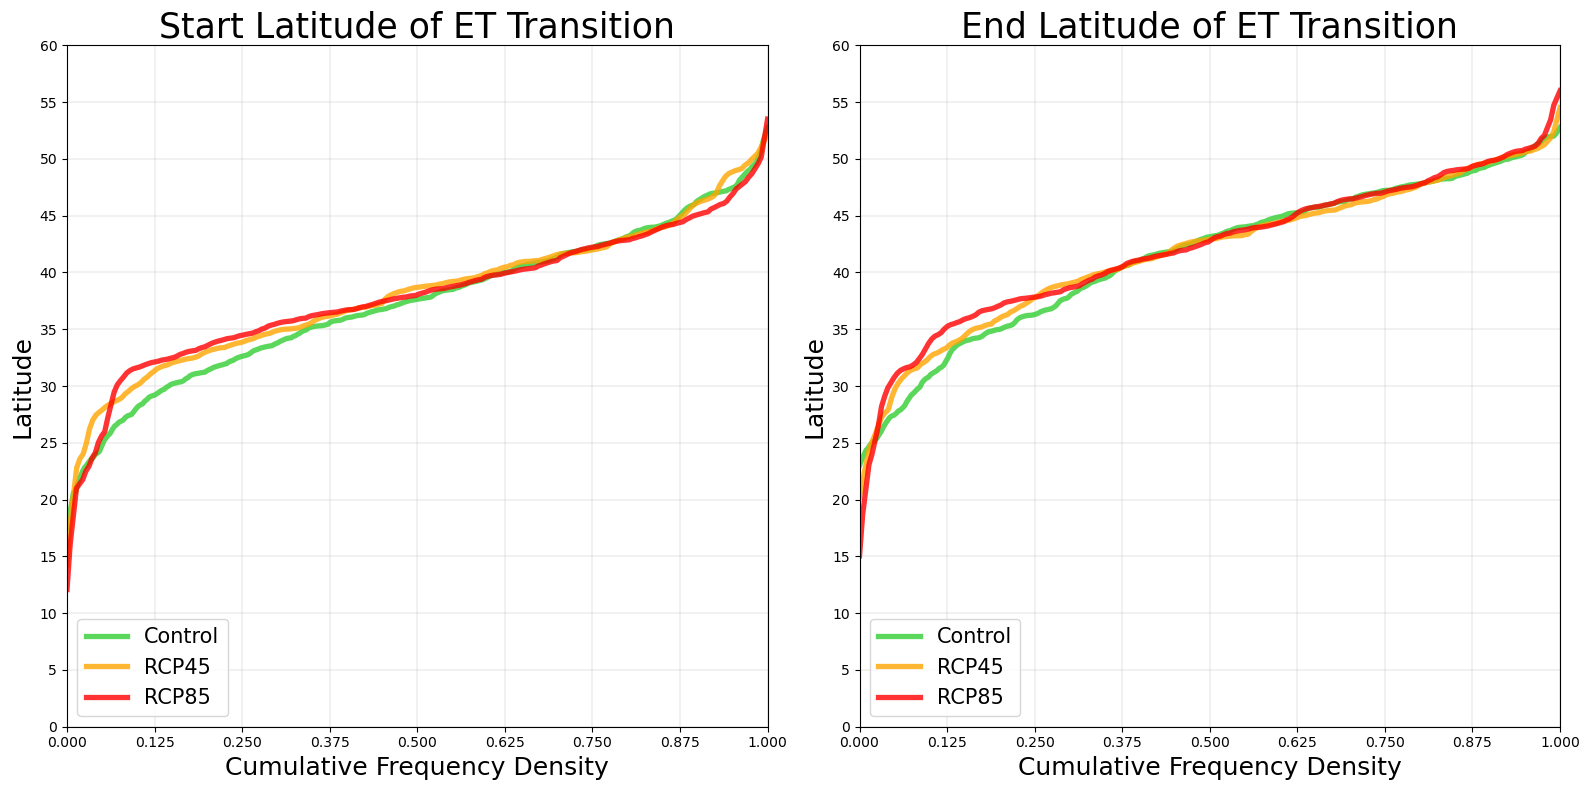

In [28]:
# Start Lat and End Lat
Fig = pyplot.figure(figsize=(16,8))
ET_Cum_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start Lat", False)
ET_Cum_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "End Lat", False)
pyplot.tight_layout()
Figname = str('ET_Latitude_Cumulative.png')
Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

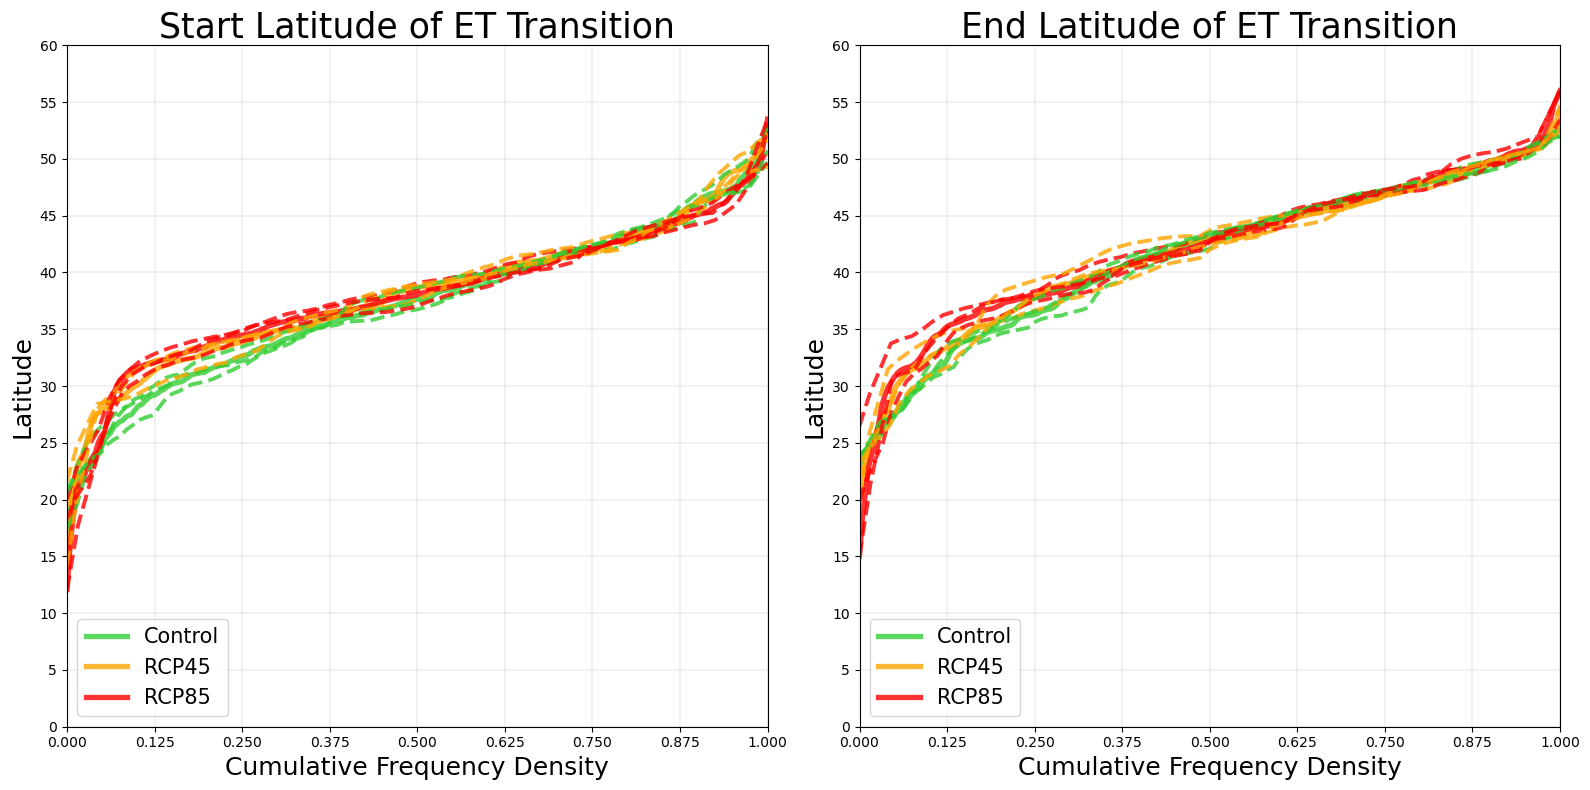

In [29]:
# Start Lat and End Lat
Fig = pyplot.figure(figsize=(16,8))
ET_Cum_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start Lat", True)
ET_Cum_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "End Lat", True)
pyplot.tight_layout()
#Figname = str('ET_Latitude_Cumulative.png')
#Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

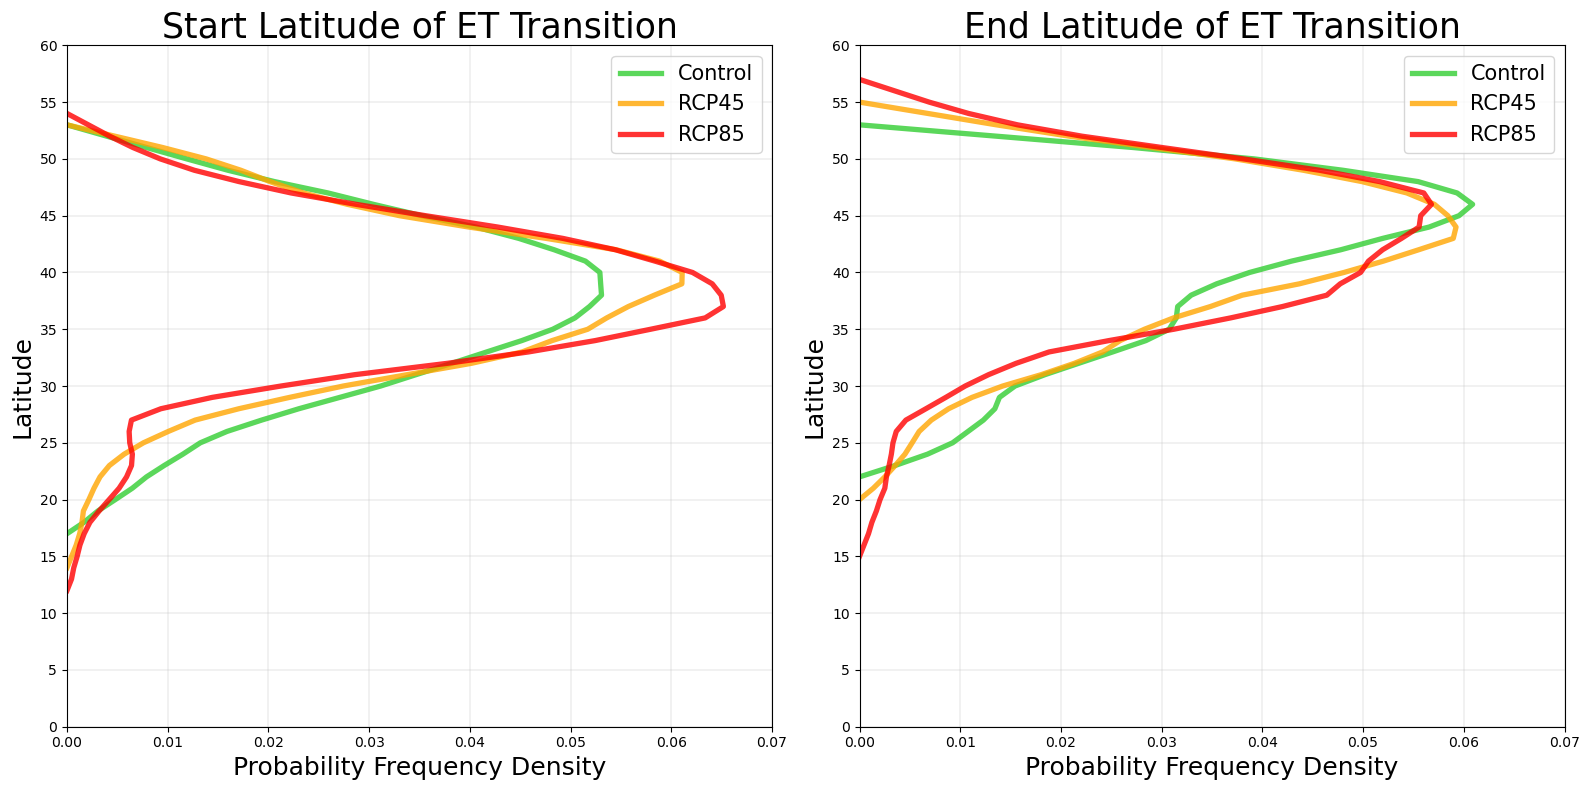

In [30]:
# Start Lat and End Lat
Fig = pyplot.figure(figsize=(16,8))
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start Lat", False, "None")
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "End Lat", False, "None")
pyplot.tight_layout()
Figname = str('ET_Latitude_Prob.png')
Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

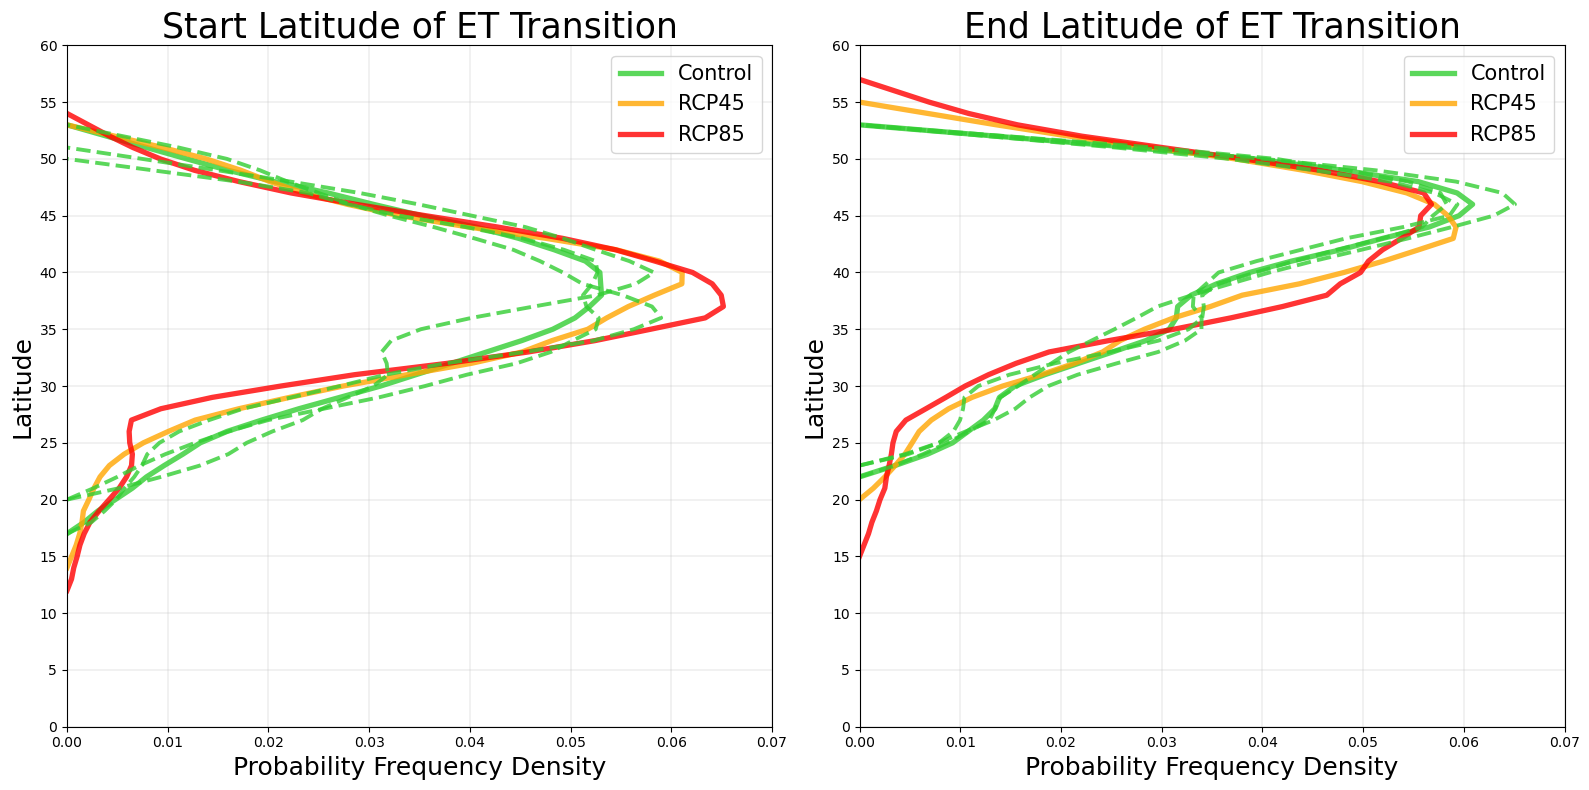

In [31]:
# Start Lat and End Lat
Fig = pyplot.figure(figsize=(16,8))
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start Lat", True, "Control")
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "End Lat", True, "Control")
pyplot.tight_layout()
#Figname = str('ET_Latitude_Prob.png')
#Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

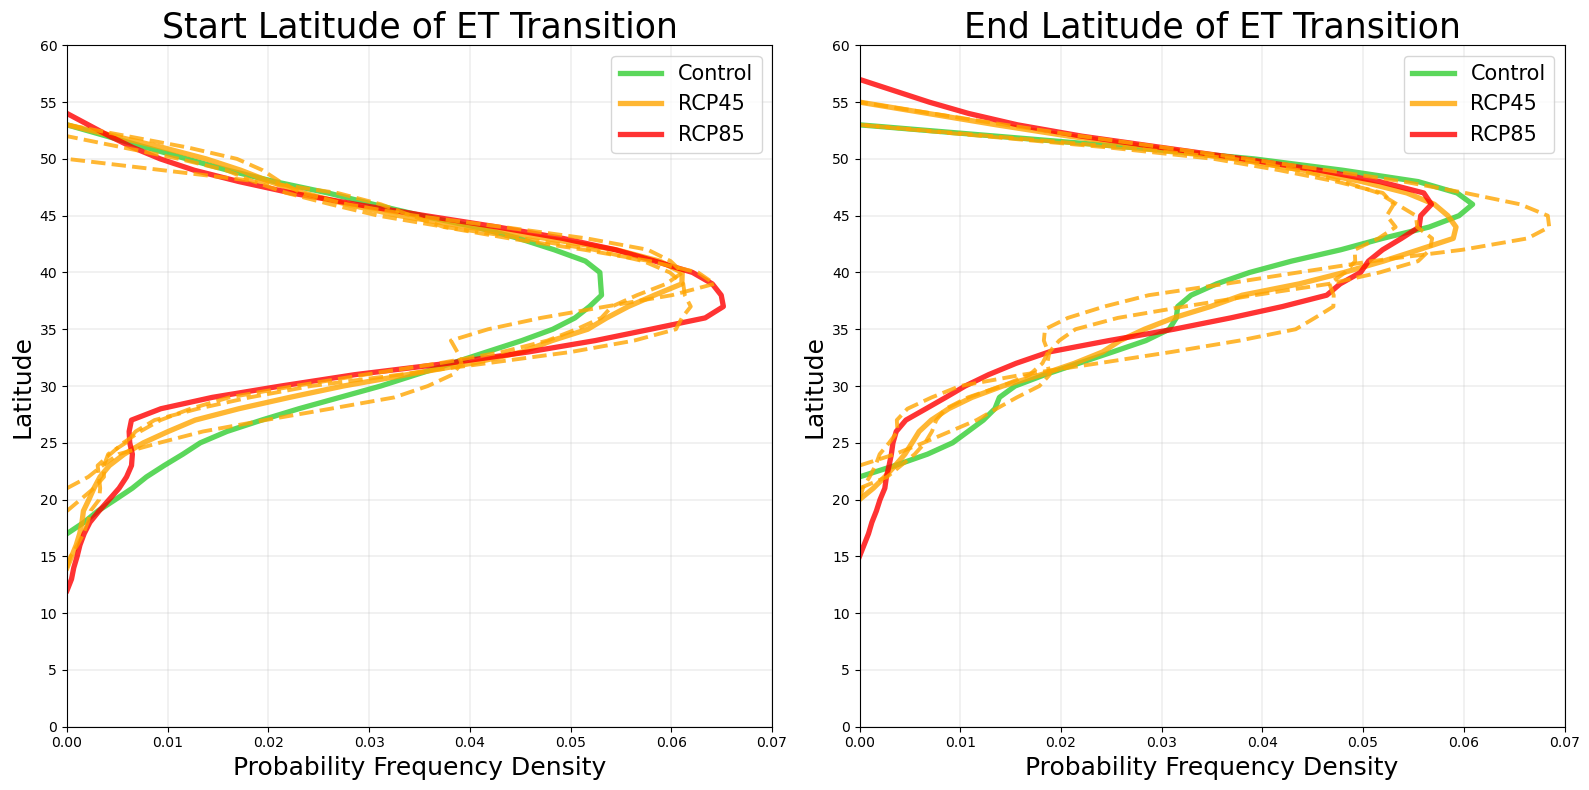

In [32]:
# Start Lat and End Lat
Fig = pyplot.figure(figsize=(16,8))
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start Lat", True, "RCP4.5")
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "End Lat", True, "RCP4.5")
pyplot.tight_layout()
#Figname = str('ET_Latitude_Prob.png')
#Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

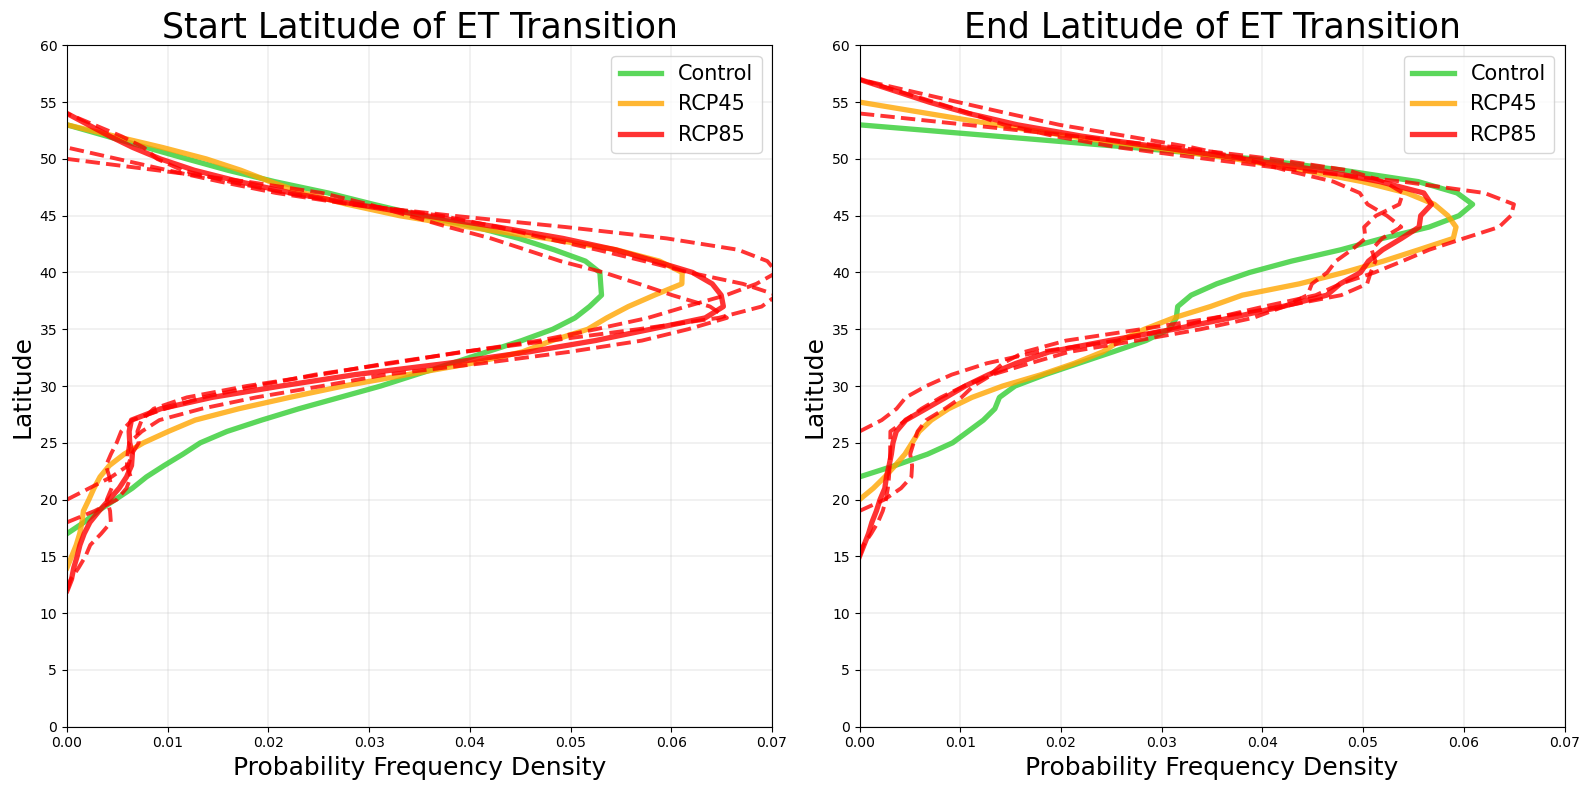

In [33]:
# Start Lat and End Lat
Fig = pyplot.figure(figsize=(16,8))
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start Lat", True, "RCP8.5")
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "End Lat", True, "RCP8.5")
pyplot.tight_layout()
#Figname = str('ET_Latitude_Prob.png')
#Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

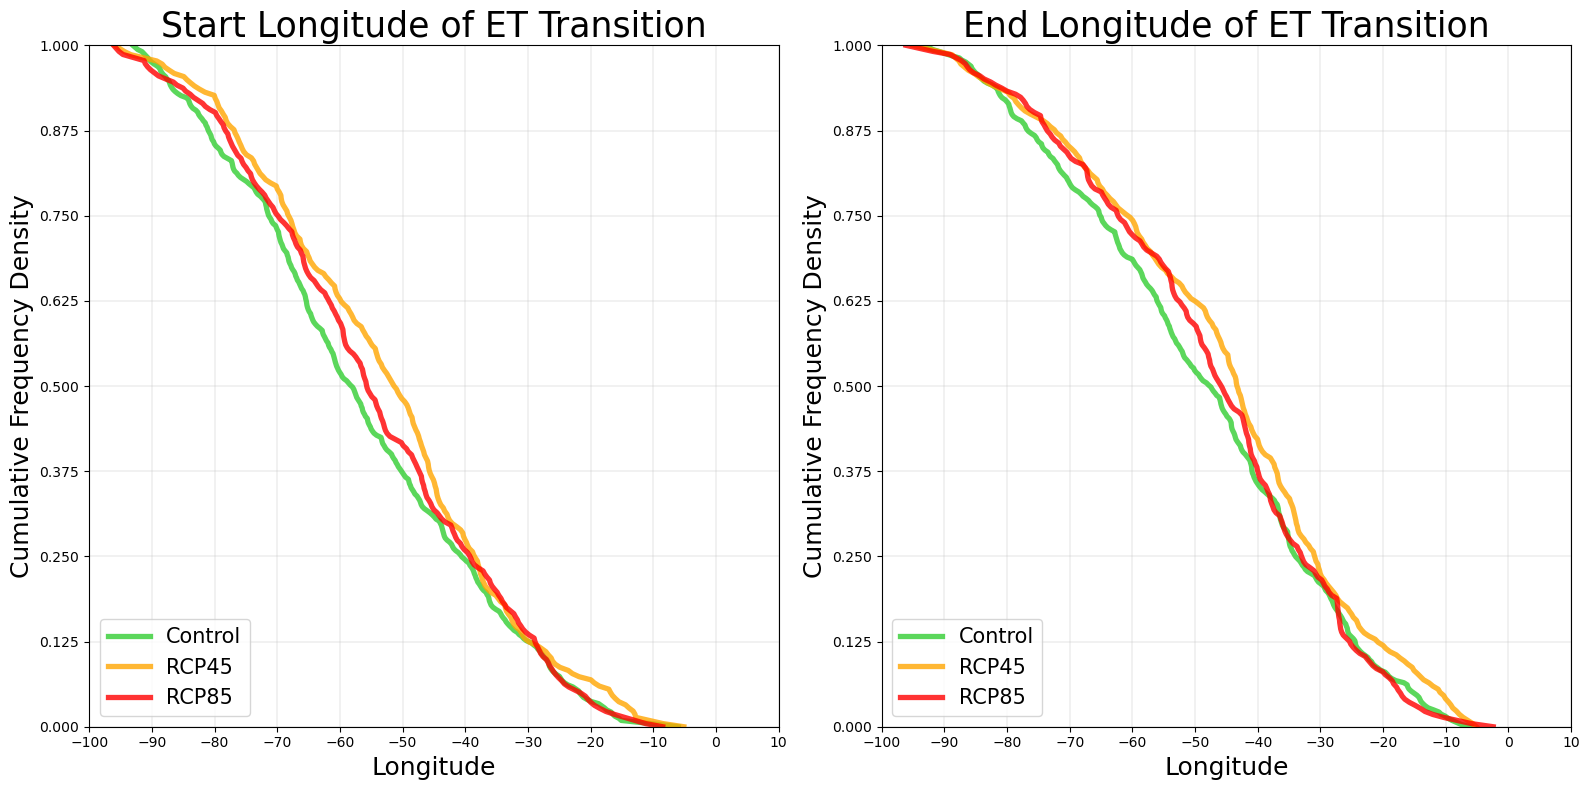

In [34]:
# Start Lon and End Lon
Fig = pyplot.figure(figsize=(16,8))
ET_Cum_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start Lon", False)
ET_Cum_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "End Lon", False)
pyplot.tight_layout()
Figname = str('ET_Longitude_Cumulative.png')
Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

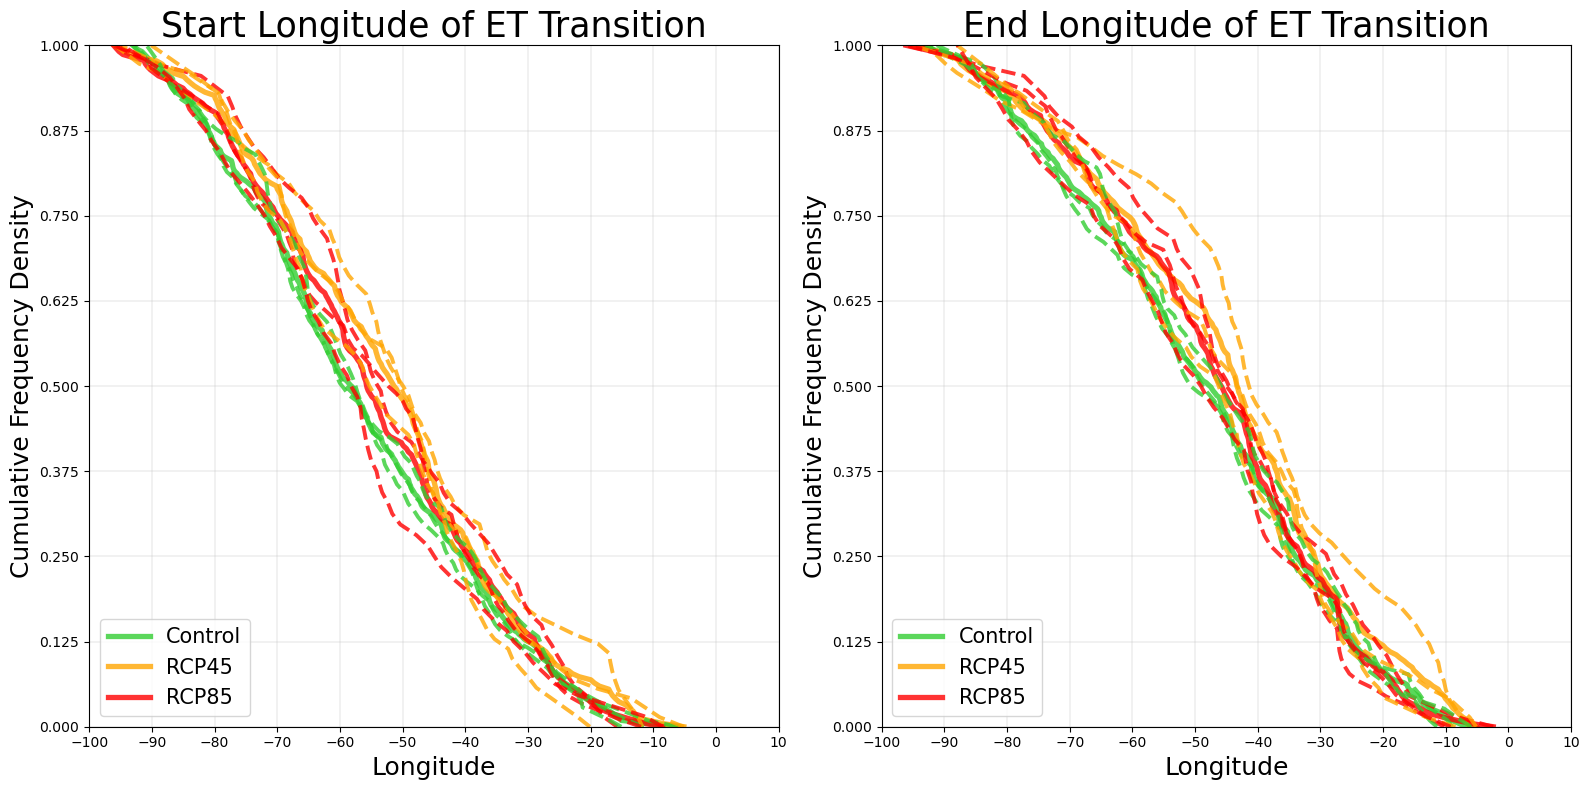

In [35]:
# Start Lon and End Lon
Fig = pyplot.figure(figsize=(16,8))
ET_Cum_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start Lon", True)
ET_Cum_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "End Lon", True)
pyplot.tight_layout()
#Figname = str('ET_Longitude_Cumulative.png')
#Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

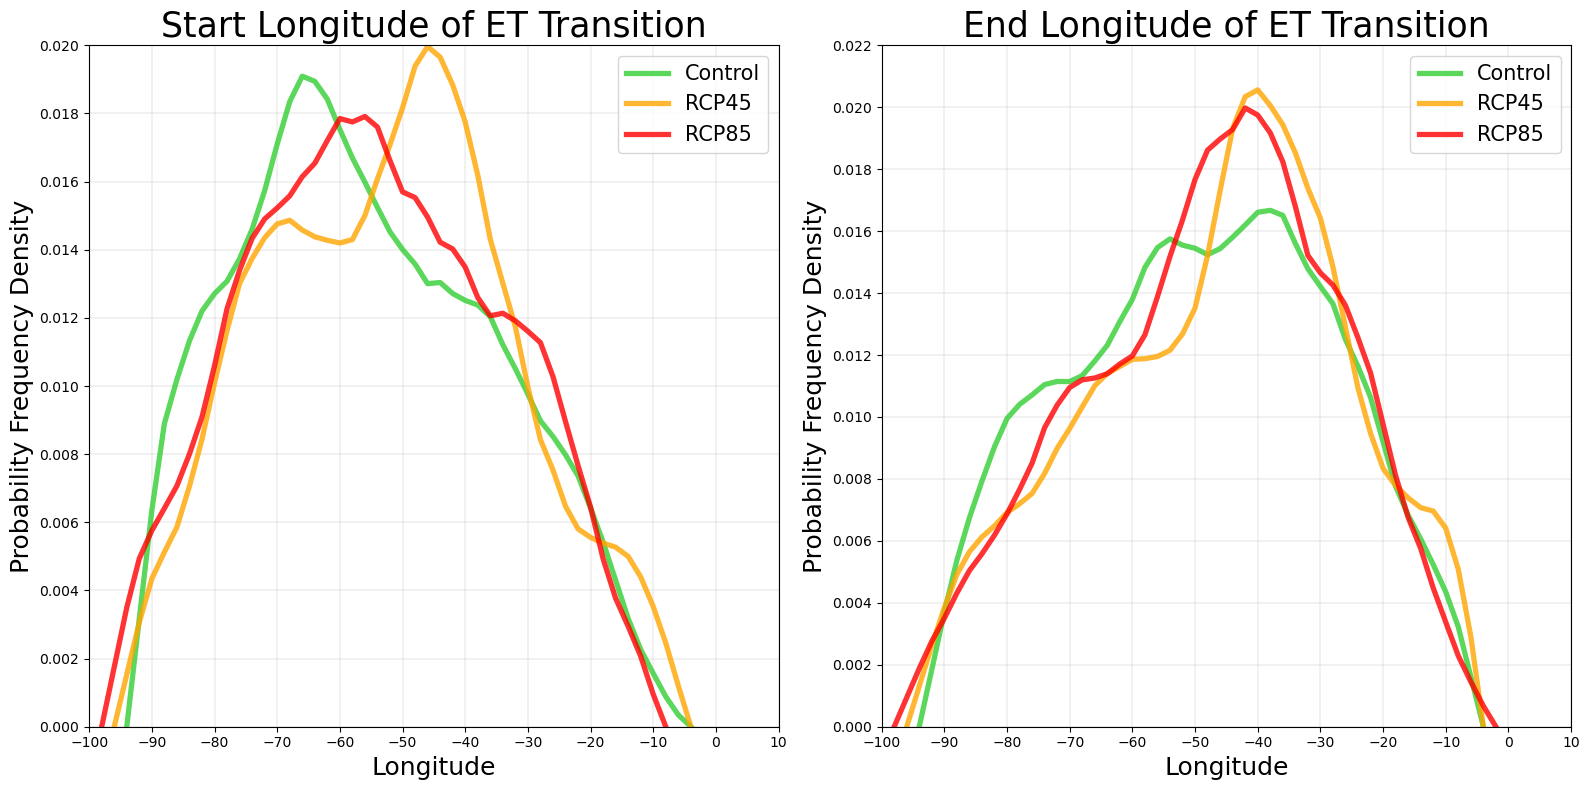

In [36]:
# Start Lon and End Lon
Fig = pyplot.figure(figsize=(16,8))
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start Lon", False, "None")
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "End Lon", False, "None")
pyplot.tight_layout()
Figname = str('ET_Longitude_Prob.png')
Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

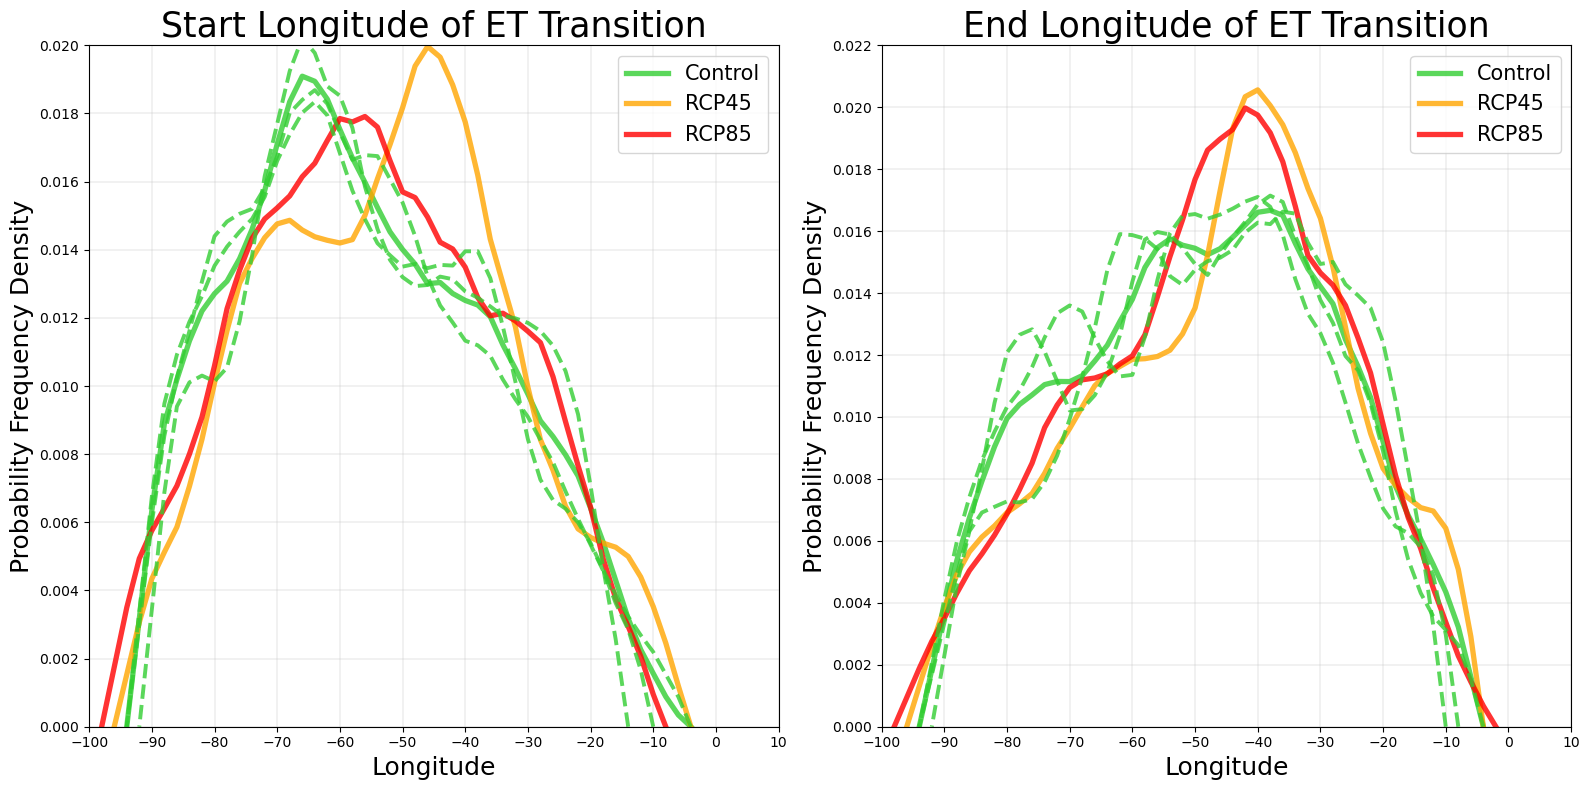

In [37]:
# Start Lon and End Lon
Fig = pyplot.figure(figsize=(16,8))
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start Lon", True, "Control")
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "End Lon", True, "Control")
pyplot.tight_layout()
#Figname = str('ET_Longitude_Prob.png')
#Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

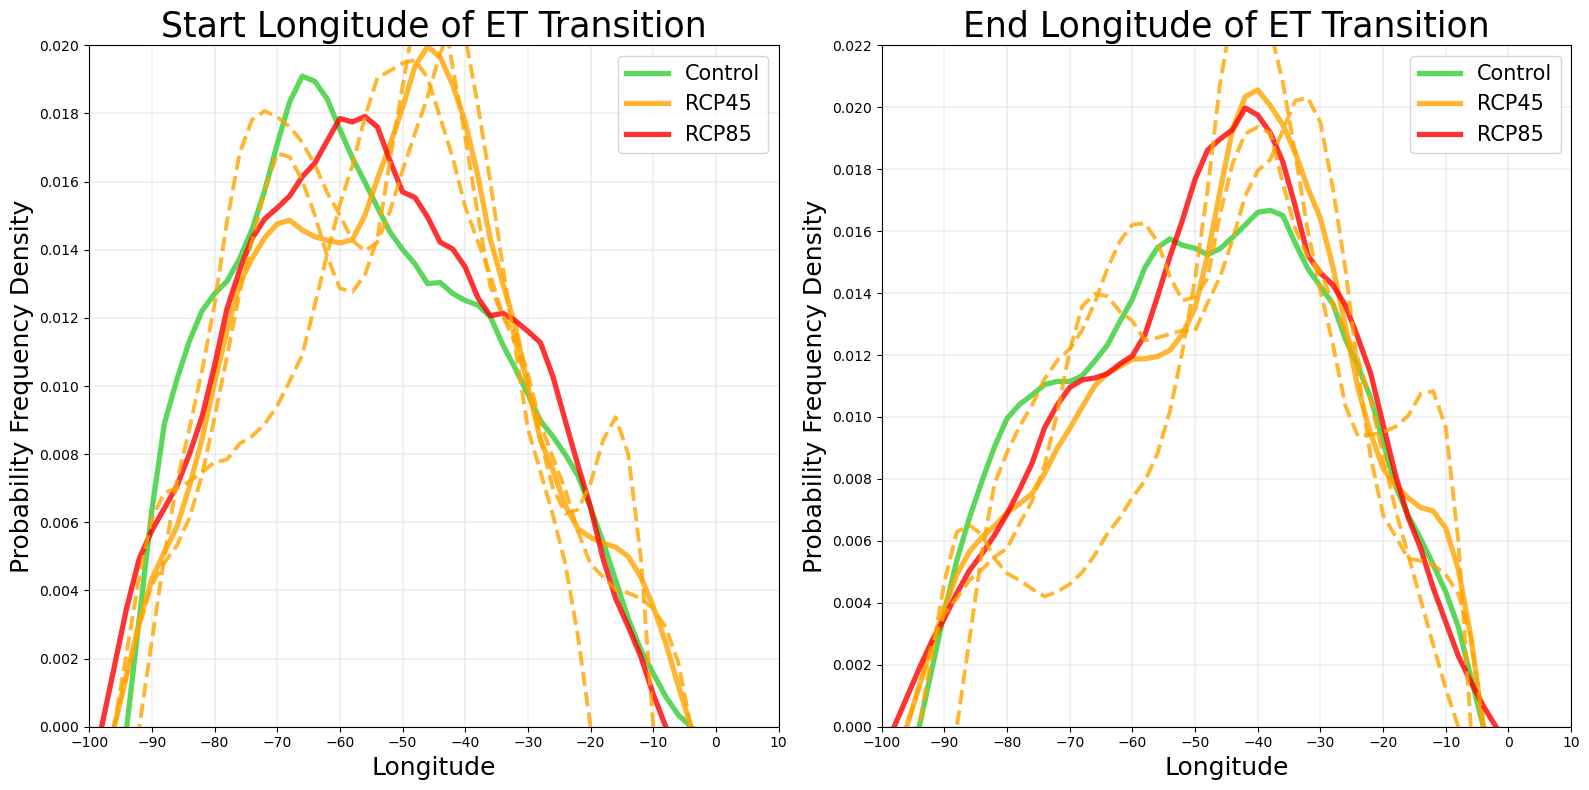

In [38]:
# Start Lon and End Lon
Fig = pyplot.figure(figsize=(16,8))
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start Lon", True, "RCP4.5")
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "End Lon", True, "RCP4.5")
pyplot.tight_layout()
#Figname = str('ET_Longitude_Prob.png')
#Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

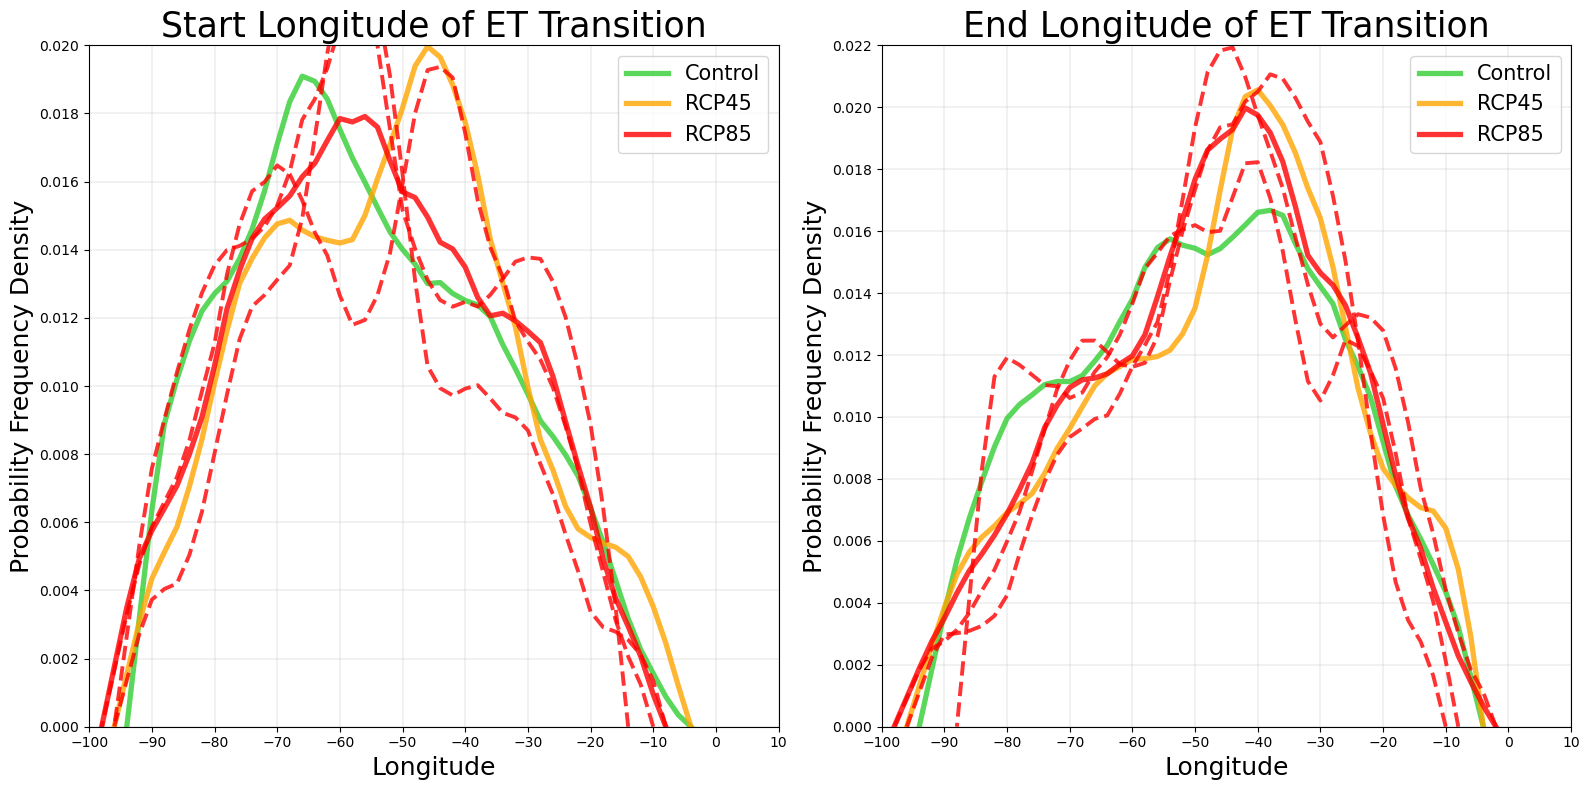

In [39]:
# Start Lon and End Lon
Fig = pyplot.figure(figsize=(16,8))
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start Lon", True, "RCP8.5")
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "End Lon", True, "RCP8.5")
pyplot.tight_layout()
#Figname = str('ET_Longitude_Prob.png')
#Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

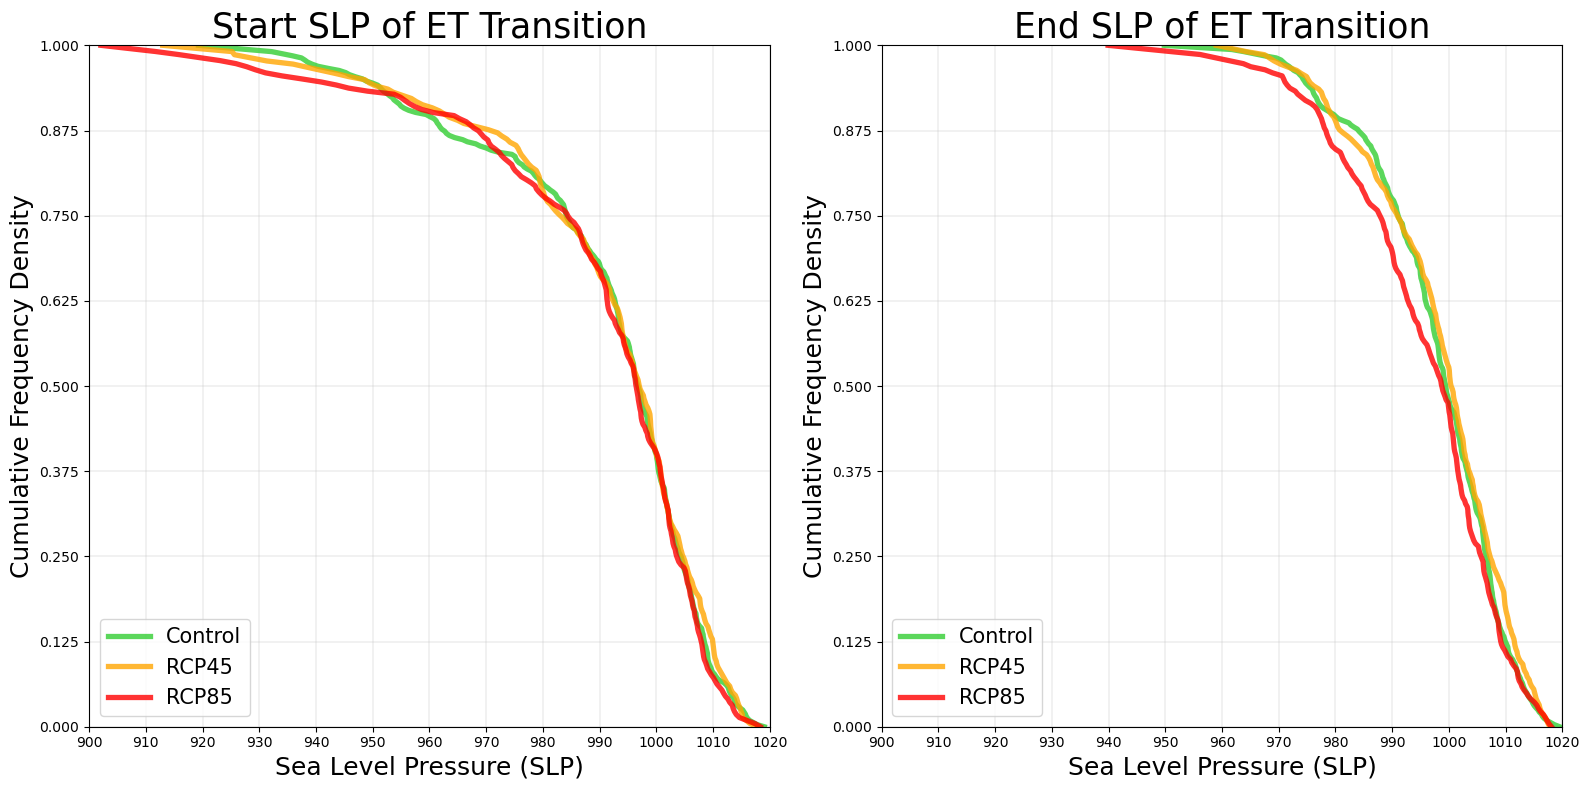

In [40]:
# Start SLP and End SLP
Fig = pyplot.figure(figsize=(16,8))
ET_Cum_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start SLP", False)
ET_Cum_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "End SLP", False)
pyplot.tight_layout()
Figname = str('ET_SLP_Cumulative.png')
Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

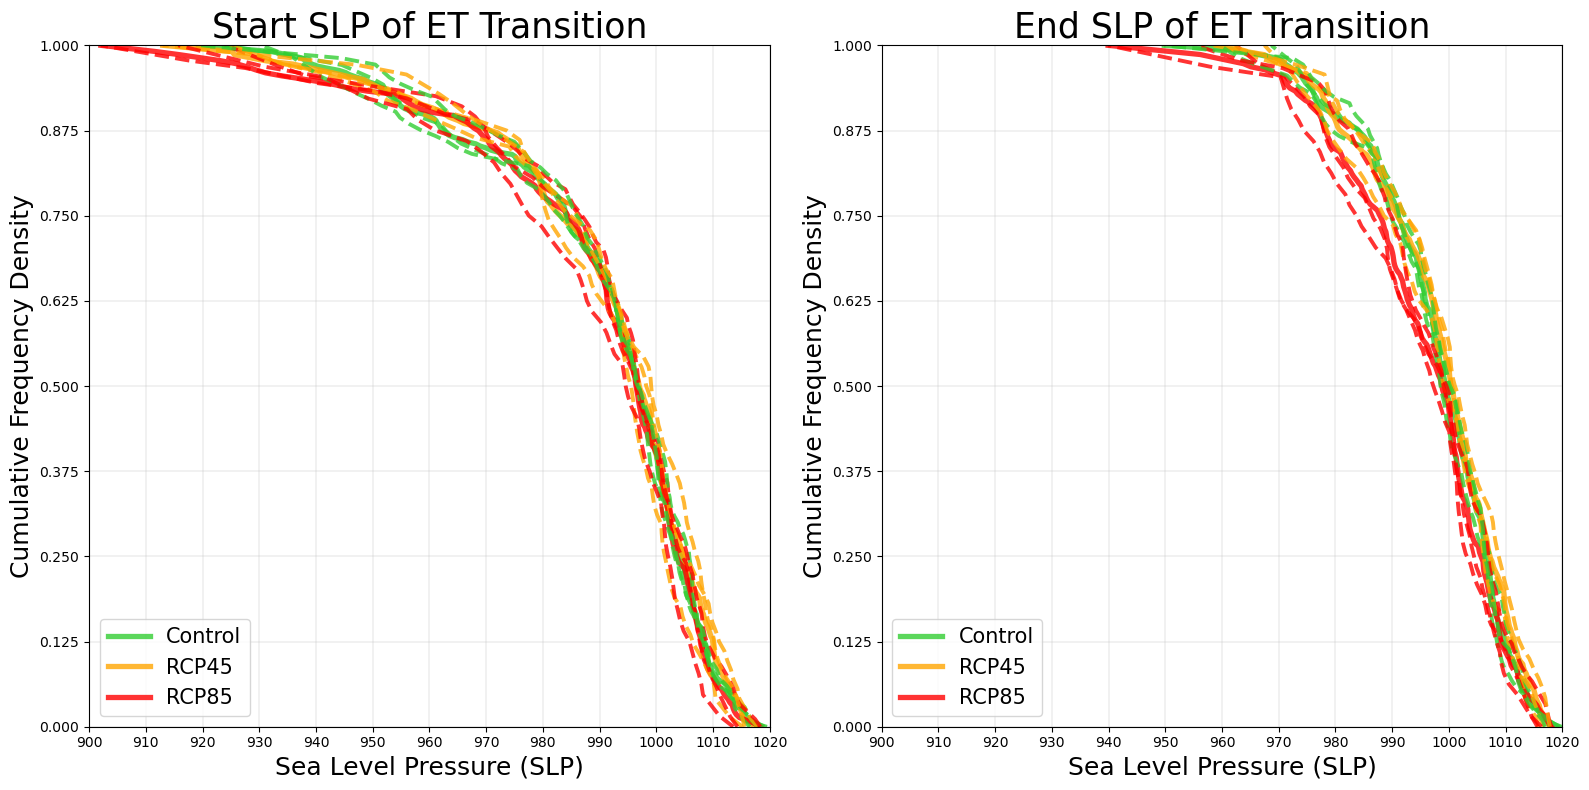

In [41]:
# Start SLP and End SLP
Fig = pyplot.figure(figsize=(16,8))
ET_Cum_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start SLP", True)
ET_Cum_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "End SLP", True)
pyplot.tight_layout()
#Figname = str('ET_SLP_Cumulative.png')
#Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

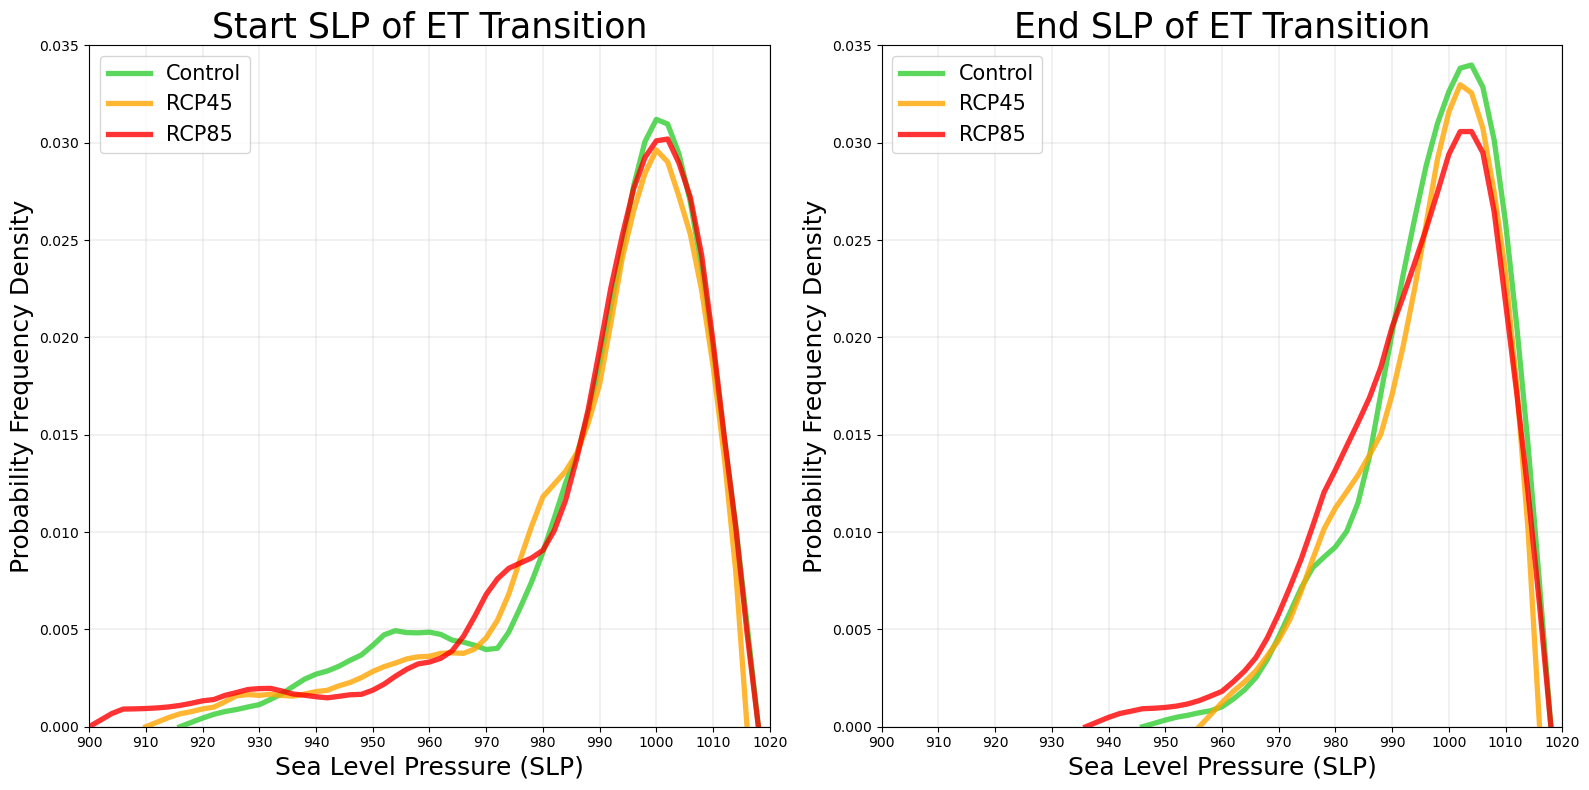

In [42]:
# Start SLP and End SLP
Fig = pyplot.figure(figsize=(16,8))
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start SLP", False, "None")
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "End SLP", False, "None")
pyplot.tight_layout()
Figname = str('ET_SLP_Prob.png')
Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

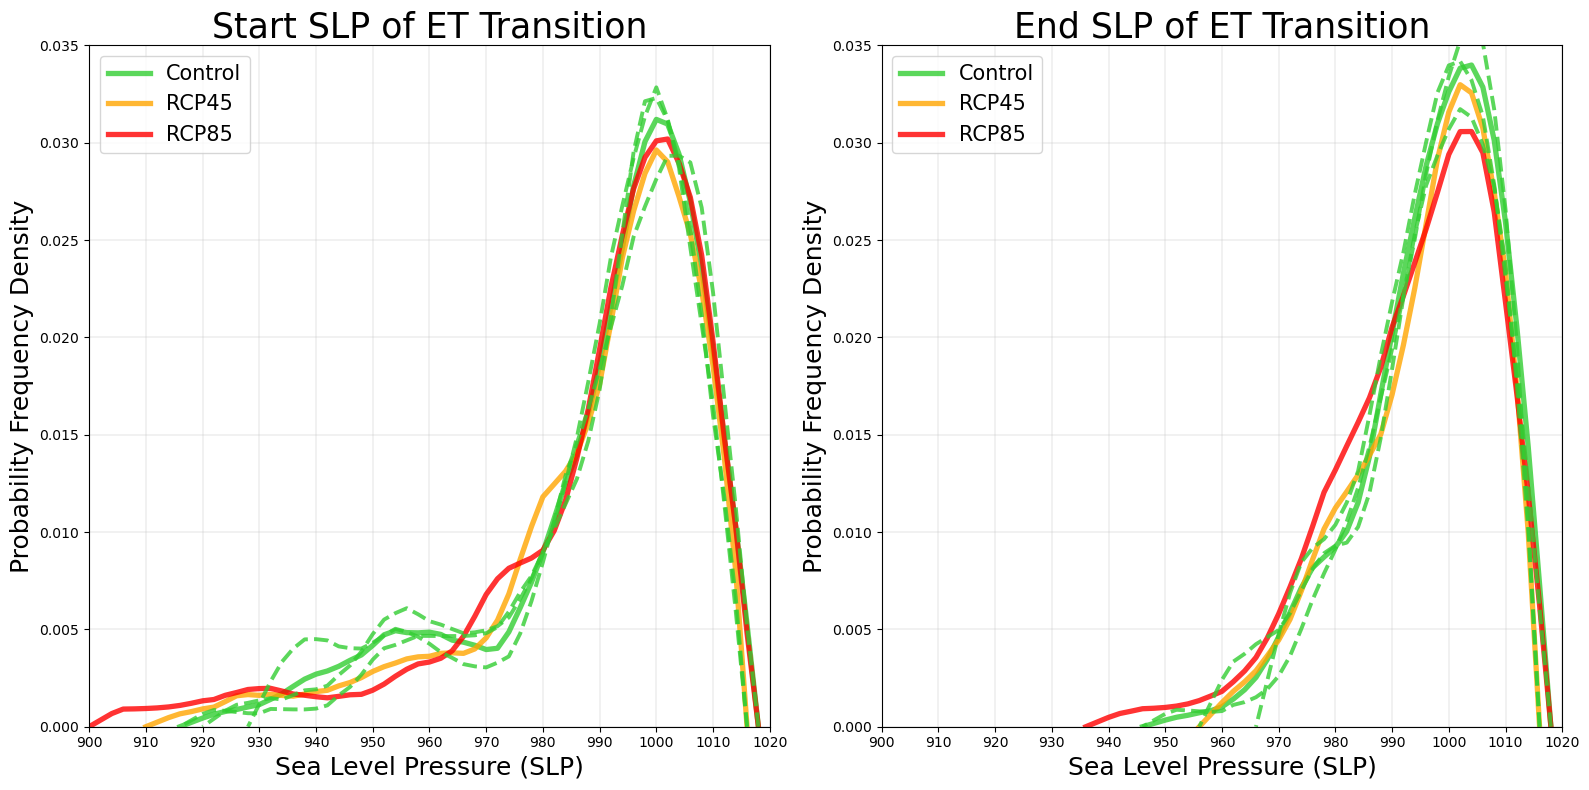

In [43]:
# Start SLP and End SLP
Fig = pyplot.figure(figsize=(16,8))
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start SLP", True, "Control")
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "End SLP", True, "Control")
pyplot.tight_layout()
#Figname = str('ET_SLP_Prob.png')
#Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

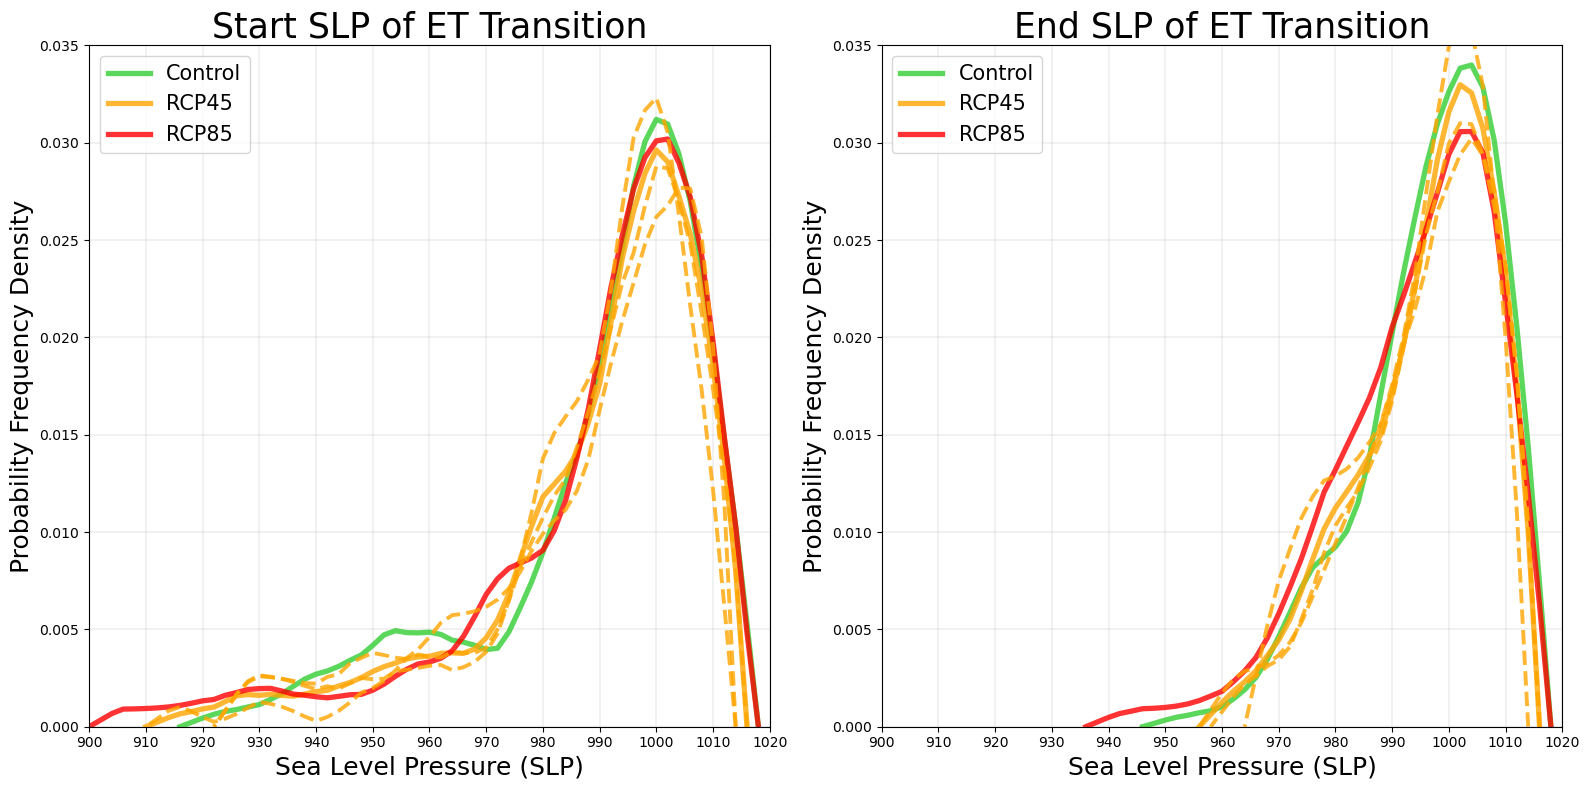

In [44]:
# Start SLP and End SLP
Fig = pyplot.figure(figsize=(16,8))
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start SLP", True, "RCP4.5")
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "End SLP", True, "RCP4.5")
pyplot.tight_layout()
#Figname = str('ET_SLP_Prob.png')
#Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

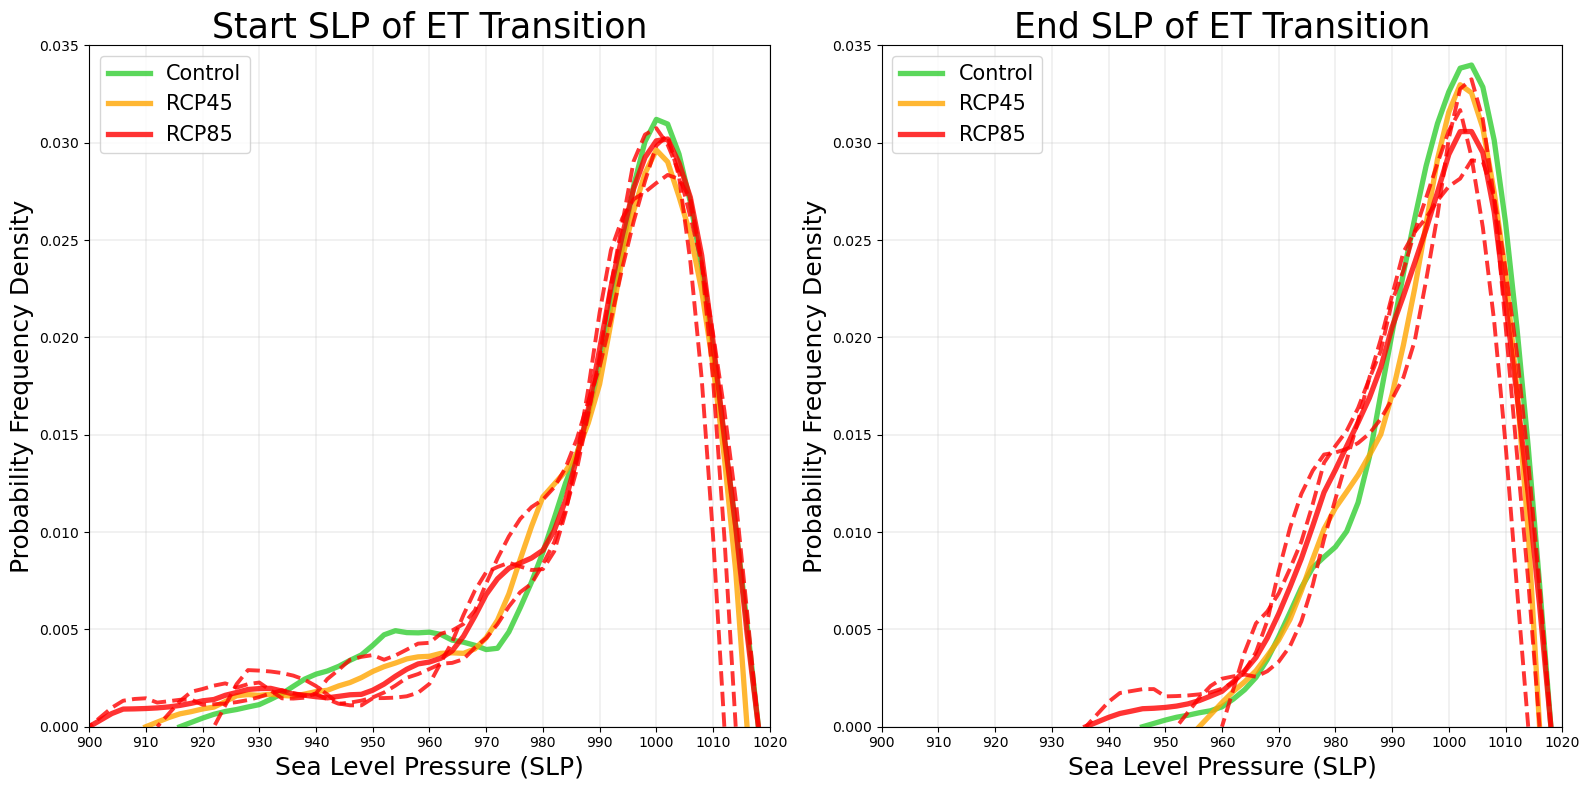

In [45]:
# Start SLP and End SLP
Fig = pyplot.figure(figsize=(16,8))
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start SLP", True, "RCP8.5")
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "End SLP", True, "RCP8.5")
pyplot.tight_layout()
#Figname = str('ET_SLP_Prob.png')
#Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

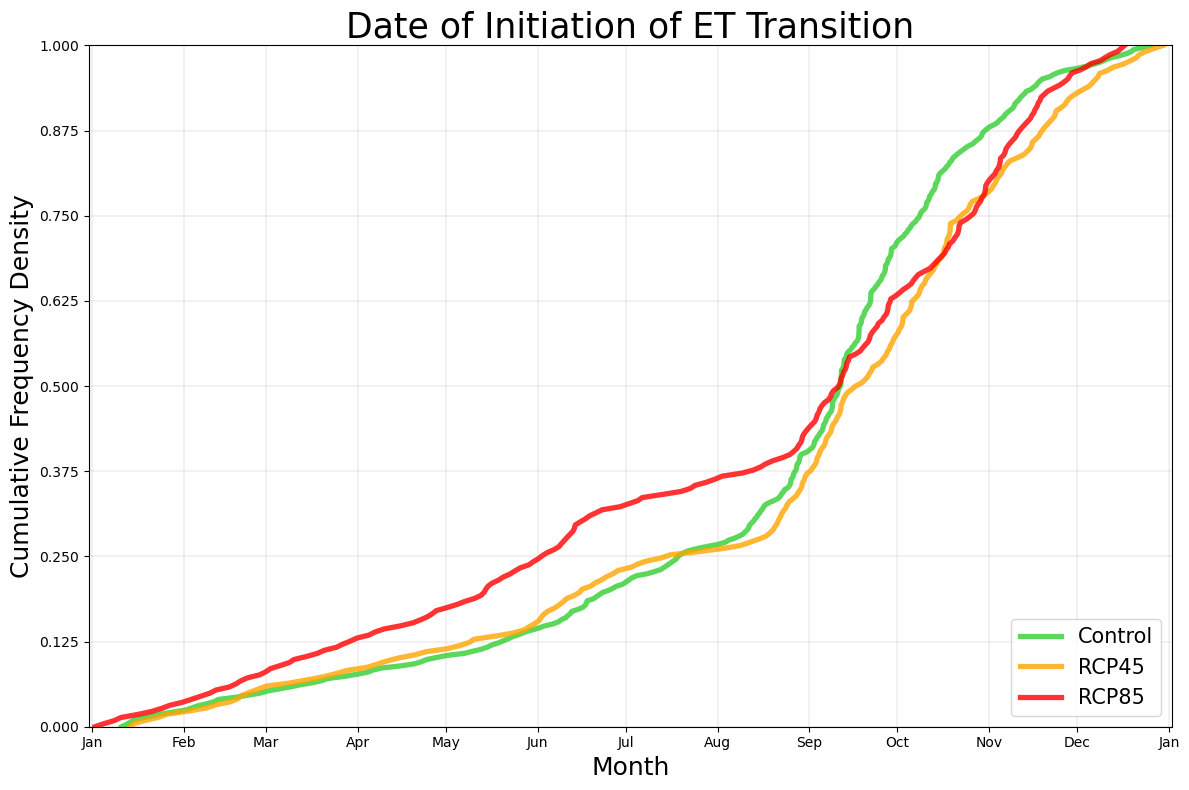

In [46]:
# ET Date
Fig = pyplot.figure(figsize=(12,8))
ET_Cum_Dist_Plot(Fig, Control_ET_Days, RCP45_ET_Days, RCP85_ET_Days, "Days", False)
Figname = str('ET_Date_Cumulative.png')
Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')
pyplot.tight_layout()

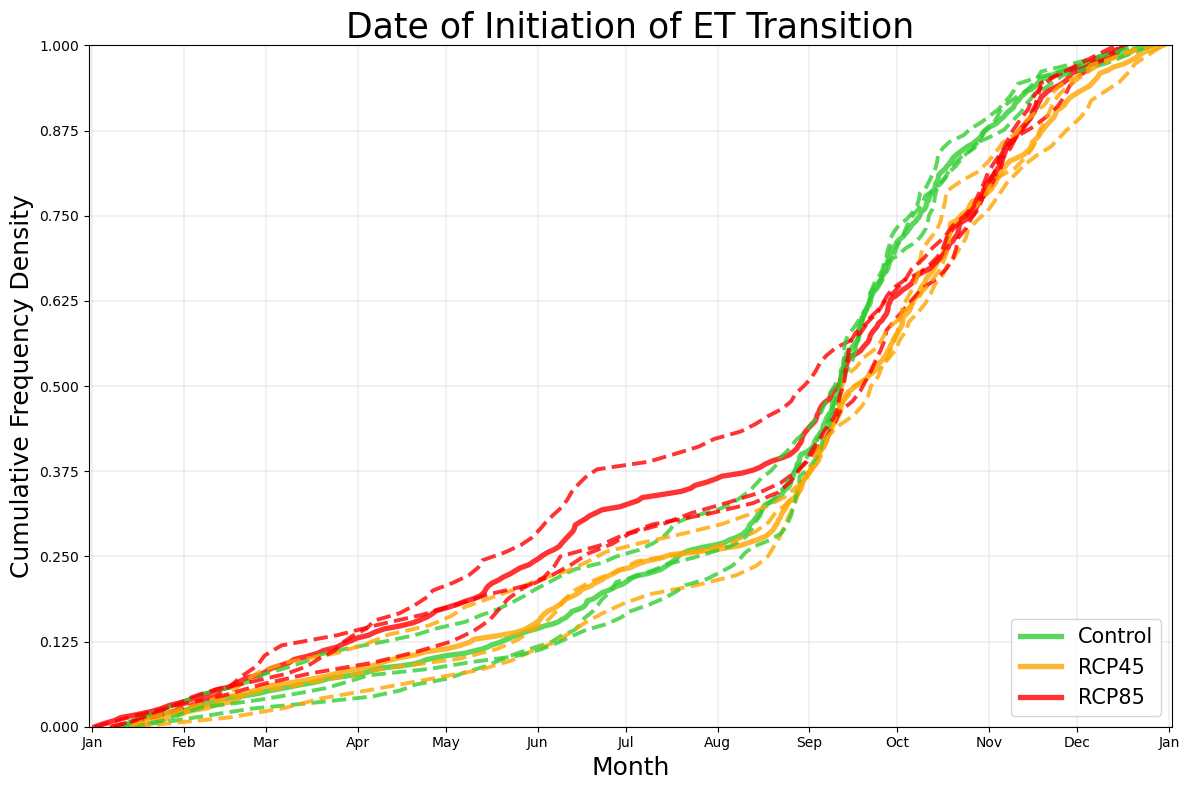

In [47]:
# ET Date
Fig = pyplot.figure(figsize=(12,8))
ET_Cum_Dist_Plot(Fig, Control_ET_Days, RCP45_ET_Days, RCP85_ET_Days, "Days", True)
#Figname = str('ET_Date_Cumulative.png')
#Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')
pyplot.tight_layout()

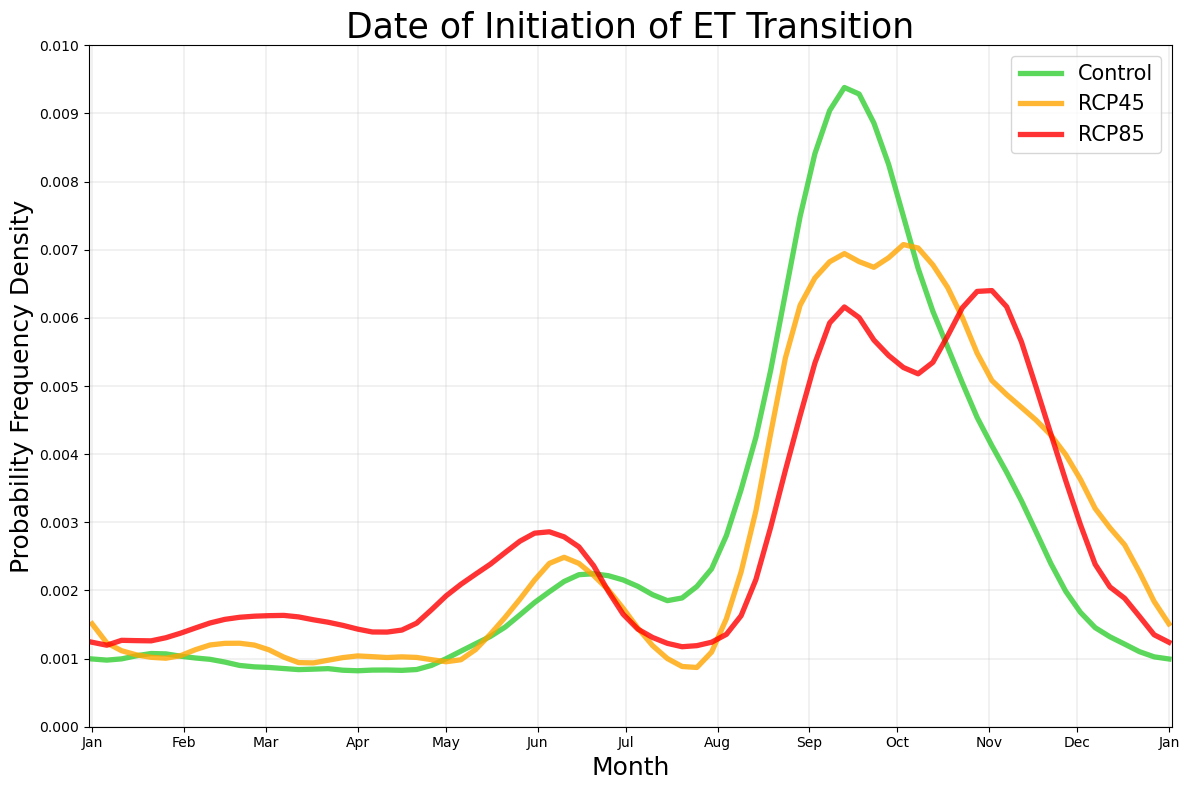

In [48]:
# ET Date
Fig = pyplot.figure(figsize=(12,8))
ET_Prob_Dist_Plot(Fig, Control_ET_Days, RCP45_ET_Days, RCP85_ET_Days, "Days", False, "None")
Figname = str('ET_Date_Prob.png')
Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')
pyplot.tight_layout()

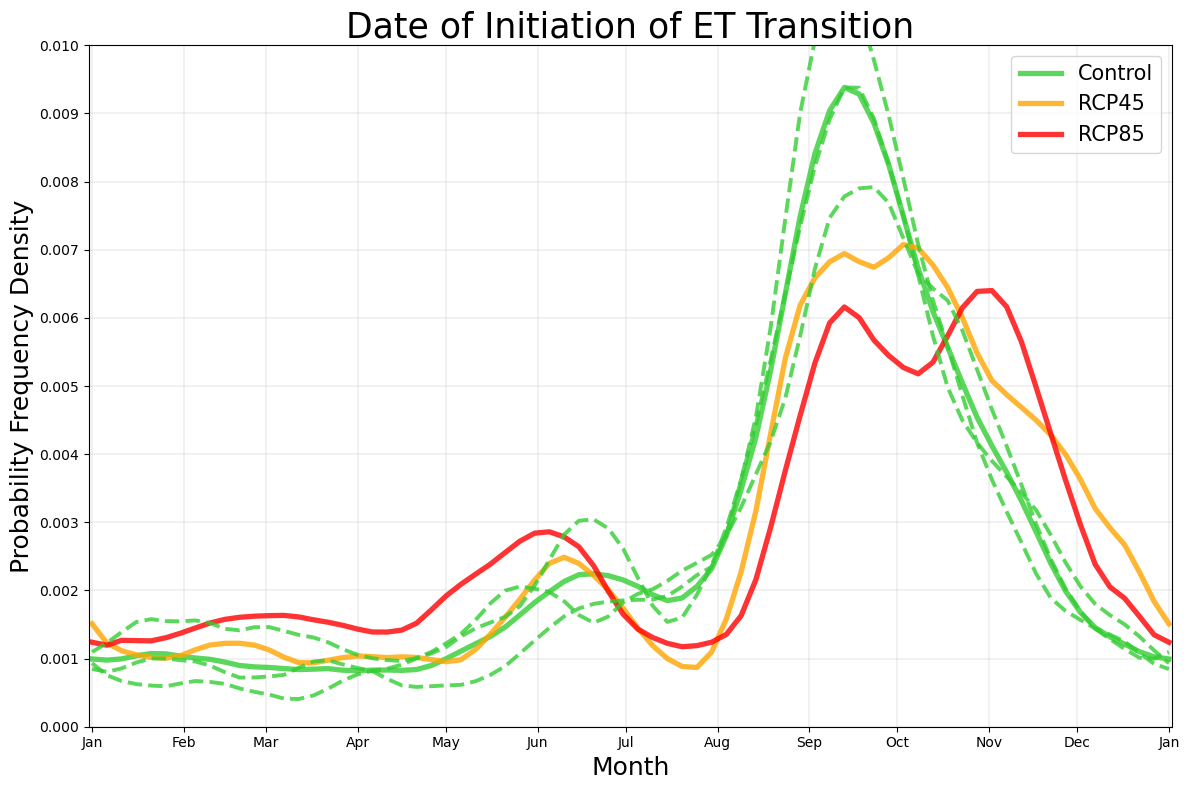

In [49]:
# ET Date
Fig = pyplot.figure(figsize=(12,8))
ET_Prob_Dist_Plot(Fig, Control_ET_Days, RCP45_ET_Days, RCP85_ET_Days, "Days", True, "Control")
#Figname = str('ET_Date_Prob.png')
#Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')
pyplot.tight_layout()

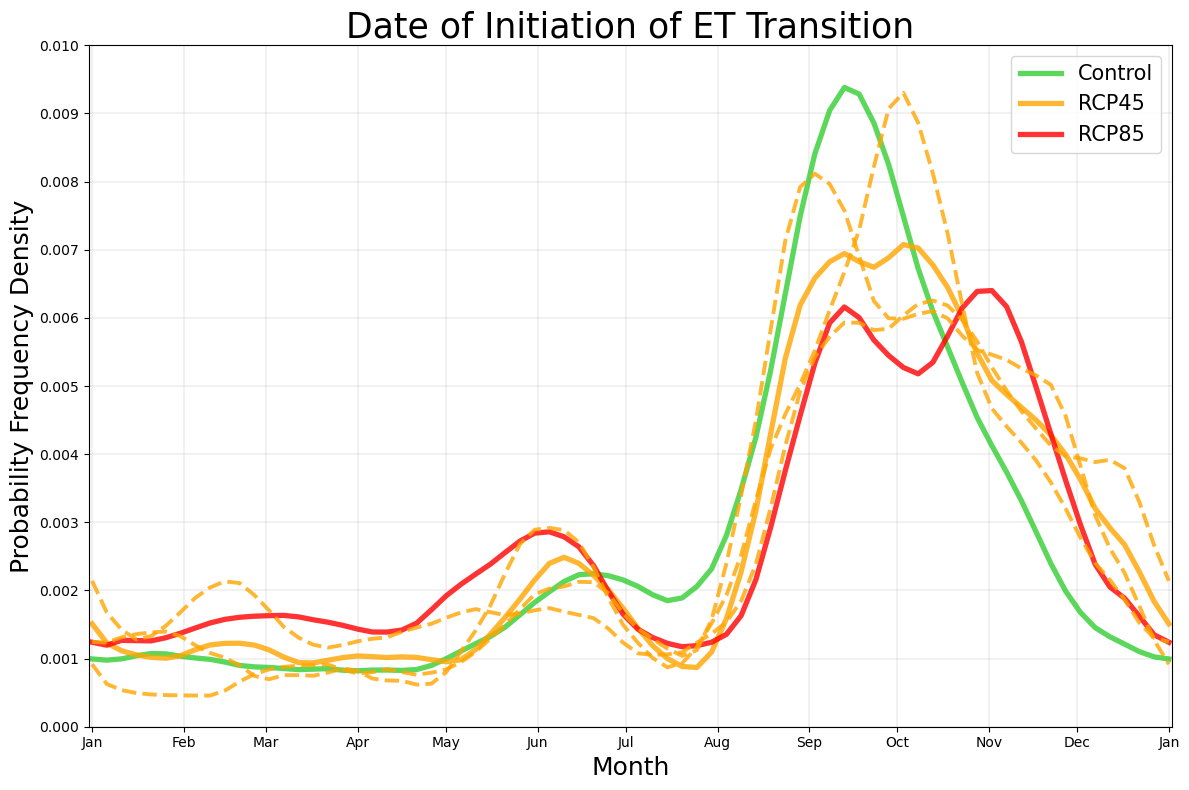

In [50]:
# ET Date
Fig = pyplot.figure(figsize=(12,8))
ET_Prob_Dist_Plot(Fig, Control_ET_Days, RCP45_ET_Days, RCP85_ET_Days, "Days", True, "RCP4.5")
#Figname = str('ET_Date_Prob.png')
#Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')
pyplot.tight_layout()

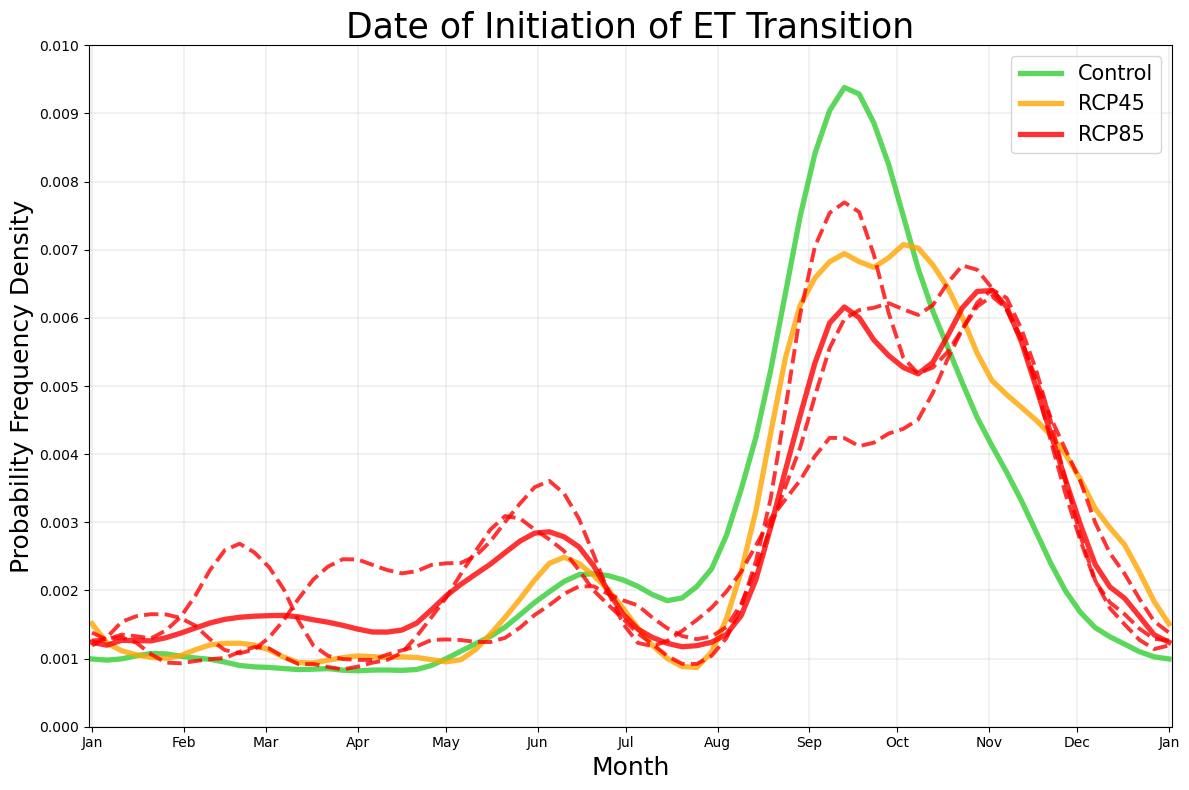

In [51]:
# ET Date
Fig = pyplot.figure(figsize=(12,8))
ET_Prob_Dist_Plot(Fig, Control_ET_Days, RCP45_ET_Days, RCP85_ET_Days, "Days", True, "RCP8.5")
#Figname = str('ET_Date_Prob.png')
#Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')
pyplot.tight_layout()

In [52]:
# Function For Creating Cumulative Distribution With No Smoothing
def Cum_Dist_Raw(Array, Var):
    Array = Array[Array > -728]
    if Var == "Start Lat" or Var == "End Lat" or Var == "Days":
        Sorted = numpy.sort(Array)
    else:
        Sorted = numpy.sort(Array)[::-1]
    Len = len(Sorted)
    Density = numpy.arange(0,1.0001,1/(Len-1))
    return (Sorted, Density)

In [53]:
# Function to Plot Probability Distribution Functions With No Smoothing
def Prob_Dist_Raw(DF, Var):
    Cum_Sorted, Cum_Density = Cum_Dist_Raw(DF[Var], Var)
    Len = len(Cum_Sorted)
#
# Regular Variables
    if Var != "Days":
        if Var == "Start Lat" or Var == "End Lat":
            Param = 2.5
            Width = 2.5
        else:
            Param = 5
            Width = -5
        Start_Val = (int(Cum_Sorted[0] / Width - 0.01)) * Width
        End_Val = (int(Cum_Sorted[Len-1] / Width + 1.01)) * Width
        Range = int((End_Val - Start_Val) / Width)
        Prob_Vals = Create_Bins(Start_Val, End_Val, Width)
        Prob_Count = numpy.zeros(Range+1)
        for k in range(Range):
            if k == 0:
                Vals_Range = []
            elif k == Len-1:
                Vals_Range = []
            else:
                Vals_Range = Cum_Sorted[(Cum_Sorted >= Prob_Vals[k]-numpy.abs(Param)) & \
                (Cum_Sorted < Prob_Vals[k]+numpy.abs(Param))]
            Prob_Count[k] = len(Vals_Range) / (2 * Param)
        Prob_Density = Prob_Count / Len
#
# Time
    else:
        Start_Val = 0
        End_Val = 365
        Param = 16
        Prob_Vals = Month_Days[0:12]+15
        Range = len(Prob_Vals)-1
        Prob_Count = numpy.zeros(len(Prob_Vals))
        for k in range(Range+1):
#            if k == 0:
#                Vals_Range_1 = Cum_Sorted[(Cum_Sorted < Prob_Vals[k] + 16)]
#                Vals_Range_2 = Cum_Sorted[(Cum_Sorted >= End_Val - 16)]
#                Count = len(Vals_Range_1) + len(Vals_Range_2)
#            elif k == Range:
#                Vals_Range_1 = Cum_Sorted[(Cum_Sorted < Start_Val + 16)]
#                Vals_Range_2 = Cum_Sorted[(Cum_Sorted >= Prob_Vals[k] - 16)]
#                Count = len(Vals_Range_1) + len(Vals_Range_2)
#            else:
            Vals_Range = Cum_Sorted[(Cum_Sorted >= Prob_Vals[k]-Param) & \
            (Cum_Sorted < Prob_Vals[k]+Param)]
            Count = len(Vals_Range)
            Prob_Count[k] = Count / (2 * Param)
        Prob_Density = Prob_Count / Len
    return (Prob_Vals, Prob_Density)

In [54]:
# Create Function to Plot ET Cumulative Distributions
def ET_Cum_Dist_Plot_Raw(Fig, ET_DF_1, ET_DF_2, ET_DF_3, Var, Separ):
    if Var == "Start Lat" or Var == "Start Lon" or Var == "Start SLP":
        Axis = Fig.add_subplot(1,2,1)
    elif Var == "End Lat" or Var == "End Lon" or Var == "End SLP":
        Axis = Fig.add_subplot(1,2,2)
    else:
        Axis = Fig.add_subplot(1,1,1)
#
# Apply Cumulative Distribution Function
    Sorted_1, Density_1 = Cum_Dist_Raw(ET_DF_1[Var], Var)
    Sorted_2, Density_2 = Cum_Dist_Raw(ET_DF_2[Var], Var)
    Sorted_3, Density_3 = Cum_Dist_Raw(ET_DF_3[Var], Var)
    if Separ == True:
        Separ_1 = Separate(ET_DF_1, "Control")
        Sorted_1_Separ = []
        Density_1_Separ = []
        Separ_2 = Separate(ET_DF_2, "RCP4.5")
        Sorted_2_Separ = []
        Density_2_Separ = []
        Separ_3 = Separate(ET_DF_3, "RCP8.5")
        Sorted_3_Separ = []
        Density_3_Separ = []
        for s in range(3):
            Sorted_1_i, Density_1_i = Cum_Dist_Raw(Separ_1[s][Var], Var)
            Sorted_1_Separ.append(Sorted_1_i)
            Density_1_Separ.append(Density_1_i)
            Sorted_2_i, Density_2_i = Cum_Dist_Raw(Separ_2[s][Var], Var)
            Sorted_2_Separ.append(Sorted_2_i)
            Density_2_Separ.append(Density_2_i)
            Sorted_3_i, Density_3_i = Cum_Dist_Raw(Separ_3[s][Var], Var)
            Sorted_3_Separ.append(Sorted_3_i)
            Density_3_Separ.append(Density_3_i)
#
# Plotting
    if Var == "Start Lat" or Var == "End Lat":
        Axis.plot(Density_1, Sorted_1, color='limegreen', linewidth=3.8, label='Control', alpha=0.8)
        Axis.plot(Density_2, Sorted_2, color='orange', linewidth=3.8, label='RCP45', alpha=0.8)
        Axis.plot(Density_3, Sorted_3, color='red', linewidth=3.8, label='RCP85', alpha=0.8)
        if Separ == True:
            for s in range(3):
                Axis.plot(Density_1_Separ[s], Sorted_1_Separ[s], color='limegreen', \
                linestyle='--', linewidth=2.8, alpha=0.8)
                Axis.plot(Density_2_Separ[s], Sorted_2_Separ[s], color='orange', \
                linestyle='--', linewidth=2.8, alpha=0.8)
                Axis.plot(Density_3_Separ[s], Sorted_3_Separ[s], color='red', \
                linestyle='--', linewidth=2.8, alpha=0.8)
    else:
        Axis.plot(Sorted_1, Density_1, color='limegreen', linewidth=3.8, label='Control', alpha=0.8)
        Axis.plot(Sorted_2, Density_2, color='orange', linewidth=3.8, label='RCP45', alpha=0.8)
        Axis.plot(Sorted_3, Density_3, color='red', linewidth=3.8, label='RCP85', alpha=0.8)
        if Separ == True:
            for s in range(3):
                Axis.plot(Sorted_1_Separ[s], Density_1_Separ[s], color='limegreen', \
                linestyle='--', linewidth=2.8, alpha=0.8)
                Axis.plot(Sorted_2_Separ[s], Density_2_Separ[s], color='orange', \
                linestyle='--', linewidth=2.8, alpha=0.8)
                Axis.plot(Sorted_3_Separ[s], Density_3_Separ[s], color='red', \
                linestyle='--', linewidth=2.8, alpha=0.8)
#
# Formatting Based on Variable
    Cum_Dist_Formatting(Sorted_1, Sorted_2, Sorted_3, Var)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

In [55]:
# Create Function to Plot ET Probability Distributions
def ET_Prob_Dist_Plot_Raw(Fig, ET_DF_1, ET_DF_2, ET_DF_3, Var, Separ):
    if Var == "Start Lat" or Var == "Start Lon" or Var == "Start SLP":
        Axis = Fig.add_subplot(1,2,1)
    elif Var == "End Lat" or Var == "End Lon" or Var == "End SLP":
        Axis = Fig.add_subplot(1,2,2)
    else:
        Axis = Fig.add_subplot(1,1,1)
#
# Apply Probability Distribution Function
    Values_1, Density_1 = Prob_Dist_Raw(ET_DF_1, Var)
    Values_2, Density_2 = Prob_Dist_Raw(ET_DF_2, Var)
    Values_3, Density_3 = Prob_Dist_Raw(ET_DF_3, Var)
    if Separ == True:
        Separ_1 = Separate(ET_DF_1, "Control")
        Values_1_Separ = []
        Density_1_Separ = []
        Separ_2 = Separate(ET_DF_2, "RCP4.5")
        Values_2_Separ = []
        Density_2_Separ = []
        Separ_3 = Separate(ET_DF_3, "RCP8.5")
        Values_3_Separ = []
        Density_3_Separ = []
        for s in range(3):
            Values_1_i, Density_1_i = Prob_Dist_Raw(Separ_1[s], Var)
            Values_1_Separ.append(Values_1_i)
            Density_1_Separ.append(Density_1_i)
            Values_2_i, Density_2_i = Prob_Dist_Raw(Separ_2[s], Var)
            Values_2_Separ.append(Values_2_i)
            Density_2_Separ.append(Density_2_i)
            Values_3_i, Density_3_i = Prob_Dist_Raw(Separ_3[s], Var)
            Values_3_Separ.append(Values_3_i)
            Density_3_Separ.append(Density_3_i)
#
# Plotting
    if Var == "Start Lat" or Var == "End Lat":
        Axis.plot(Density_1, Values_1, color='limegreen', linewidth=3.8, label='Control', alpha=0.8)
        Axis.plot(Density_2, Values_2, color='orange', linewidth=3.8, label='RCP45', alpha=0.8)
        Axis.plot(Density_3, Values_3, color='red', linewidth=3.8, label='RCP85', alpha=0.8)
        if Separ == True:
            for s in range(3):
                Axis.plot(Density_1_Separ[s], Values_1_Separ[s], color='limegreen', \
                linestyle='--', linewidth=2.8, alpha=0.8)
                Axis.plot(Density_2_Separ[s], Values_2_Separ[s], color='orange', \
                linestyle='--', linewidth=2.8, alpha=0.8)
                Axis.plot(Density_3_Separ[s], Values_3_Separ[s], color='red', \
                linestyle='--', linewidth=2.8, alpha=0.8)
    else:
        Axis.plot(Values_1, Density_1, color='limegreen', linewidth=3.8, label='Control', alpha=0.8)
        Axis.plot(Values_2, Density_2, color='orange', linewidth=3.8, label='RCP45', alpha=0.8)
        Axis.plot(Values_3, Density_3, color='red', linewidth=3.8, label='RCP85', alpha=0.8)
        if Separ == True:
            for s in range(3):
                Axis.plot(Values_1_Separ[s], Density_1_Separ[s], color='limegreen', \
                linestyle='--', linewidth=2.8, alpha=0.8)
                Axis.plot(Values_2_Separ[s], Density_2_Separ[s], color='orange', \
                linestyle='--', linewidth=2.8, alpha=0.8)
                Axis.plot(Values_3_Separ[s], Density_3_Separ[s], color='red', \
                linestyle='--', linewidth=2.8, alpha=0.8)
#
#
# Formatting Based on Variable
    Prob_Dist_Formatting(Values_1, Values_2, Values_3, Density_1, Density_2, Density_3, Var)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

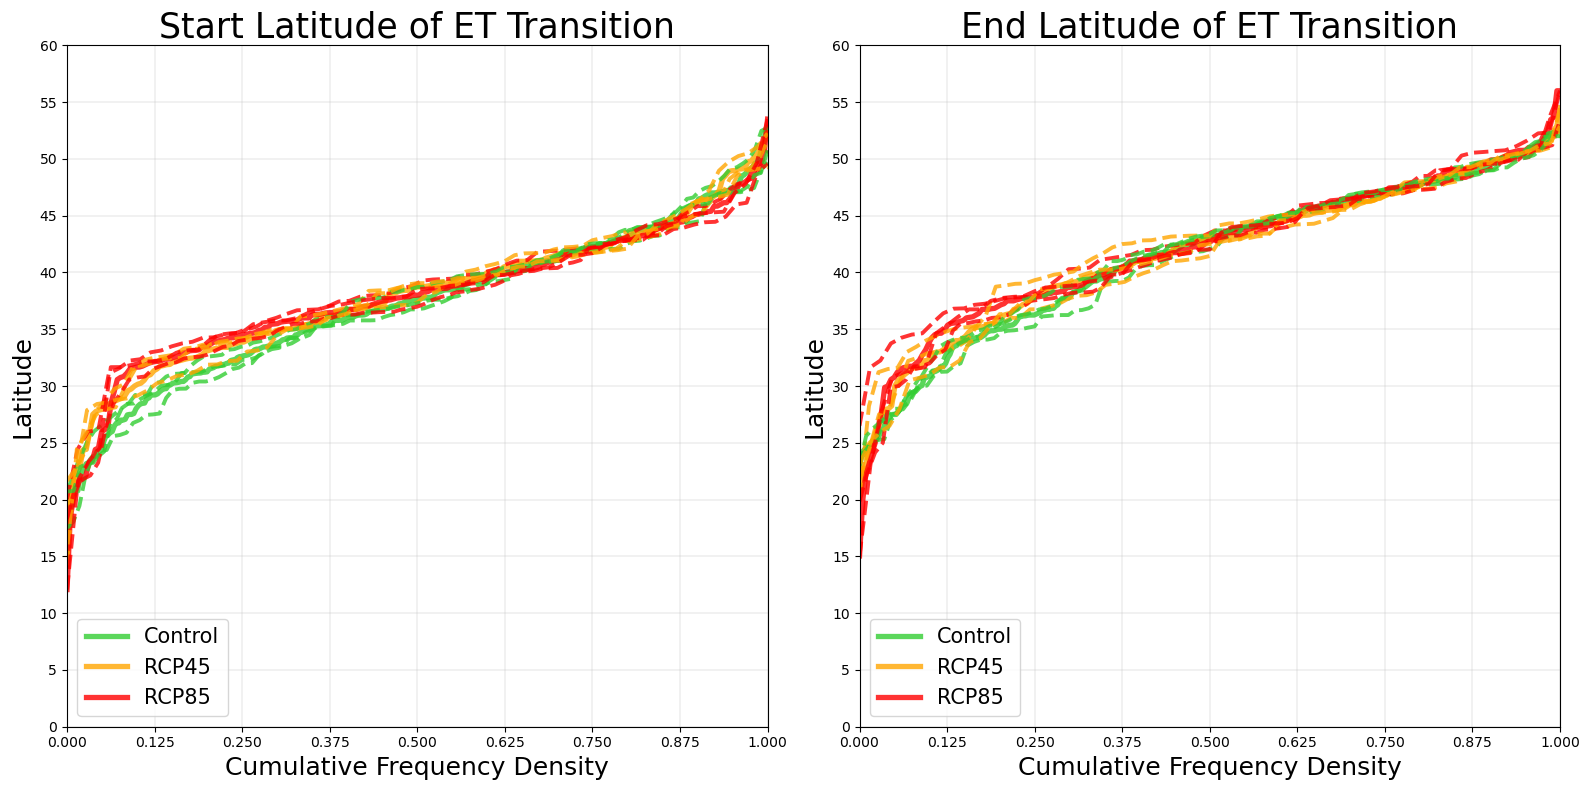

In [56]:
# Start Lat and End Lat
Fig = pyplot.figure(figsize=(16,8))
ET_Cum_Dist_Plot_Raw(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start Lat", True)
ET_Cum_Dist_Plot_Raw(Fig, Control_ET, RCP45_ET, RCP85_ET, "End Lat", True)
pyplot.tight_layout()

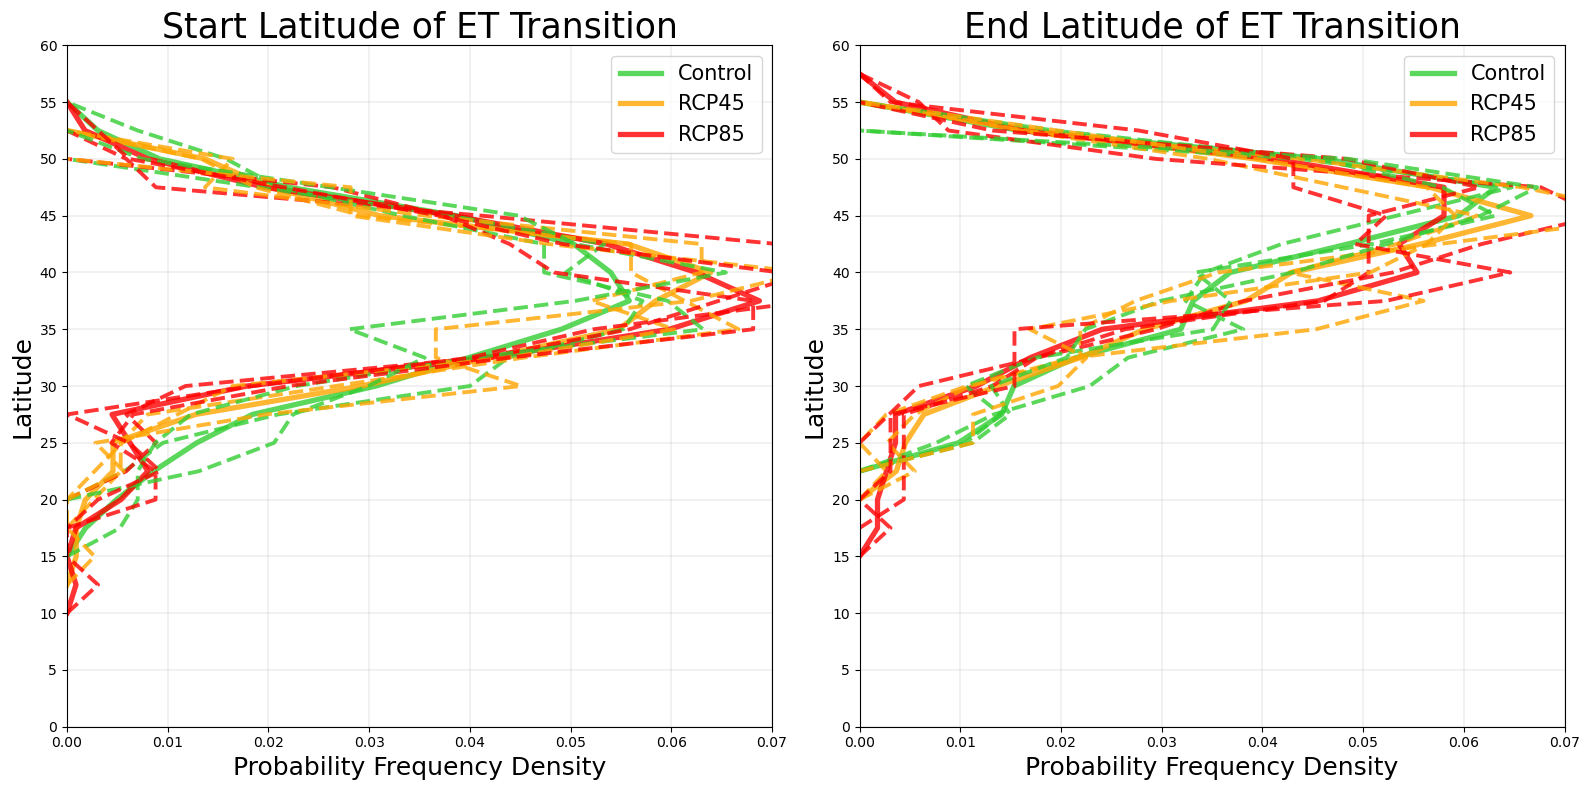

In [57]:
# Start Lat and End Lat
Fig = pyplot.figure(figsize=(16,8))
ET_Prob_Dist_Plot_Raw(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start Lat", True)
ET_Prob_Dist_Plot_Raw(Fig, Control_ET, RCP45_ET, RCP85_ET, "End Lat", True)
pyplot.tight_layout()

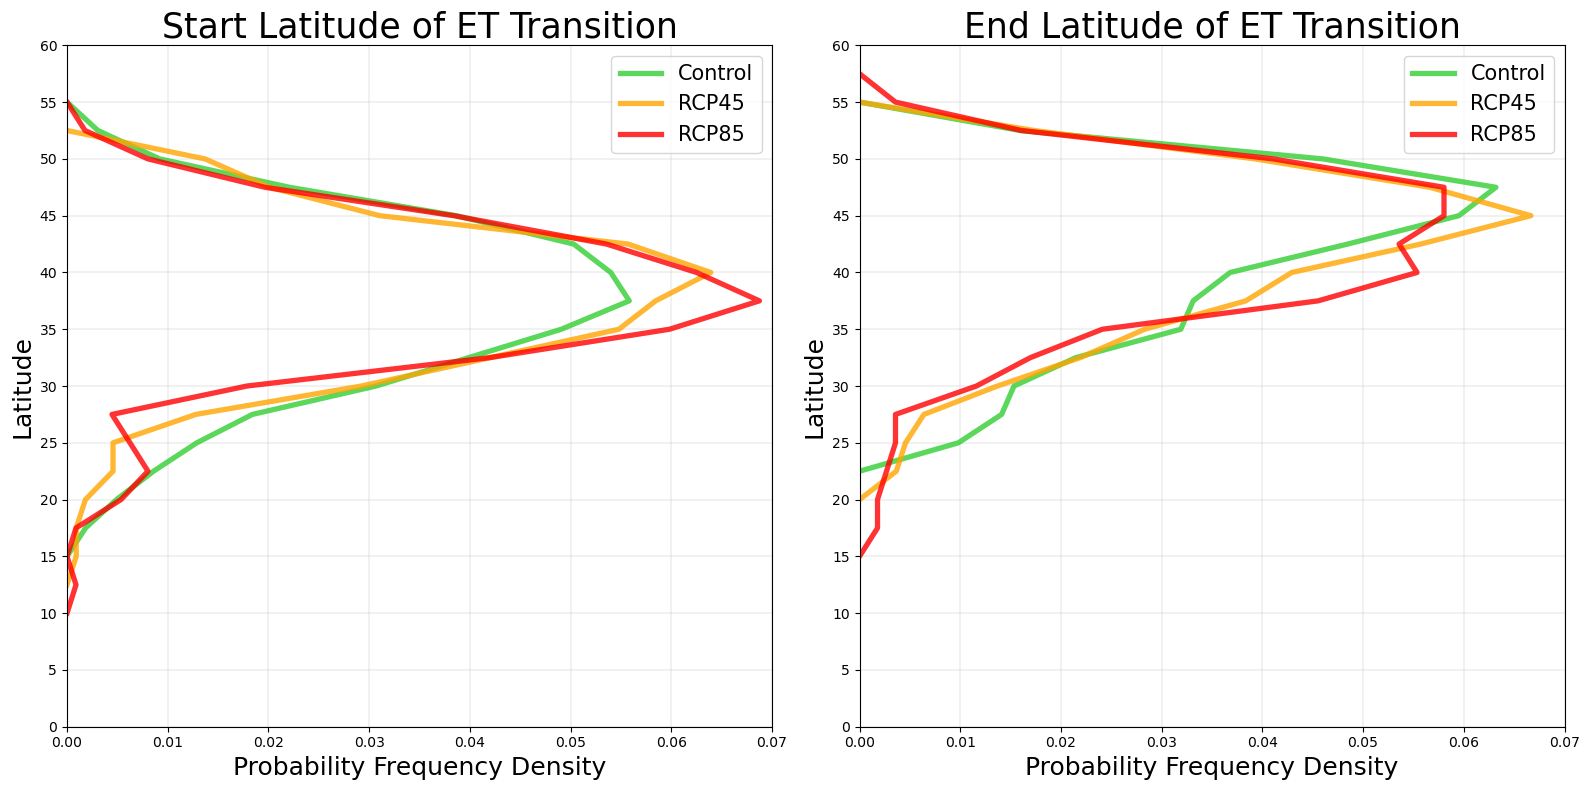

In [58]:
# Start Lat and End Lat
Fig = pyplot.figure(figsize=(16,8))
ET_Prob_Dist_Plot_Raw(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start Lat", False)
ET_Prob_Dist_Plot_Raw(Fig, Control_ET, RCP45_ET, RCP85_ET, "End Lat", False)
pyplot.tight_layout()

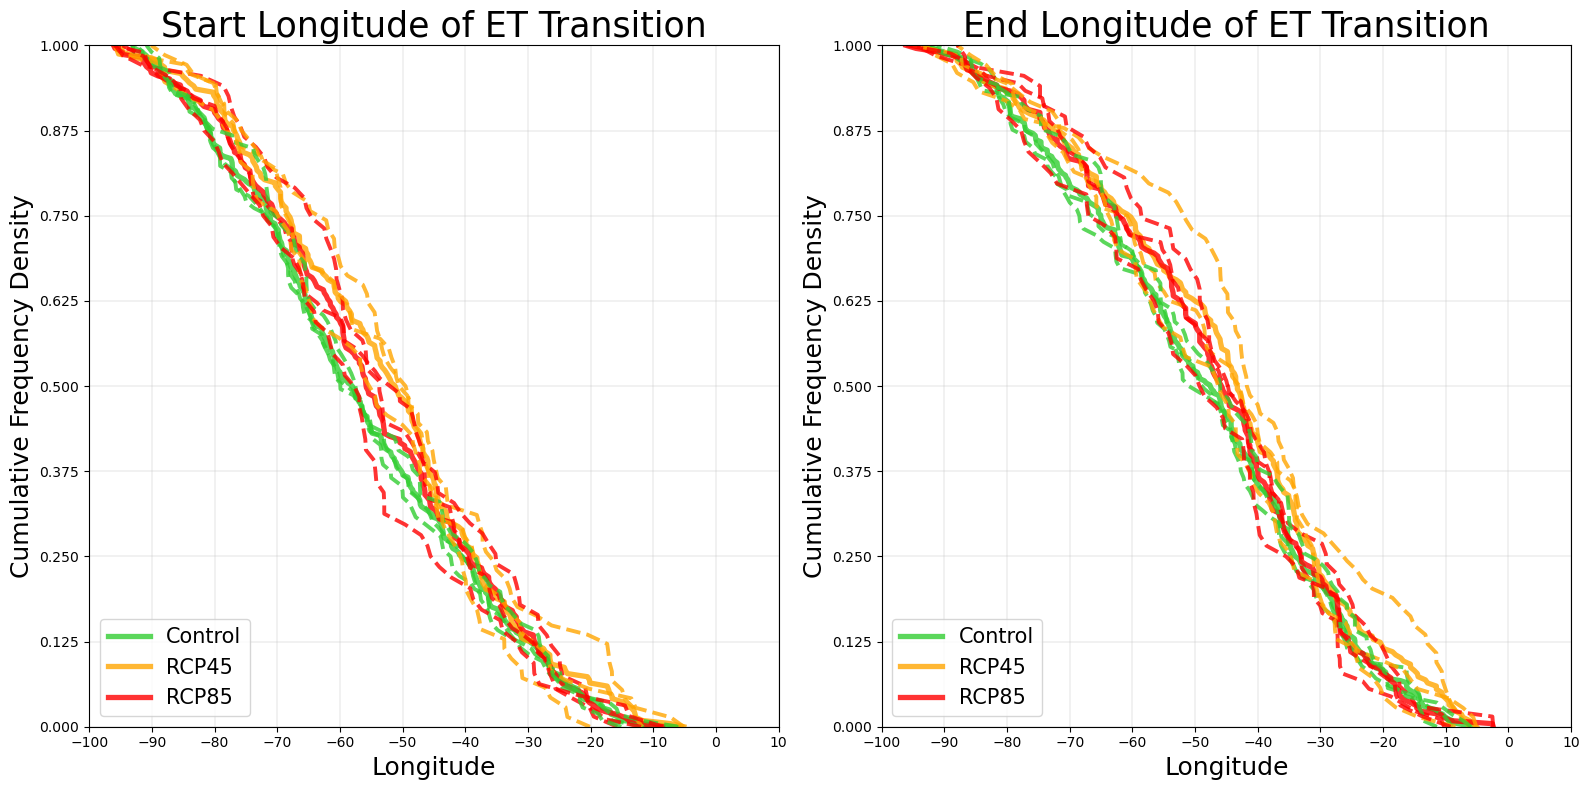

In [59]:
# Start Lon and End Lon
Fig = pyplot.figure(figsize=(16,8))
ET_Cum_Dist_Plot_Raw(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start Lon", True)
ET_Cum_Dist_Plot_Raw(Fig, Control_ET, RCP45_ET, RCP85_ET, "End Lon", True)
pyplot.tight_layout()

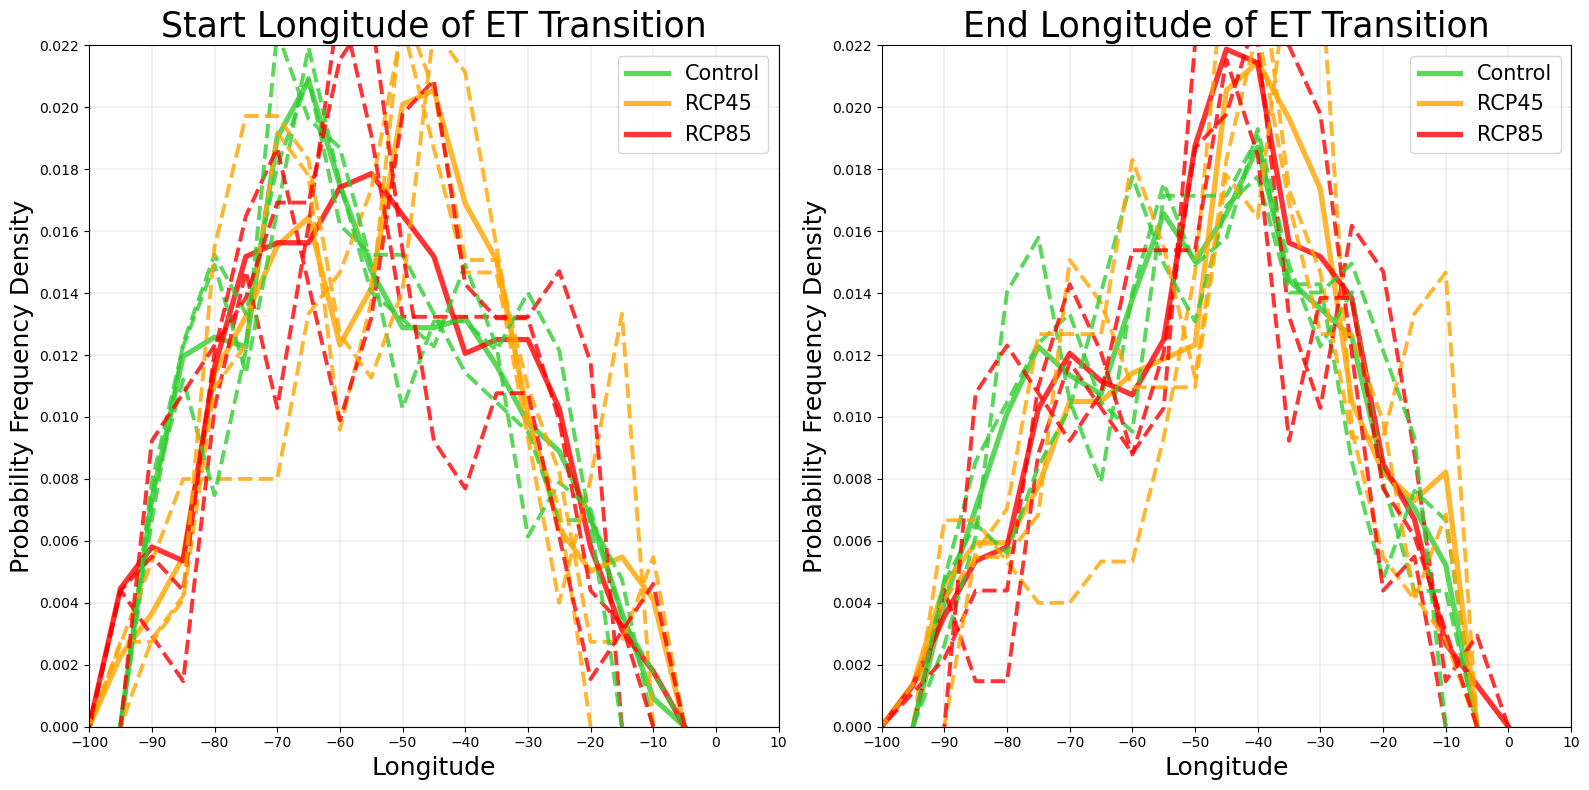

In [60]:
# Start Lon and End Lon
Fig = pyplot.figure(figsize=(16,8))
ET_Prob_Dist_Plot_Raw(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start Lon", True)
ET_Prob_Dist_Plot_Raw(Fig, Control_ET, RCP45_ET, RCP85_ET, "End Lon", True)
pyplot.tight_layout()

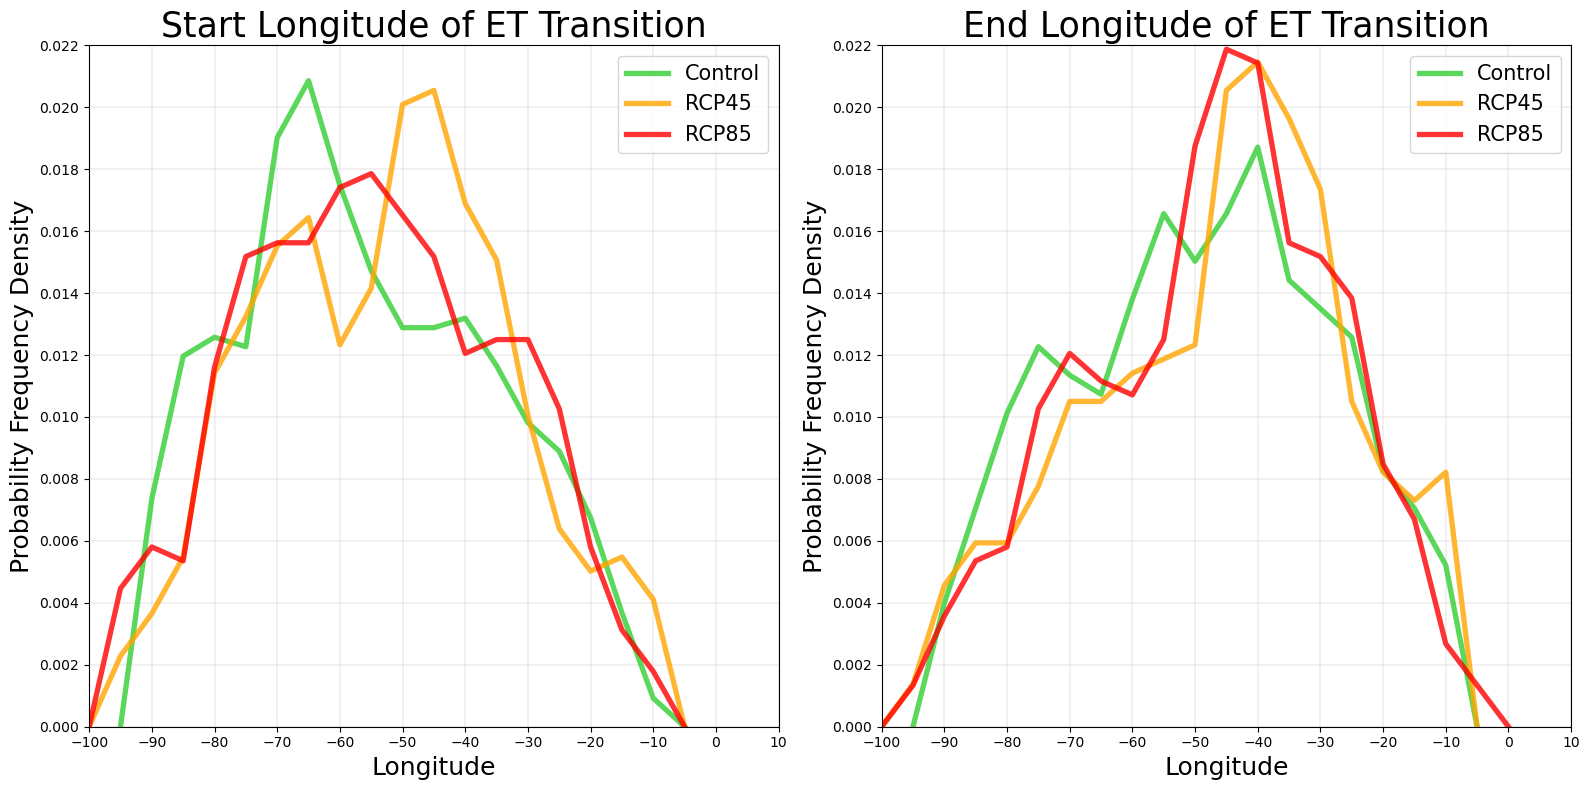

In [61]:
# Start Lon and End Lon
Fig = pyplot.figure(figsize=(16,8))
ET_Prob_Dist_Plot_Raw(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start Lon", False)
ET_Prob_Dist_Plot_Raw(Fig, Control_ET, RCP45_ET, RCP85_ET, "End Lon", False)
pyplot.tight_layout()

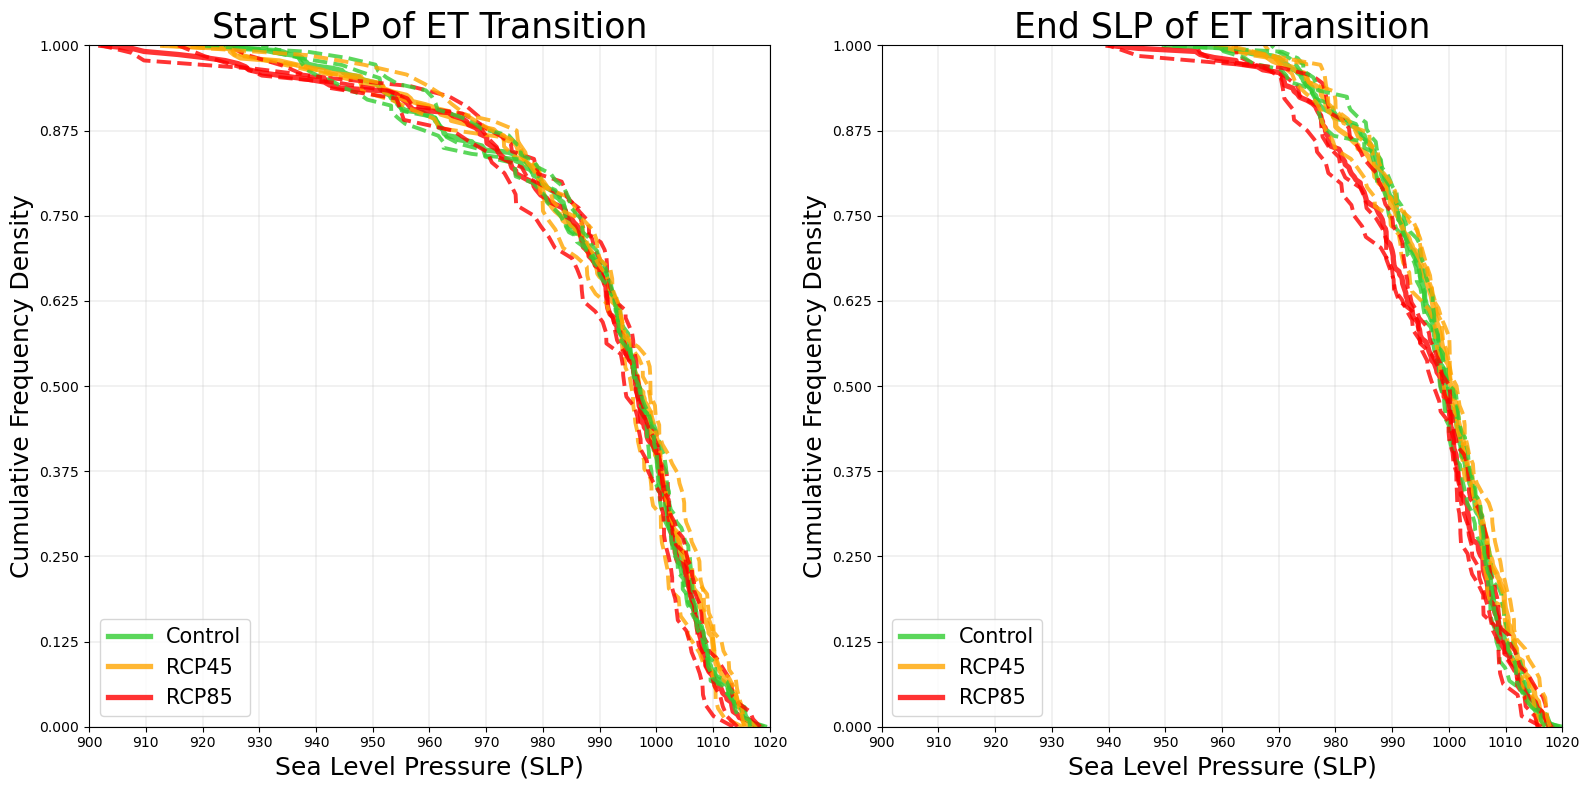

In [62]:
# Start SLP and End SLP
Fig = pyplot.figure(figsize=(16,8))
ET_Cum_Dist_Plot_Raw(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start SLP", True)
ET_Cum_Dist_Plot_Raw(Fig, Control_ET, RCP45_ET, RCP85_ET, "End SLP", True)
pyplot.tight_layout()

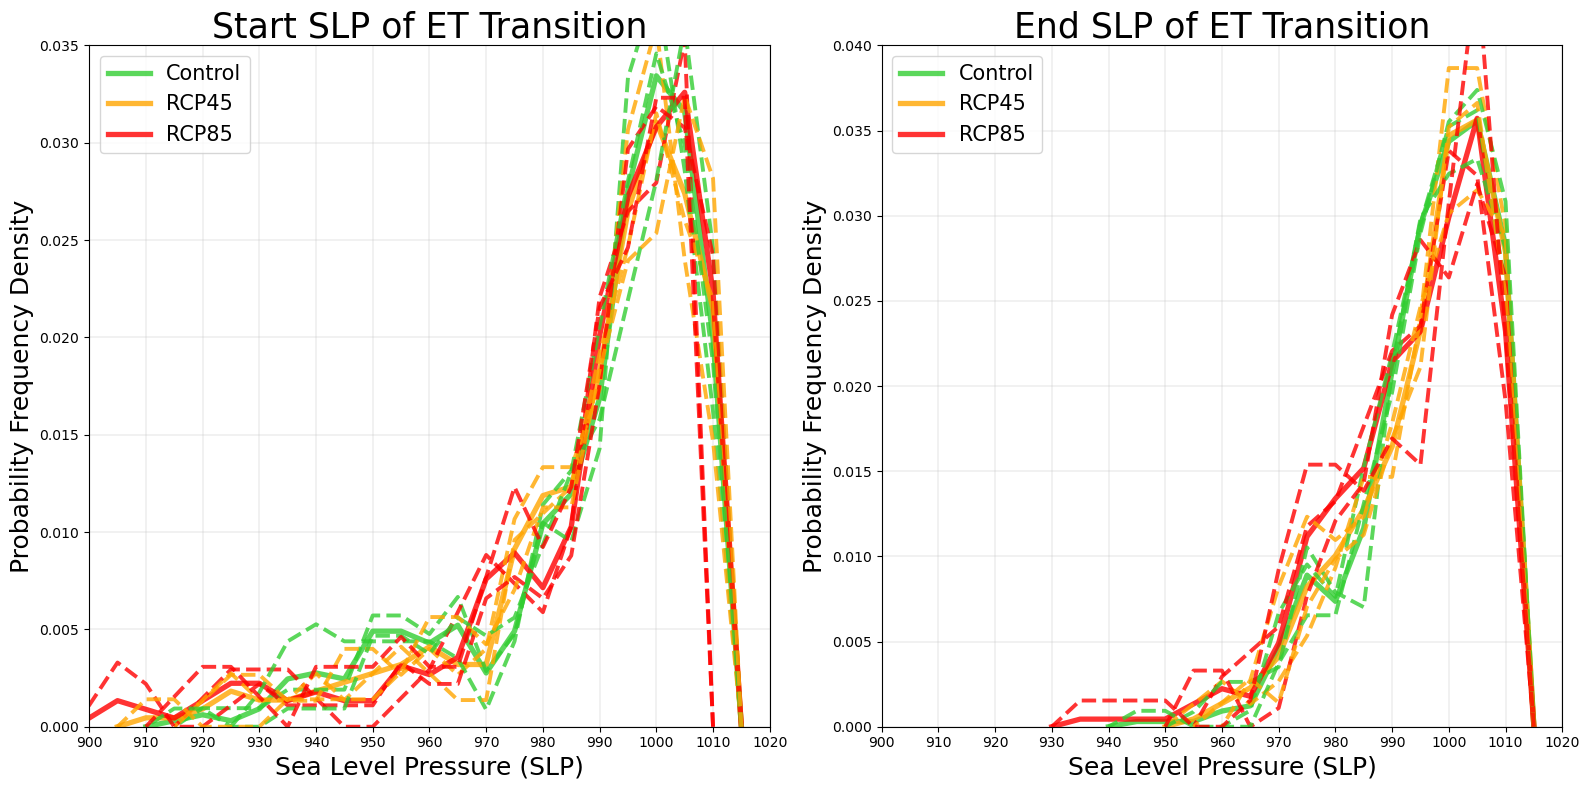

In [63]:
# Start SLP and End SLP
Fig = pyplot.figure(figsize=(16,8))
ET_Prob_Dist_Plot_Raw(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start SLP", True)
ET_Prob_Dist_Plot_Raw(Fig, Control_ET, RCP45_ET, RCP85_ET, "End SLP", True)
pyplot.tight_layout()

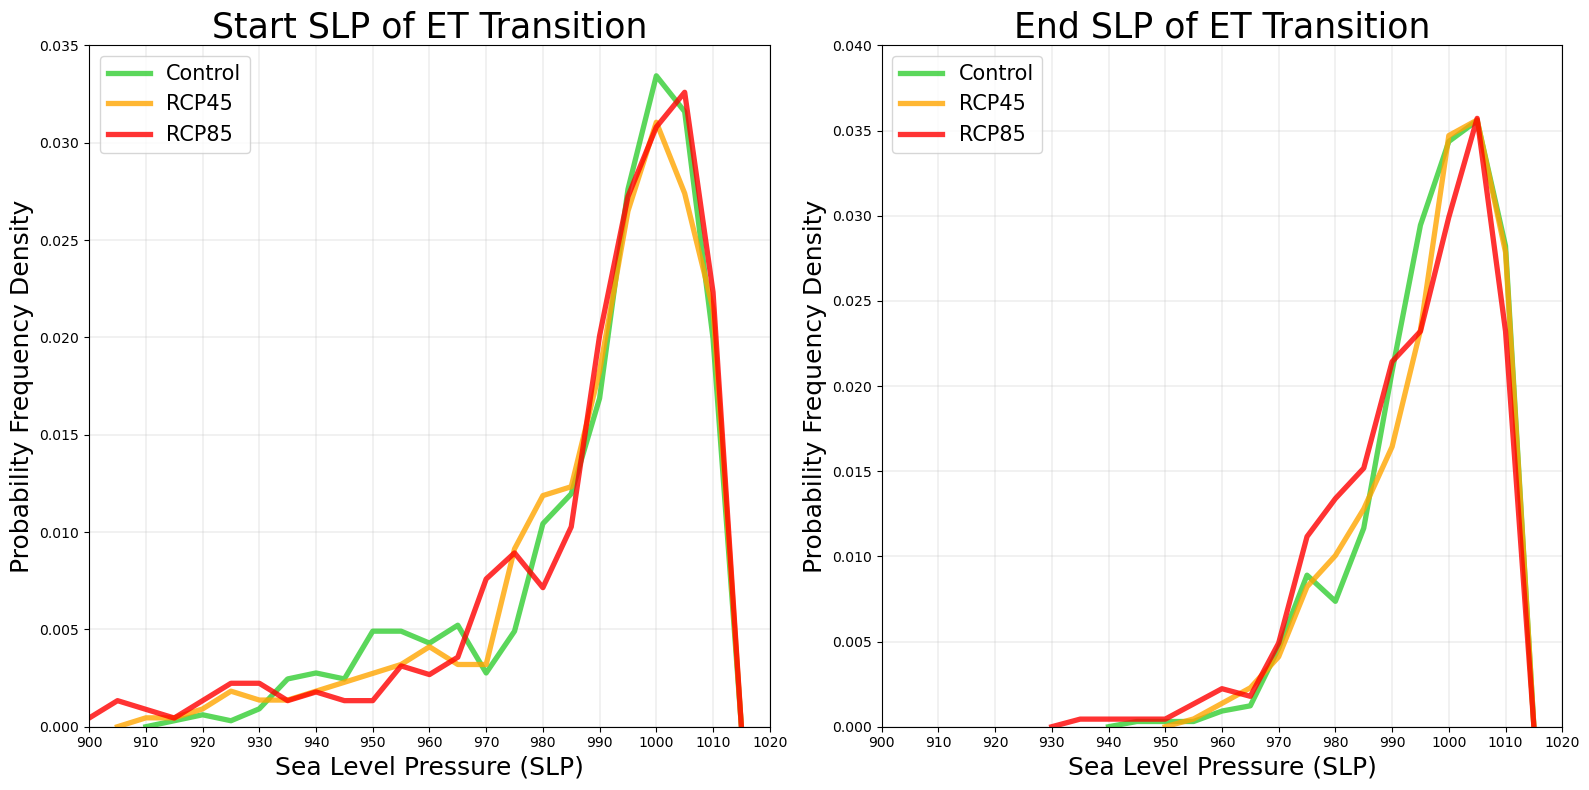

In [64]:
# Start SLP and End SLP
Fig = pyplot.figure(figsize=(16,8))
ET_Prob_Dist_Plot_Raw(Fig, Control_ET, RCP45_ET, RCP85_ET, "Start SLP", False)
ET_Prob_Dist_Plot_Raw(Fig, Control_ET, RCP45_ET, RCP85_ET, "End SLP", False)
pyplot.tight_layout()

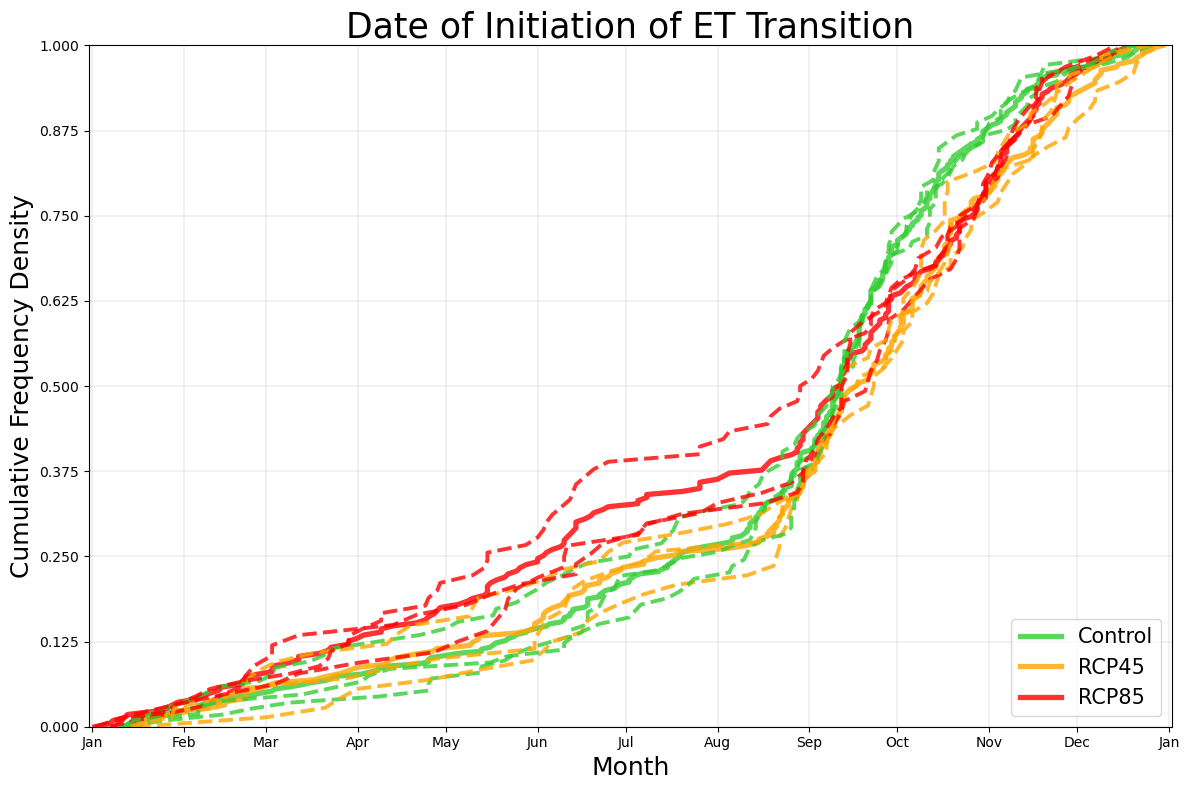

In [65]:
# ET Date
Fig = pyplot.figure(figsize=(12,8))
ET_Cum_Dist_Plot_Raw(Fig, Control_ET_Days, RCP45_ET_Days, RCP85_ET_Days, "Days", True)
pyplot.tight_layout()

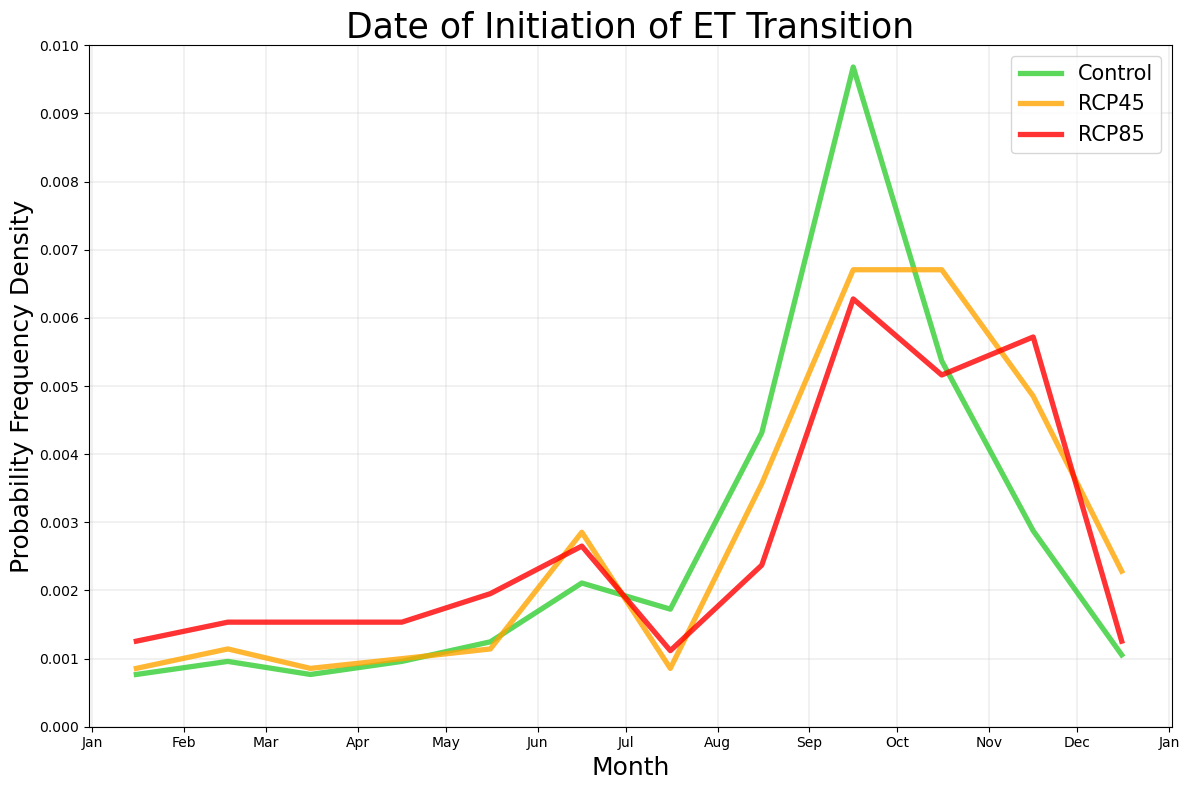

In [117]:
# ET Date
Fig = pyplot.figure(figsize=(12,8))
ET_Prob_Dist_Plot_Raw(Fig, Control_ET_Days, RCP45_ET_Days, RCP85_ET_Days, "Days", False)
pyplot.tight_layout()

In [67]:
# Shuffle Years and Calculate Probability Density Difference of Sample
def Year_Shuffle(DF, Years_Array, Var):
    Years_Sample = Years_Array.copy()
# Shuffle Years
    numpy.random.shuffle(Years_Sample)
    Years_S1 = Years_Sample[:90]
    Years_S2 = Years_Sample[90:183]
    Years_S3 = Years_Sample[183:]
# Apply Probability Density Function
    Prob_Density_S1 = DF_Sample(DF, Years_S1, Var)
    Prob_Density_S2 = DF_Sample(DF, Years_S2, Var)
    Prob_Density_S3 = DF_Sample(DF, Years_S3, Var)
# Calculate Differences in Probability Density
    Prob_Diff_S2_S1 = Prob_Density_S2 - Prob_Density_S1
    Prob_Diff_S3_S1 = Prob_Density_S3 - Prob_Density_S1
    return (Prob_Diff_S2_S1, Prob_Diff_S3_S1)

In [68]:
# Create Sample Dataset and Calculate Distribution
def DF_Sample(DF, Years_Sample, Var):
# Each Year Within the Sample
#    for t in range(len(Years_Sample)):
#        Year = Years_Sample[t]
    DF_Random = DF[DF["Year"].isin(Years_Sample)]
#        Start = datetime.datetime(Year,1,1,0,0,0)
#        End = datetime.datetime(Year+1,1,1,0,0,0)
#        DF_Year = DF[(DF["Start Time"] >= Start) & (DF["Start Time"] < End)]
# Combine The Storms Within Each Year in Sample
#        if t == 0:
#            DF_Random = DF_Year
#        else:
#            DF_Random = pandas.concat([DF_Random, DF_Year])
#    DF_Random = DF_Random.reset_index()
# Apply Probability Distribution Function
    Prob_Density, Vals = Prob_Distri(DF_Random, Var)
    return (Prob_Density)

In [69]:
Month_Days

array([  0.,  31.,  59.,  90., 120., 151., 181., 212., 243., 273., 304.,
       334., 365.])

In [70]:
# Probability Distribution
def Prob_Distri(DF, Var):
    Array = DF[Var]
    Len = len(Array)
    if Var != "Days":
        if Var == "Start Lat" or Var == "End Lat":
            Width = 2.5
            Param = 2.5
            Vals = Create_Bins(10,60,Width)
        elif Var == "Start Lon" or Var == "End Lon":
            Width = 5
            Param = 5
            Vals = Create_Bins(-100,20,Width)
        elif Var == "Start SLP" or Var == "End SLP":
            Width = 5
            Param = 5
            Vals = Create_Bins(900,1020,Width)
        Prob_Count = numpy.zeros(len(Vals))
# Find Number of Values Within the Value Range
        for k in range(len(Vals)):
            Vals_Range = Array[(Array >= Vals[k]-numpy.abs(Param)) & (Array < Vals[k]+numpy.abs(Param))]
            Prob_Count[k] = len(Vals_Range)
# Calculate Probability Density
    else:
        Prob_Count = numpy.zeros(12)
        for k in range(len(Prob_Count)):
            Vals_Range = Array[(Array >= Month_Days[k]) & (Array < Month_Days[k+1])]
            Prob_Count[k] = len(Vals_Range)
        Vals = Month_Days[0:12] + 15
    Prob_Density = Prob_Count / Len
    return (Prob_Density, Vals)

In [71]:
def Compare_Count(Sample, Data, Compare):
    if Data < Sample:
        Compare += 0
    elif Data == Sample:
        Compare += 0.5
    elif Data > Sample:
        Compare += 1
    return (Compare)

In [72]:
# Permutation Test For Significance
def Permu_Test(Control_ET, RCP45_ET, RCP85_ET, Var, Num):
# Combine All Three DataFrames
    ET_All = pandas.concat([Control_ET, RCP45_ET, RCP85_ET]).reset_index()
    ET_All = ET_All.drop("index", axis=1)
    Year = []
    for j in range(len(ET_All)):
        Year.append(ET_All["Start Time"][j].year)
    ET_All["Year"] = Year
#
# Calculate Actual Difference Between Datasets
    Prob_Dist_D1, Vals = Prob_Distri(Control_ET, Var)
    Prob_Dist_D2, Vals = Prob_Distri(RCP45_ET, Var)
    Prob_Dist_D3, Vals = Prob_Distri(RCP85_ET, Var)
    Prob_Diff_D2_D1 = Prob_Dist_D2 - Prob_Dist_D1
    Prob_Diff_D3_D1 = Prob_Dist_D3 - Prob_Dist_D1
#
# Array of Years
    Years_Array = numpy.concatenate(\
    [numpy.arange(1900,1990,1),numpy.arange(2000,2092,1),numpy.arange(2100,2192,1)])
#
# Create Countering Array
    Prob_Diff_C2_C1 = numpy.zeros(len(Prob_Diff_D2_D1))
    Prob_Diff_C3_C1 = numpy.zeros(len(Prob_Diff_D3_D1))
# Repeat Permutation Test Process For N Times
    for n in range(Num):
# Apply Shuffling Years and Creating Sample Function
        Prob_Diff_S2_S1, Prob_Diff_S3_S1 = Year_Shuffle(ET_All, Years_Array, Var)
# Count How Many of Sample Differences are Smaller than the Actual Diff at Each Gridpoint
        for k in range(len(Prob_Diff_S2_S1)):
            Prob_Diff_C2_C1[k] = Compare_Count(Prob_Diff_S2_S1[k], Prob_Diff_D2_D1[k], Prob_Diff_C2_C1[k])
            Prob_Diff_C3_C1[k] = Compare_Count(Prob_Diff_S3_S1[k], Prob_Diff_D3_D1[k], Prob_Diff_C3_C1[k])
#
# Calculate P Value
    P_Val_P2_P1 = Prob_Diff_C2_C1 / Num
    P_Val_P3_P1 = Prob_Diff_C3_C1 / Num
    return (P_Val_P2_P1, P_Val_P3_P1, Prob_Diff_D2_D1, Prob_Diff_D3_D1, Vals)

In [73]:
P_Val_S2_S1, P_Val_S3_S1, Prob_Diff_D2_D1, Prob_Diff_D3_D1, Vals = \
Permu_Test(Control_ET, RCP45_ET, RCP85_ET, "Start Lat", 500)

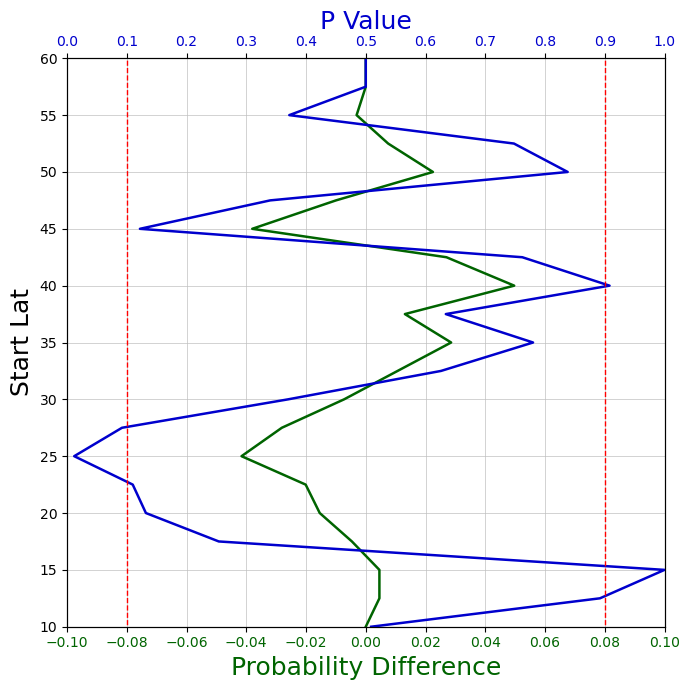

In [74]:
# Create Fig
Fig, Ax1 = pyplot.subplots(figsize=(7,7))
Colour_1 = 'darkgreen'
Colour_2 = 'mediumblue'
#
# Axis For Probability Difference
Ax1.set_xlabel('Probability Difference', color=Colour_1, fontsize=18)
Ax1.set_ylabel('Start Lat', fontsize=18)
Ax1.plot(Prob_Diff_D2_D1, Vals, color=Colour_1, linewidth=1.8)
Ax1.tick_params(axis='x', labelcolor=Colour_1)
Ax1.set_xlim(-0.1,0.1)
Ax1.set_xticks(Create_Bins(-0.1,0.099999,0.02))
Ax1.set_ylim(10,60)
Ax1.set_yticks(Create_Bins(10,60,5))
Gridline = Ax1.grid(linewidth=0.5, color='silver', linestyle='-')
#
# Twin Axis For P Value
Ax2 = Ax1.twiny()
Ax2.set_xlabel('P Value', color=Colour_2, fontsize=18)
Ax2.plot(P_Val_S2_S1, Vals, color=Colour_2, linewidth=1.8)
Ax2.tick_params(axis='x', labelcolor=Colour_2)
Ax2.set_xlim(0,1)
Ax2.set_xticks(Create_Bins(0,1,0.1))
#
# Add Lines For 90% Significance
Ax2.plot([0.1,0.1], [0,90], color='red', linewidth=1, linestyle='--')
Ax2.plot([0.9,0.9], [0,90], color='red', linewidth=1, linestyle='--')
#
Fig.tight_layout()
pyplot.show()

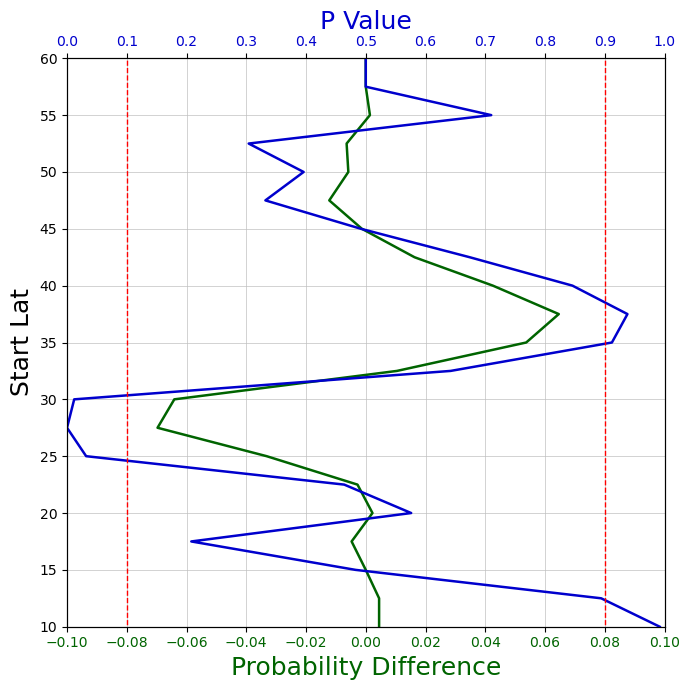

In [75]:
# Create Fig
Fig, Ax1 = pyplot.subplots(figsize=(7,7))
Colour_1 = 'darkgreen'
Colour_2 = 'mediumblue'
#
# Axis For Probability Difference
Ax1.set_xlabel('Probability Difference', color=Colour_1, fontsize=18)
Ax1.set_ylabel('Start Lat', fontsize=18)
Ax1.plot(Prob_Diff_D3_D1, Vals, color=Colour_1, linewidth=1.8)
Ax1.tick_params(axis='x', labelcolor=Colour_1)
Ax1.set_xlim(-0.1,0.1)
Ax1.set_xticks(Create_Bins(-0.1,0.099999,0.02))
Ax1.set_ylim(10,60)
Ax1.set_yticks(Create_Bins(10,60,5))
Gridline = Ax1.grid(linewidth=0.5, color='silver', linestyle='-')
#
# Twin Axis For P Value
Ax2 = Ax1.twiny()
Ax2.set_xlabel('P Value', color=Colour_2, fontsize=18)
Ax2.plot(P_Val_S3_S1, Vals, color=Colour_2, linewidth=1.8)
Ax2.tick_params(axis='x', labelcolor=Colour_2)
Ax2.set_xlim(0,1)
Ax2.set_xticks(Create_Bins(0,1,0.1))
#
# Add Lines For 90% Significance
Ax2.plot([0.1,0.1], [0,90], color='red', linewidth=1, linestyle='--')
Ax2.plot([0.9,0.9], [0,90], color='red', linewidth=1, linestyle='--')
#
Fig.tight_layout()
pyplot.show()

In [76]:
P_Val_S2_S1, P_Val_S3_S1, Prob_Diff_D2_D1, Prob_Diff_D3_D1, Vals = \
Permu_Test(Control_ET, RCP45_ET, RCP85_ET, "End Lat", 500)

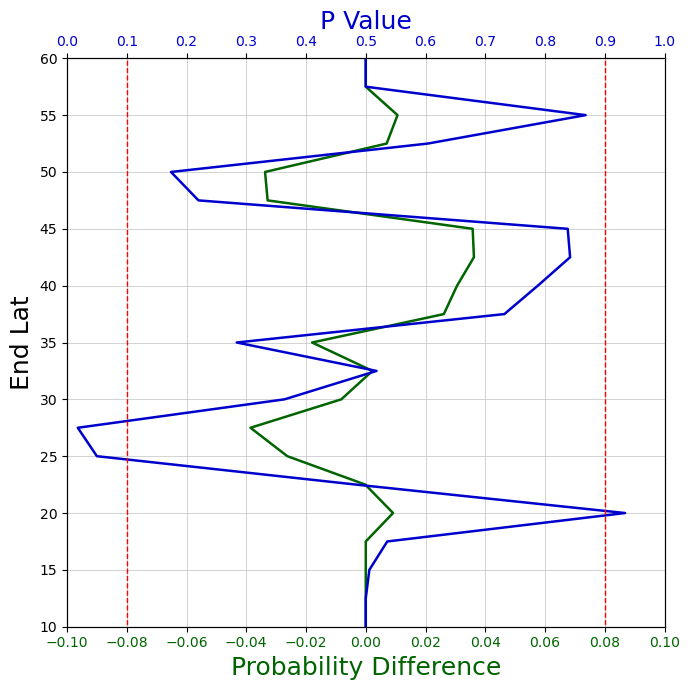

In [77]:
# Create Fig
Fig, Ax1 = pyplot.subplots(figsize=(7,7))
Colour_1 = 'darkgreen'
Colour_2 = 'mediumblue'
#
# Axis For Probability Difference
Ax1.set_xlabel('Probability Difference', color=Colour_1, fontsize=18)
Ax1.set_ylabel('End Lat', fontsize=18)
Ax1.plot(Prob_Diff_D2_D1, Vals, color=Colour_1, linewidth=1.8)
Ax1.tick_params(axis='x', labelcolor=Colour_1)
Ax1.set_xlim(-0.1,0.1)
Ax1.set_xticks(Create_Bins(-0.1,0.099999,0.02))
Ax1.set_ylim(10,60)
Ax1.set_yticks(Create_Bins(10,60,5))
Gridline = Ax1.grid(linewidth=0.5, color='silver', linestyle='-')
#
# Twin Axis For P Value
Ax2 = Ax1.twiny()
Ax2.set_xlabel('P Value', color=Colour_2, fontsize=18)
Ax2.plot(P_Val_S2_S1, Vals, color=Colour_2, linewidth=1.8)
Ax2.tick_params(axis='x', labelcolor=Colour_2)
Ax2.set_xlim(0,1)
Ax2.set_xticks(Create_Bins(0,1,0.1))
#
# Add Lines For 90% Significance
Ax2.plot([0.1,0.1], [0,90], color='red', linewidth=1, linestyle='--')
Ax2.plot([0.9,0.9], [0,90], color='red', linewidth=1, linestyle='--')
#
Fig.tight_layout()
pyplot.show()

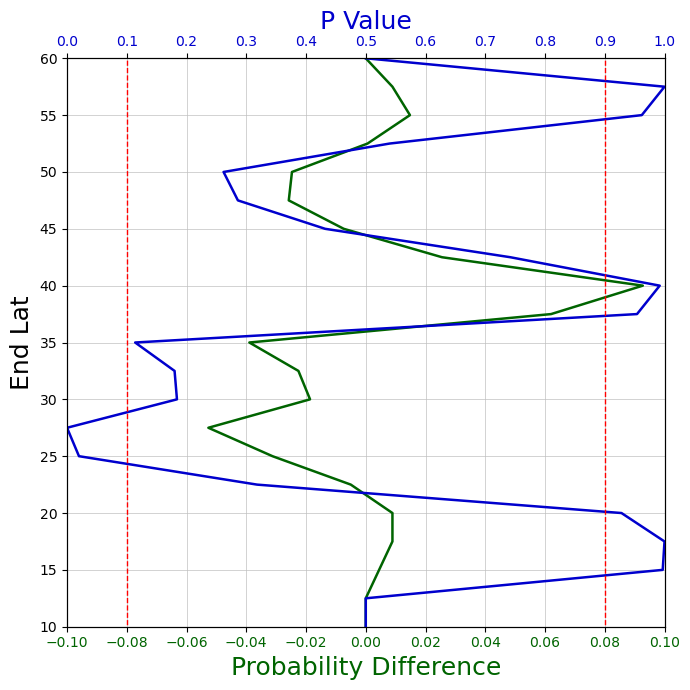

In [78]:
# Create Fig
Fig, Ax1 = pyplot.subplots(figsize=(7,7))
Colour_1 = 'darkgreen'
Colour_2 = 'mediumblue'
#
# Axis For Probability Difference
Ax1.set_xlabel('Probability Difference', color=Colour_1, fontsize=18)
Ax1.set_ylabel('End Lat', fontsize=18)
Ax1.plot(Prob_Diff_D3_D1, Vals, color=Colour_1, linewidth=1.8)
Ax1.tick_params(axis='x', labelcolor=Colour_1)
Ax1.set_xlim(-0.1,0.1)
Ax1.set_xticks(Create_Bins(-0.1,0.099999,0.02))
Ax1.set_ylim(10,60)
Ax1.set_yticks(Create_Bins(10,60,5))
Gridline = Ax1.grid(linewidth=0.5, color='silver', linestyle='-')
#
# Twin Axis For P Value
Ax2 = Ax1.twiny()
Ax2.set_xlabel('P Value', color=Colour_2, fontsize=18)
Ax2.plot(P_Val_S3_S1, Vals, color=Colour_2, linewidth=1.8)
Ax2.tick_params(axis='x', labelcolor=Colour_2)
Ax2.set_xlim(0,1)
Ax2.set_xticks(Create_Bins(0,1,0.1))
#
# Add Lines For 90% Significance
Ax2.plot([0.1,0.1], [0,90], color='red', linewidth=1, linestyle='--')
Ax2.plot([0.9,0.9], [0,90], color='red', linewidth=1, linestyle='--')
#
Fig.tight_layout()
pyplot.show()

In [79]:
P_Val_S2_S1, P_Val_S3_S1, Prob_Diff_D2_D1, Prob_Diff_D3_D1, Vals = \
Permu_Test(Control_ET, RCP45_ET, RCP85_ET, "Start Lon", 500)

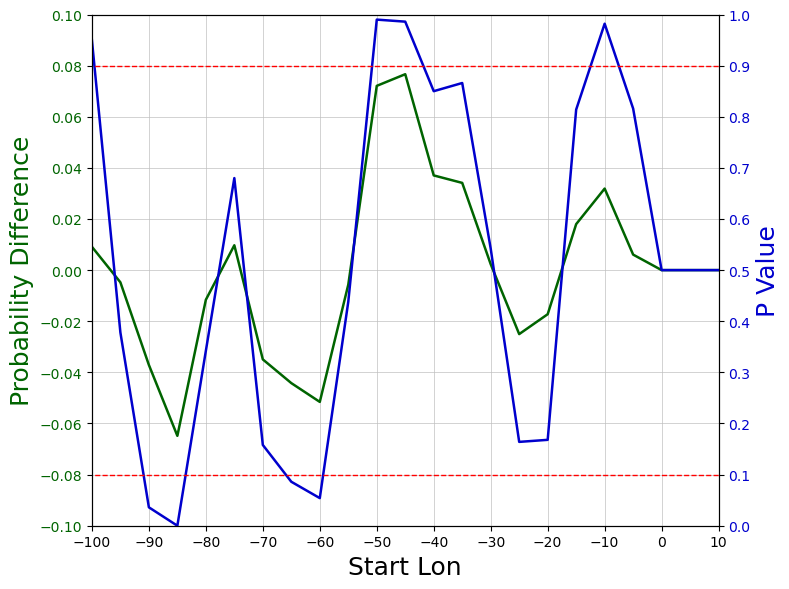

In [80]:
# Create Fig
Fig, Ax1 = pyplot.subplots(figsize=(8,6))
Colour_1 = 'darkgreen'
Colour_2 = 'mediumblue'
#
# Axis For Probability Difference
Ax1.set_ylabel('Probability Difference', color=Colour_1, fontsize=18)
Ax1.set_xlabel('Start Lon', fontsize=18)
Ax1.plot(Vals, Prob_Diff_D2_D1, color=Colour_1, linewidth=1.8)
Ax1.tick_params(axis='y', labelcolor=Colour_1)
Ax1.set_ylim(-0.1,0.1)
Ax1.set_yticks(Create_Bins(-0.1,0.099999,0.02))
Ax1.set_xlim(-100,10)
Ax1.set_xticks(Create_Bins(-100,10,10))
Gridline = Ax1.grid(linewidth=0.5, color='silver', linestyle='-')
#
# Twin Axis For P Value
Ax2 = Ax1.twinx()
Ax2.set_ylabel('P Value', color=Colour_2, fontsize=18)
Ax2.plot(Vals, P_Val_S2_S1, color=Colour_2, linewidth=1.8)
Ax2.tick_params(axis='y', labelcolor=Colour_2)
Ax2.set_ylim(0,1)
Ax2.set_yticks(Create_Bins(0,1,0.1))
#
# Add Lines For 90% Significance
Ax2.plot([-180,180], [0.1,0.1], color='red', linewidth=1, linestyle='--')
Ax2.plot([-180,180], [0.9,0.9], color='red', linewidth=1, linestyle='--')
#
Fig.tight_layout()
pyplot.show()

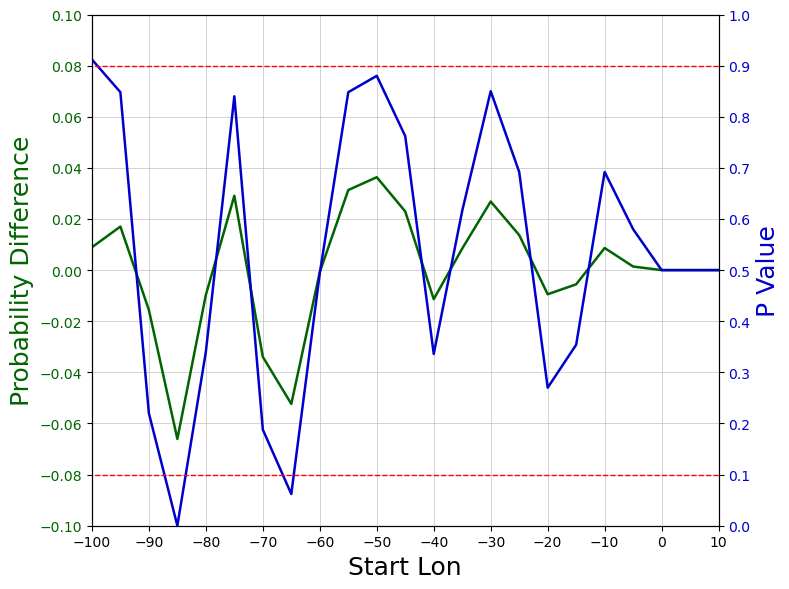

In [81]:
# Create Fig
Fig, Ax1 = pyplot.subplots(figsize=(8,6))
Colour_1 = 'darkgreen'
Colour_2 = 'mediumblue'
#
# Axis For Probability Difference
Ax1.set_ylabel('Probability Difference', color=Colour_1, fontsize=18)
Ax1.set_xlabel('Start Lon', fontsize=18)
Ax1.plot(Vals, Prob_Diff_D3_D1, color=Colour_1, linewidth=1.8)
Ax1.tick_params(axis='y', labelcolor=Colour_1)
Ax1.set_ylim(-0.1,0.1)
Ax1.set_yticks(Create_Bins(-0.1,0.099999,0.02))
Ax1.set_xlim(-100,10)
Ax1.set_xticks(Create_Bins(-100,10,10))
Gridline = Ax1.grid(linewidth=0.5, color='silver', linestyle='-')
#
# Twin Axis For P Value
Ax2 = Ax1.twinx()
Ax2.set_ylabel('P Value', color=Colour_2, fontsize=18)
Ax2.plot(Vals, P_Val_S3_S1, color=Colour_2, linewidth=1.8)
Ax2.tick_params(axis='y', labelcolor=Colour_2)
Ax2.set_ylim(0,1)
Ax2.set_yticks(Create_Bins(0,1,0.1))
#
# Add Lines For 90% Significance
Ax2.plot([-180,180], [0.1,0.1], color='red', linewidth=1, linestyle='--')
Ax2.plot([-180,180], [0.9,0.9], color='red', linewidth=1, linestyle='--')
#
Fig.tight_layout()
pyplot.show()

In [82]:
P_Val_S2_S1, P_Val_S3_S1, Prob_Diff_D2_D1, Prob_Diff_D3_D1, Vals = \
Permu_Test(Control_ET, RCP45_ET, RCP85_ET, "End Lon", 500)

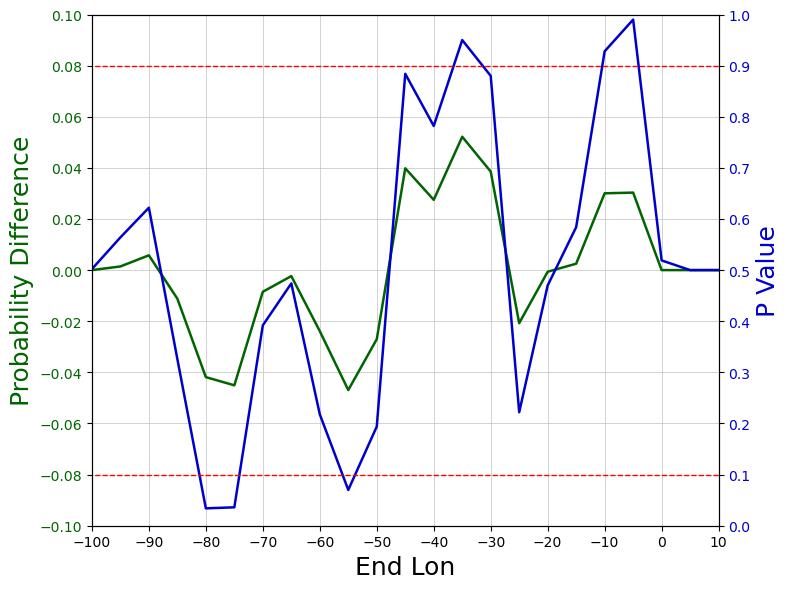

In [83]:
# Create Fig
Fig, Ax1 = pyplot.subplots(figsize=(8,6))
Colour_1 = 'darkgreen'
Colour_2 = 'mediumblue'
#
# Axis For Probability Difference
Ax1.set_ylabel('Probability Difference', color=Colour_1, fontsize=18)
Ax1.set_xlabel('End Lon', fontsize=18)
Ax1.plot(Vals, Prob_Diff_D2_D1, color=Colour_1, linewidth=1.8)
Ax1.tick_params(axis='y', labelcolor=Colour_1)
Ax1.set_ylim(-0.1,0.1)
Ax1.set_yticks(Create_Bins(-0.1,0.099999,0.02))
Ax1.set_xlim(-100,10)
Ax1.set_xticks(Create_Bins(-100,10,10))
Gridline = Ax1.grid(linewidth=0.5, color='silver', linestyle='-')
#
# Twin Axis For P Value
Ax2 = Ax1.twinx()
Ax2.set_ylabel('P Value', color=Colour_2, fontsize=18)
Ax2.plot(Vals, P_Val_S2_S1, color=Colour_2, linewidth=1.8)
Ax2.tick_params(axis='y', labelcolor=Colour_2)
Ax2.set_ylim(0,1)
Ax2.set_yticks(Create_Bins(0,1,0.1))
#
# Add Lines For 90% Significance
Ax2.plot([-180,180], [0.1,0.1], color='red', linewidth=1, linestyle='--')
Ax2.plot([-180,180], [0.9,0.9], color='red', linewidth=1, linestyle='--')
#
Fig.tight_layout()
pyplot.show()

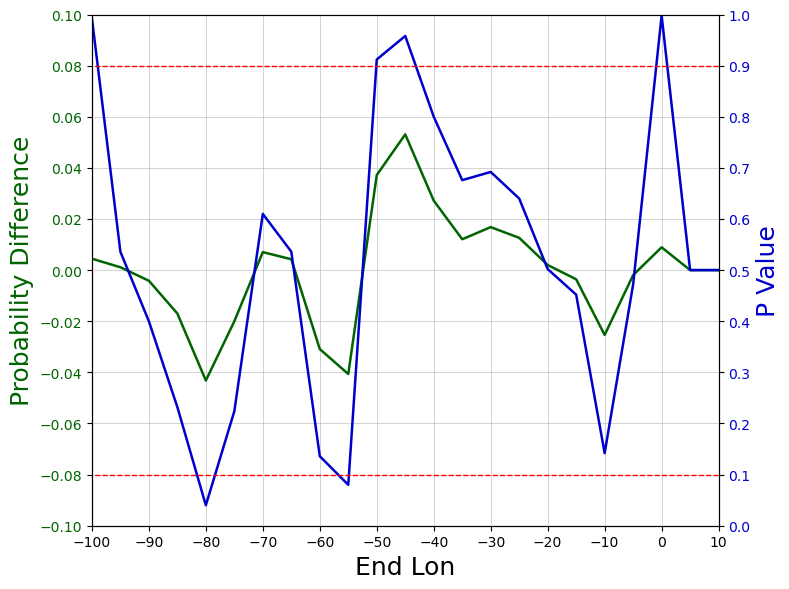

In [84]:
# Create Fig
Fig, Ax1 = pyplot.subplots(figsize=(8,6))
Colour_1 = 'darkgreen'
Colour_2 = 'mediumblue'
#
# Axis For Probability Difference
Ax1.set_ylabel('Probability Difference', color=Colour_1, fontsize=18)
Ax1.set_xlabel('End Lon', fontsize=18)
Ax1.plot(Vals, Prob_Diff_D3_D1, color=Colour_1, linewidth=1.8)
Ax1.tick_params(axis='y', labelcolor=Colour_1)
Ax1.set_ylim(-0.1,0.1)
Ax1.set_yticks(Create_Bins(-0.1,0.099999,0.02))
Ax1.set_xlim(-100,10)
Ax1.set_xticks(Create_Bins(-100,10,10))
Gridline = Ax1.grid(linewidth=0.5, color='silver', linestyle='-')
#
# Twin Axis For P Value
Ax2 = Ax1.twinx()
Ax2.set_ylabel('P Value', color=Colour_2, fontsize=18)
Ax2.plot(Vals, P_Val_S3_S1, color=Colour_2, linewidth=1.8)
Ax2.tick_params(axis='y', labelcolor=Colour_2)
Ax2.set_ylim(0,1)
Ax2.set_yticks(Create_Bins(0,1,0.1))
#
# Add Lines For 90% Significance
Ax2.plot([-180,180], [0.1,0.1], color='red', linewidth=1, linestyle='--')
Ax2.plot([-180,180], [0.9,0.9], color='red', linewidth=1, linestyle='--')
#
Fig.tight_layout()
pyplot.show()

In [85]:
P_Val_S2_S1, P_Val_S3_S1, Prob_Diff_D2_D1, Prob_Diff_D3_D1, Vals = \
Permu_Test(Control_ET, RCP45_ET, RCP85_ET, "Start SLP", 500)

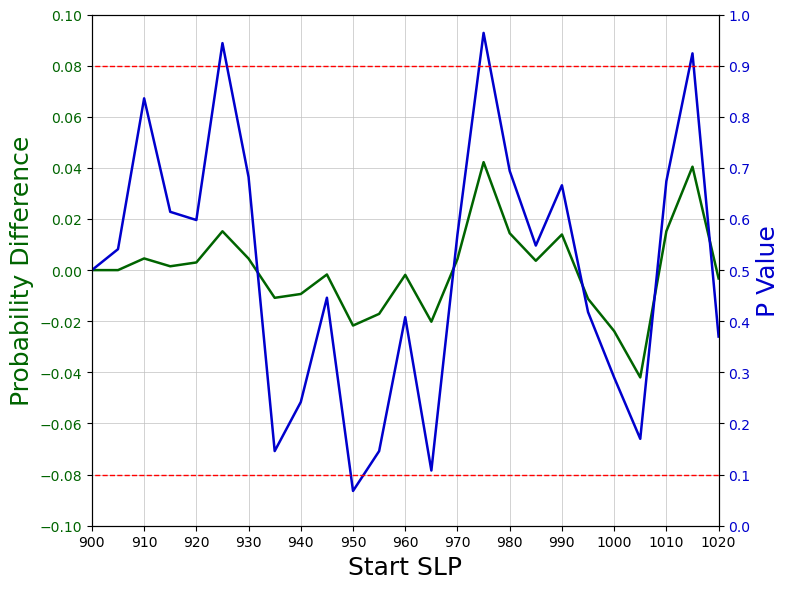

In [86]:
# Create Fig
Fig, Ax1 = pyplot.subplots(figsize=(8,6))
Colour_1 = 'darkgreen'
Colour_2 = 'mediumblue'
#
# Axis For Probability Difference
Ax1.set_ylabel('Probability Difference', color=Colour_1, fontsize=18)
Ax1.set_xlabel('Start SLP', fontsize=18)
Ax1.plot(Vals, Prob_Diff_D2_D1, color=Colour_1, linewidth=1.8)
Ax1.tick_params(axis='y', labelcolor=Colour_1)
Ax1.set_ylim(-0.1,0.1)
Ax1.set_yticks(Create_Bins(-0.1,0.099999,0.02))
Ax1.set_xlim(900,1020)
Ax1.set_xticks(Create_Bins(900,1020,10))
Gridline = Ax1.grid(linewidth=0.5, color='silver', linestyle='-')
#
# Twin Axis For P Value
Ax2 = Ax1.twinx()
Ax2.set_ylabel('P Value', color=Colour_2, fontsize=18)
Ax2.plot(Vals, P_Val_S2_S1, color=Colour_2, linewidth=1.8)
Ax2.tick_params(axis='y', labelcolor=Colour_2)
Ax2.set_ylim(0,1)
Ax2.set_yticks(Create_Bins(0,1,0.1))
#
# Add Lines For 90% Significance
Ax2.plot([800,1100], [0.1,0.1], color='red', linewidth=1, linestyle='--')
Ax2.plot([800,1100], [0.9,0.9], color='red', linewidth=1, linestyle='--')
#
Fig.tight_layout()
pyplot.show()

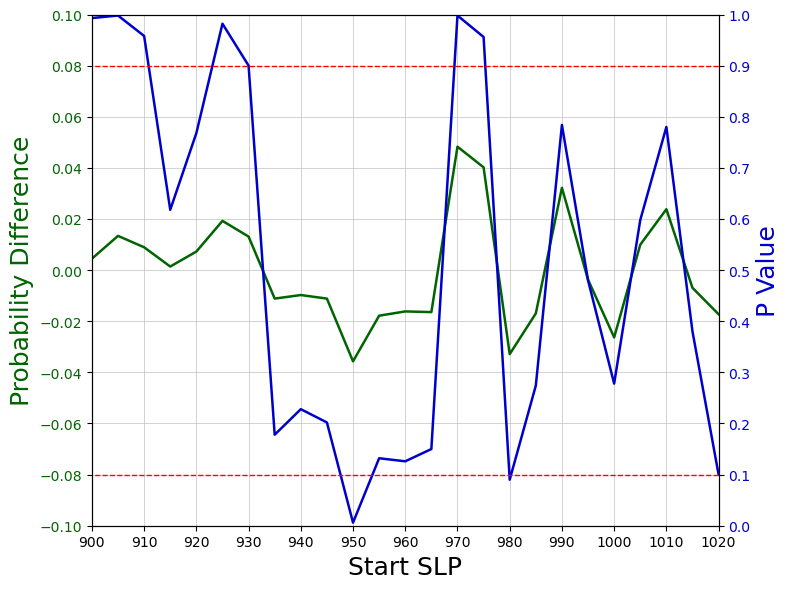

In [87]:
# Create Fig
Fig, Ax1 = pyplot.subplots(figsize=(8,6))
Colour_1 = 'darkgreen'
Colour_2 = 'mediumblue'
#
# Axis For Probability Difference
Ax1.set_ylabel('Probability Difference', color=Colour_1, fontsize=18)
Ax1.set_xlabel('Start SLP', fontsize=18)
Ax1.plot(Vals, Prob_Diff_D3_D1, color=Colour_1, linewidth=1.8)
Ax1.tick_params(axis='y', labelcolor=Colour_1)
Ax1.set_ylim(-0.1,0.1)
Ax1.set_yticks(Create_Bins(-0.1,0.099999,0.02))
Ax1.set_xlim(900,1020)
Ax1.set_xticks(Create_Bins(900,1020,10))
Gridline = Ax1.grid(linewidth=0.5, color='silver', linestyle='-')
#
# Twin Axis For P Value
Ax2 = Ax1.twinx()
Ax2.set_ylabel('P Value', color=Colour_2, fontsize=18)
Ax2.plot(Vals, P_Val_S3_S1, color=Colour_2, linewidth=1.8)
Ax2.tick_params(axis='y', labelcolor=Colour_2)
Ax2.set_ylim(0,1)
Ax2.set_yticks(Create_Bins(0,1,0.1))
#
# Add Lines For 90% Significance
Ax2.plot([800,1100], [0.1,0.1], color='red', linewidth=1, linestyle='--')
Ax2.plot([800,1100], [0.9,0.9], color='red', linewidth=1, linestyle='--')
#
Fig.tight_layout()
pyplot.show()

In [88]:
P_Val_S2_S1, P_Val_S3_S1, Prob_Diff_D2_D1, Prob_Diff_D3_D1, Vals = \
Permu_Test(Control_ET, RCP45_ET, RCP85_ET, "End SLP", 500)

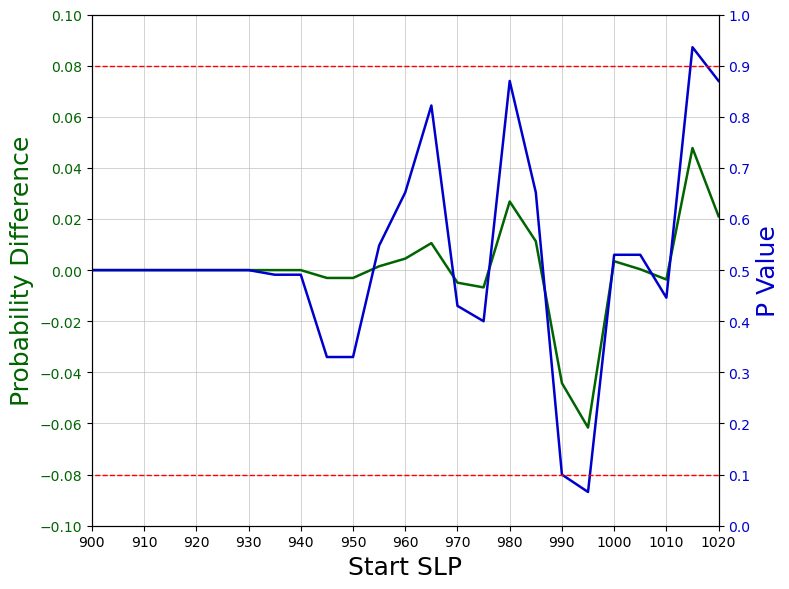

In [89]:
# Create Fig
Fig, Ax1 = pyplot.subplots(figsize=(8,6))
Colour_1 = 'darkgreen'
Colour_2 = 'mediumblue'
#
# Axis For Probability Difference
Ax1.set_ylabel('Probability Difference', color=Colour_1, fontsize=18)
Ax1.set_xlabel('End SLP', fontsize=18)
Ax1.plot(Vals, Prob_Diff_D2_D1, color=Colour_1, linewidth=1.8)
Ax1.tick_params(axis='y', labelcolor=Colour_1)
Ax1.set_ylim(-0.1,0.1)
Ax1.set_yticks(Create_Bins(-0.1,0.099999,0.02))
Ax1.set_xlim(900,1020)
Ax1.set_xticks(Create_Bins(900,1020,10))
Gridline = Ax1.grid(linewidth=0.5, color='silver', linestyle='-')
#
# Twin Axis For P Value
Ax2 = Ax1.twinx()
Ax2.set_ylabel('P Value', color=Colour_2, fontsize=18)
Ax2.plot(Vals, P_Val_S2_S1, color=Colour_2, linewidth=1.8)
Ax2.tick_params(axis='y', labelcolor=Colour_2)
Ax2.set_ylim(0,1)
Ax2.set_yticks(Create_Bins(0,1,0.1))
#
# Add Lines For 90% Significance
Ax2.plot([800,1100], [0.1,0.1], color='red', linewidth=1, linestyle='--')
Ax2.plot([800,1100], [0.9,0.9], color='red', linewidth=1, linestyle='--')
#
Fig.tight_layout()
pyplot.show()

In [ ]:
# Create Fig
Fig, Ax1 = pyplot.subplots(figsize=(8,6))
Colour_1 = 'darkgreen'
Colour_2 = 'mediumblue'
#
# Axis For Probability Difference
Ax1.set_ylabel('Probability Difference', color=Colour_1, fontsize=18)
Ax1.set_xlabel('End SLP', fontsize=18)
Ax1.plot(Vals, Prob_Diff_D3_D1, color=Colour_1, linewidth=1.8)
Ax1.tick_params(axis='y', labelcolor=Colour_1)
Ax1.set_ylim(-0.1,0.1)
Ax1.set_yticks(Create_Bins(-0.1,0.099999,0.02))
Ax1.set_xlim(900,1020)
Ax1.set_xticks(Create_Bins(900,1020,10))
Gridline = Ax1.grid(linewidth=0.5, color='silver', linestyle='-')
#
# Twin Axis For P Value
Ax2 = Ax1.twinx()
Ax2.set_ylabel('P Value', color=Colour_2, fontsize=18)
Ax2.plot(Vals, P_Val_S3_S1, color=Colour_2, linewidth=1.8)
Ax2.tick_params(axis='y', labelcolor=Colour_2)
Ax2.set_ylim(0,1)
Ax2.set_yticks(Create_Bins(0,1,0.1))
#
# Add Lines For 90% Significance
Ax2.plot([800,1100], [0.1,0.1], color='red', linewidth=1, linestyle='--')
Ax2.plot([800,1100], [0.9,0.9], color='red', linewidth=1, linestyle='--')
#
Fig.tight_layout()
pyplot.show()

In [90]:
P_Val_S2_S1, P_Val_S3_S1, Prob_Diff_D2_D1, Prob_Diff_D3_D1, Vals = \
Permu_Test(Control_ET_Days, RCP45_ET_Days, RCP85_ET_Days, "Days", 500)

In [91]:
print (P_Val_S2_S1)
print (P_Val_S3_S1)
print (Prob_Diff_D2_D1)
print (Prob_Diff_D3_D1)
print (Vals)

[0.564 0.596 0.578 0.602 0.408 0.73  0.042 0.202 0.006 0.856 0.972 0.978]
[0.828 0.75  0.952 0.908 0.888 0.786 0.15  0.012 0.002 0.42  0.998 0.54 ]
[ 0.00285738  0.00435611  0.00285738  0.00435611 -0.00334762  0.01470712
 -0.03238367 -0.02388156 -0.09970025  0.03370031  0.05716167  0.03931703]
[ 0.01563869  0.01257121  0.02456727  0.02149978  0.0226227   0.01733677
 -0.01950044 -0.06214395 -0.10418493 -0.00660057  0.07622152  0.00197195]
[ 15.  46.  74. 105. 135. 166. 196. 227. 258. 288. 319. 349.]


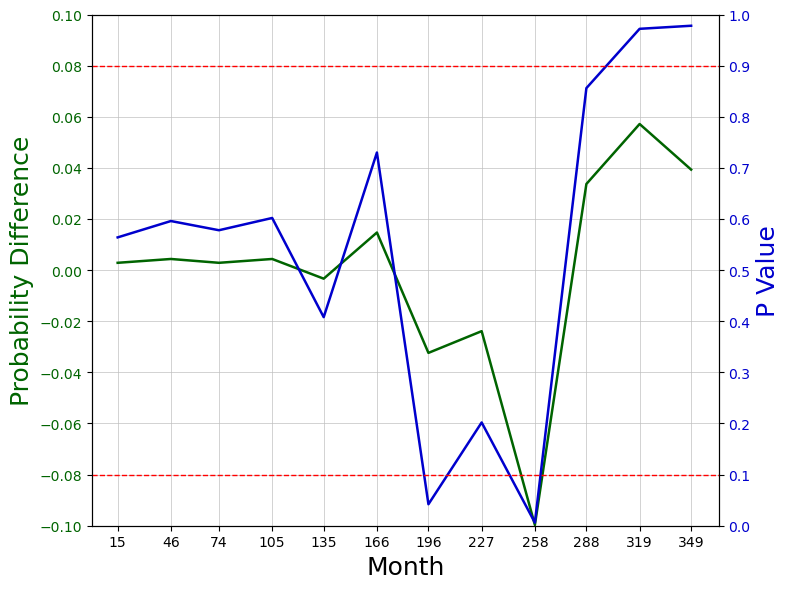

In [92]:
# Create Fig
Fig, Ax1 = pyplot.subplots(figsize=(8,6))
Colour_1 = 'darkgreen'
Colour_2 = 'mediumblue'
#
# Axis For Probability Difference
Ax1.set_ylabel('Probability Difference', color=Colour_1, fontsize=18)
Ax1.set_xlabel('Month', fontsize=18)
Ax1.plot(Vals, Prob_Diff_D2_D1, color=Colour_1, linewidth=1.8)
Ax1.tick_params(axis='y', labelcolor=Colour_1)
Ax1.set_ylim(-0.1,0.1)
Ax1.set_yticks(Create_Bins(-0.1,0.099999,0.02))
Ax1.set_xlim(0,365)
Ax1.set_xticks(Vals)
Gridline = Ax1.grid(linewidth=0.5, color='silver', linestyle='-')
#
# Twin Axis For P Value
Ax2 = Ax1.twinx()
Ax2.set_ylabel('P Value', color=Colour_2, fontsize=18)
Ax2.plot(Vals, P_Val_S2_S1, color=Colour_2, linewidth=1.8)
Ax2.tick_params(axis='y', labelcolor=Colour_2)
Ax2.set_ylim(0,1)
Ax2.set_yticks(Create_Bins(0,1,0.1))
#
# Add Lines For 90% Significance
Ax2.plot([0,365], [0.1,0.1], color='red', linewidth=1, linestyle='--')
Ax2.plot([0,365], [0.9,0.9], color='red', linewidth=1, linestyle='--')
#
Fig.tight_layout()
pyplot.show()

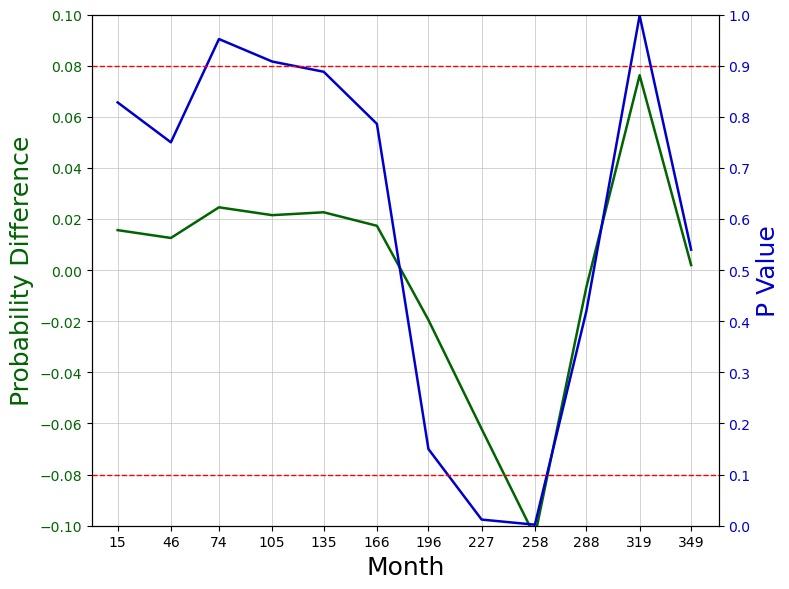

In [93]:
# Create Fig
Fig, Ax1 = pyplot.subplots(figsize=(8,6))
Colour_1 = 'darkgreen'
Colour_2 = 'mediumblue'
#
# Axis For Probability Difference
Ax1.set_ylabel('Probability Difference', color=Colour_1, fontsize=18)
Ax1.set_xlabel('Month', fontsize=18)
Ax1.plot(Vals, Prob_Diff_D3_D1, color=Colour_1, linewidth=1.8)
Ax1.tick_params(axis='y', labelcolor=Colour_1)
Ax1.set_ylim(-0.1,0.1)
Ax1.set_yticks(Create_Bins(-0.1,0.099999,0.02))
Ax1.set_xlim(0,365)
Ax1.set_xticks(Vals)
Gridline = Ax1.grid(linewidth=0.5, color='silver', linestyle='-')
#
# Twin Axis For P Value
Ax2 = Ax1.twinx()
Ax2.set_ylabel('P Value', color=Colour_2, fontsize=18)
Ax2.plot(Vals, P_Val_S3_S1, color=Colour_2, linewidth=1.8)
Ax2.tick_params(axis='y', labelcolor=Colour_2)
Ax2.set_ylim(0,1)
Ax2.set_yticks(Create_Bins(0,1,0.1))
#
# Add Lines For 90% Significance
Ax2.plot([0,365], [0.1,0.1], color='red', linewidth=1, linestyle='--')
Ax2.plot([0,365], [0.9,0.9], color='red', linewidth=1, linestyle='--')
#
Fig.tight_layout()
pyplot.show()

In [94]:
# Shuffle Values From All Three Datasets and Use 200 Values For Each Sample
def Values_Shuffle(Control_ET, RCP45_ET, RCP85_ET, Var, Percentiles):
    Control_Array = numpy.array(Control_ET[Var])
    RCP45_Array = numpy.array(RCP45_ET[Var])
    RCP85_Array = numpy.array(RCP85_ET[Var])
# Combine Arrays and Shuffle
    Shuffle_Array = numpy.concatenate([Control_Array, RCP45_Array, RCP85_Array])
    numpy.random.shuffle(Shuffle_Array)
# Separate Into Three Arrays Each With 200 Values
    Array_S1 = Shuffle_Array[0:200]
    Array_S2 = Shuffle_Array[200:400]
    Array_S3 = Shuffle_Array[400:600]
#
# Calculate Cumulative Percentile of Distribution For Each Array
    Percentile_S1 = Find_Percentile(Array_S1, Percentiles)
    Percentile_S2 = Find_Percentile(Array_S2, Percentiles)
    Percentile_S3 = Find_Percentile(Array_S3, Percentiles)
#
# Calculate Differences in Percentile Values
    Ptile_Diff_S2_S1 = Percentile_S2 - Percentile_S1
    Ptile_Diff_S3_S1 = Percentile_S3 - Percentile_S1
    return (Ptile_Diff_S2_S1, Ptile_Diff_S3_S1)

In [95]:
def Find_Percentile(Array, Percentiles):
    Len = len(Array)
    Indexes = numpy.arange(0,Len,1)
    Values = numpy.zeros(len(Percentiles))
    Array_Sorted = numpy.sort(Array)
    for p in range(len(Values)):
        Perc_i = Len * Percentiles[p]
        if p == 0:
            Perc_Value = Array_Sorted[0]
        elif p == len(Percentiles)-1:
            Perc_Value = Array_Sorted[Len-1]
        else:
            if Perc_i % 1 == 0:
                i = int(Perc_i)
                Perc_Value = numpy.mean([Array_Sorted[i-1], Array_Sorted[i]])
            elif (Perc_i - 0.5) % 1 == 0:
                i = int(Perc_i - 0.5)
                Perc_Value = Array_Sorted[i]
            elif (Perc_i - int(Perc_i)) <= 0.25:
                i = int(Perc_i)
                Perc_Value = numpy.mean([Array_Sorted[i-1], Array_Sorted[i]])
            elif (Perc_i - int(Perc_i)) >= 0.75:
                i = int(Perc_i)
                Perc_Value = numpy.mean([Array_Sorted[i], Array_Sorted[i+1]])
            else:
                i = int(round(Perc_i - 0.5))
                Perc_Value = Array_Sorted[i]
        Values[p] = Perc_Value
    return (Values)

In [96]:
# Permutation Test For Significance Using Cumulative Distribution Percentiles
def Permu_Test_Percentile(Control_ET, RCP45_ET, RCP85_ET, Var, Percentiles, Num):
# Calculate Actual Difference Between Cumulative Percentiles of Distributions
    Percentile_D1 = Find_Percentile(numpy.array(Control_ET[Var]), Percentiles)
    Percentile_D2 = Find_Percentile(numpy.array(RCP45_ET[Var]), Percentiles)
    Percentile_D3 = Find_Percentile(numpy.array(RCP85_ET[Var]), Percentiles)
    Ptile_Diff_D2_D1 = Percentile_D2 - Percentile_D1
    Ptile_Diff_D3_D1 = Percentile_D3 - Percentile_D1
#
# Create Counting Array
    Ptile_Diff_C2_C1 = numpy.zeros(len(Ptile_Diff_D2_D1))
    Ptile_Diff_C3_C1 = numpy.zeros(len(Ptile_Diff_D3_D1))
# Repeat Permutation Test Process For N Times
    for n in range(Num):
# Apply Shuffling Values Function to Get Sample Differences Between Percentiles
        Ptile_Diff_S2_S1, Ptile_Diff_S3_S1 = Values_Shuffle(Control_ET, RCP45_ET, RCP85_ET, Var, Percentiles)
# Count How Many of Sample Differences are Smaller than the Actual Diff at Each Gridpoint
        for k in range(len(Ptile_Diff_S2_S1)):
            Ptile_Diff_C2_C1[k] = Compare_Count(Ptile_Diff_S2_S1[k], Ptile_Diff_D2_D1[k], Ptile_Diff_C2_C1[k])
            Ptile_Diff_C3_C1[k] = Compare_Count(Ptile_Diff_S3_S1[k], Ptile_Diff_D3_D1[k], Ptile_Diff_C3_C1[k])
#
# Calculate P Value
    P_Val_P2_P1 = Ptile_Diff_C2_C1 / Num
    P_Val_P3_P1 = Ptile_Diff_C3_C1 / Num
    return (P_Val_P2_P1, P_Val_P3_P1, Ptile_Diff_D2_D1, Ptile_Diff_D3_D1)

In [97]:
Percentiles = Create_Bins(0,1,0.125)
P_Val_P2_P1, P_Val_P3_P1, Ptile_Diff_D2_D1, Ptile_Diff_D3_D1 = \
Permu_Test_Percentile(Control_ET, RCP45_ET, RCP85_ET, "Start Lat", Percentiles, 500)

In [98]:
print (P_Val_P2_P1)
print (Ptile_Diff_D2_D1)
print (Percentiles)

[0.334 0.968 0.938 0.83  0.902 0.737 0.422 0.504 0.446]
[-3.26   2.125  1.26   0.715  1.095  0.505 -0.15  -0.11  -0.5  ]
[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


In [99]:
print (P_Val_P3_P1)
print (Ptile_Diff_D3_D1)
print (Percentiles)

[0.22  0.986 0.978 0.892 0.634 0.45  0.515 0.296 0.635]
[-5.42   2.905  1.87   0.995  0.365 -0.08   0.12  -0.6    0.75 ]
[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


In [100]:
Percentiles = Create_Bins(0,1,0.125)
P_Val_P2_P1, P_Val_P3_P1, Ptile_Diff_D2_D1, Ptile_Diff_D3_D1 = \
Permu_Test_Percentile(Control_ET, RCP45_ET, RCP85_ET, "End Lat", Percentiles, 500)

In [101]:
print (P_Val_P2_P1)
print (Ptile_Diff_D2_D1)
print (Percentiles)

[0.341 0.73  0.91  0.508 0.36  0.326 0.23  0.694 0.765]
[-2.75   1.15   1.555 -0.06  -0.26  -0.395 -0.49   0.285  1.75 ]
[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


In [102]:
print (P_Val_P3_P1)
print (Ptile_Diff_D3_D1)
print (Percentiles)

[0.048 0.96  0.906 0.531 0.299 0.472 0.401 0.737 0.932]
[-7.960e+00  2.865e+00  1.580e+00  2.000e-02 -4.200e-01  5.000e-03
 -1.800e-01  3.900e-01  3.250e+00]
[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


In [103]:
Percentiles = Create_Bins(0,1,0.125)
P_Val_P2_P1, P_Val_P3_P1, Ptile_Diff_D2_D1, Ptile_Diff_D3_D1 = \
Permu_Test_Percentile(Control_ET, RCP45_ET, RCP85_ET, "Start Lon", Percentiles, 500)

In [104]:
print (P_Val_P2_P1)
print (Ptile_Diff_D2_D1)
print (Percentiles)

[0.082 0.952 0.908 0.968 0.992 0.958 0.744 0.538 0.547]
[-2.89   4.025  3.295  5.325  6.865  4.395  2.055  0.395  0.87 ]
[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


In [105]:
print (P_Val_P3_P1)
print (Ptile_Diff_D3_D1)
print (Percentiles)

[0.061 0.872 0.666 0.866 0.749 0.848 0.619 0.598 0.282]
[-3.08   2.735  1.36   3.63   2.235  2.84   1.245  0.825 -2.5  ]
[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


In [106]:
Percentiles = Create_Bins(0,1,0.125)
P_Val_P2_P1, P_Val_P3_P1, Ptile_Diff_D2_D1, Ptile_Diff_D3_D1 = \
Permu_Test_Percentile(Control_ET, RCP45_ET, RCP85_ET, "End Lon", Percentiles, 500)

In [107]:
print (P_Val_P2_P1)
print (Ptile_Diff_D2_D1)
print (Percentiles)

[0.251 0.88  0.896 0.97  0.954 0.929 0.832 0.926 0.577]
[-1.92   4.08   4.535  5.945  4.325  3.97   2.94   4.05   0.87 ]
[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


In [108]:
print (P_Val_P3_P1)
print (Ptile_Diff_D3_D1)
print (Percentiles)

[0.196 0.828 0.75  0.89  0.766 0.64  0.604 0.378 0.861]
[-3.03   3.145  2.52   3.535  1.785  0.905  0.89  -0.885  3.57 ]
[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


In [109]:
Percentiles = Create_Bins(0,1,0.125)
P_Val_P2_P1, P_Val_P3_P1, Ptile_Diff_D2_D1, Ptile_Diff_D3_D1 = \
Permu_Test_Percentile(Control_ET, RCP45_ET, RCP85_ET, "Start SLP", Percentiles, 500)

In [110]:
print (P_Val_P2_P1)
print (Ptile_Diff_D2_D1)
print (Percentiles)

[0.354 0.89  0.368 0.422 0.558 0.62  0.572 0.89  0.263]
[-6.3    8.85  -0.895 -0.435  0.13   0.35   0.38   1.52  -1.21 ]
[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


In [111]:
print (P_Val_P3_P1)
print (Ptile_Diff_D3_D1)
print (Percentiles)

[0.091 0.714 0.478 0.262 0.445 0.63  0.326 0.372 0.366]
[-17.2     5.98    0.09   -1.36   -0.305   0.29   -0.835  -0.445  -0.69 ]
[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


In [112]:
Percentiles = Create_Bins(0,1,0.125)
P_Val_P2_P1, P_Val_P3_P1, Ptile_Diff_D2_D1, Ptile_Diff_D3_D1 = \
Permu_Test_Percentile(Control_ET, RCP45_ET, RCP85_ET, "End SLP", Percentiles, 500)

In [113]:
print (P_Val_P2_P1)
print (Ptile_Diff_D2_D1)
print (Percentiles)

[0.689 0.192 0.505 0.78  0.78  0.629 0.724 0.86  0.176]
[ 9.16  -3.37  -0.055  1.225  1.03   0.34   0.64   1.51  -1.7  ]
[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


In [114]:
print (P_Val_P3_P1)
print (Ptile_Diff_D3_D1)
print (Percentiles)

[0.298 0.056 0.07  0.052 0.312 0.124 0.223 0.288 0.229]
[-9.9   -5.75  -3.18  -3.105 -0.725 -1.705 -0.805 -0.89  -1.43 ]
[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


In [115]:
Array = numpy.array([728,320,1020,316,208,830,1205,518,525,702,221,715,212])
Array_Sorted = numpy.sort(Array)
Len = len(Array)
print (Array_Sorted)
print (Len)

[ 208  212  221  316  320  518  525  702  715  728  830 1020 1205]
13


In [116]:
Percentiles = Create_Bins(0,1,0.125)
for p in range(len(Percentiles)):
    Perc_i = Len * Percentiles[p]
    if p == 0:
        Perc_Value = Array_Sorted[0]
    elif p == len(Percentiles)-1:
        Perc_Value = Array_Sorted[Len-1]
    else:
        if Perc_i % 1 == 0:
            i = int(Perc_i)
            Perc_Value = numpy.mean([Array_Sorted[i-1], Array_Sorted[i]])
        elif (Perc_i - 0.5) % 1 == 0:
            i = int(Perc_i - 0.5)
            Perc_Value = Array_Sorted[i]
        elif (Perc_i - int(Perc_i)) <= 0.25:
            i = int(Perc_i)
            Perc_Value = numpy.mean([Array_Sorted[i-1], Array_Sorted[i]])
        elif (Perc_i - int(Perc_i)) >= 0.75:
            i = int(Perc_i)
            Perc_Value = numpy.mean([Array_Sorted[i], Array_Sorted[i+1]])
        else:
            i = int(round(Perc_i - 0.5))
            Perc_Value = Array_Sorted[i]